In [1]:
from tqdm import tqdm
import torch

from utils import (
    generate_translation_different_directions,
    eval_metrics,
    make_parallel_plot,
    make_bar_plot,
    make_bar_plot_all_metrics
)
import huggingface_hub
from credentials import hf_token
huggingface_hub.login(token = hf_token)
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

2025-03-23 17:30:53.718987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742747453.737282    2560 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742747453.742775    2560 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-23 17:30:53.762680: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


cuda:0


## Translation part

In [2]:
directions = ["cs-en", "de-en", "is-en", "ru-en", "zh-en",
              "en-cs", "en-de", "en-is", "en-ru", "en-zh"]

In [3]:
generate_translation_different_directions(directions=directions,
                                          dataset_name="wnt23",
                                          model_name="llama3-NI-4bit",
                                          model_size=None,
                                          batch_size=4,
                                          reduce_size=100)

Loading model...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Translating cs-en with model llama3-NI-4bit for dataset wnt23...
Total number of samples: 2074; reduced to 100 (numpy seed = 42)


100%|██████████| 25/25 [03:32<00:00,  8.49s/it]


Translating de-en with model llama3-NI-4bit for dataset wnt23...
Total number of samples: 549; reduced to 100 (numpy seed = 42)


100%|██████████| 25/25 [06:22<00:00, 15.28s/it]


Translating is-en with model llama3-NI-4bit for dataset wnt23...
Total number of samples: 1000; reduced to 100 (numpy seed = 42)


100%|██████████| 25/25 [04:20<00:00, 10.42s/it]


Translating ru-en with model llama3-NI-4bit for dataset wnt23...
Total number of samples: 1723; reduced to 100 (numpy seed = 42)


100%|██████████| 25/25 [03:50<00:00,  9.21s/it]


Translating zh-en with model llama3-NI-4bit for dataset wnt23...
Total number of samples: 1976; reduced to 100 (numpy seed = 42)


100%|██████████| 25/25 [03:52<00:00,  9.32s/it]


Translating en-cs with model llama3-NI-4bit for dataset wnt23...
Total number of samples: 2074; reduced to 100 (numpy seed = 42)


100%|██████████| 25/25 [03:29<00:00,  8.37s/it]


Translating en-de with model llama3-NI-4bit for dataset wnt23...
Total number of samples: 557; reduced to 100 (numpy seed = 42)


100%|██████████| 25/25 [06:14<00:00, 14.98s/it]


Translating en-is with model llama3-NI-4bit for dataset wnt23...
Total number of samples: 1000; reduced to 100 (numpy seed = 42)


100%|██████████| 25/25 [03:46<00:00,  9.07s/it]


Translating en-ru with model llama3-NI-4bit for dataset wnt23...
Total number of samples: 2074; reduced to 100 (numpy seed = 42)


100%|██████████| 25/25 [03:28<00:00,  8.32s/it]


Translating en-zh with model llama3-NI-4bit for dataset wnt23...
Total number of samples: 2074; reduced to 100 (numpy seed = 42)


100%|██████████| 25/25 [03:28<00:00,  8.34s/it]


In [ ]:
generate_translation_different_directions(directions=directions,
                                          dataset_name="flores",
                                          model_name="llama3-NI-4bit",
                                          model_size=None,
                                          batch_size=8,
                                          reduce_size=200)

Resolving data files:   0%|          | 0/219 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/213 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/219 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/213 [00:00<?, ?it/s]

Loading model...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Translating en-zh with model llama3-NI-4bit for dataset flores...
Total number of samples: 1012; reduced to 200 (numpy seed = 42)


100%|██████████| 25/25 [04:46<00:00, 11.47s/it]


In [3]:
generate_translation_different_directions(directions=directions,
                                          dataset_name="wnt23",
                                          model_name="finetuned_llama3-3B",
                                          model_size=None,
                                          batch_size=1,
                                          reduce_size=100)

Loading model...


Loading checkpoint shards: 100%|██████████| 2/2 [00:07<00:00,  3.51s/it]


Translating cs-en with model finetuned_llama3-3B for dataset wnt23...
Total number of samples: 2074; reduced to 100 (numpy seed = 42)


100%|██████████| 100/100 [05:40<00:00,  3.40s/it]


Translating de-en with model finetuned_llama3-3B for dataset wnt23...


Generating test split: 100%|██████████| 549/549 [00:00<00:00, 37790.24 examples/s]


Total number of samples: 549; reduced to 100 (numpy seed = 42)


100%|██████████| 100/100 [05:54<00:00,  3.55s/it]


Translating is-en with model finetuned_llama3-3B for dataset wnt23...


Generating test split: 100%|██████████| 1000/1000 [00:00<00:00, 104377.46 examples/s]


Total number of samples: 1000; reduced to 100 (numpy seed = 42)


100%|██████████| 100/100 [05:45<00:00,  3.45s/it]


Translating ru-en with model finetuned_llama3-3B for dataset wnt23...
Total number of samples: 1723; reduced to 100 (numpy seed = 42)


100%|██████████| 100/100 [05:40<00:00,  3.40s/it]


Translating zh-en with model finetuned_llama3-3B for dataset wnt23...


Generating test split: 100%|██████████| 1976/1976 [00:00<00:00, 93324.30 examples/s]


Total number of samples: 1976; reduced to 100 (numpy seed = 42)


100%|██████████| 100/100 [05:39<00:00,  3.40s/it]


Translating en-cs with model finetuned_llama3-3B for dataset wnt23...
Total number of samples: 2074; reduced to 100 (numpy seed = 42)


100%|██████████| 100/100 [05:37<00:00,  3.38s/it]


Translating en-de with model finetuned_llama3-3B for dataset wnt23...


Generating test split: 100%|██████████| 557/557 [00:00<00:00, 42697.33 examples/s]


Total number of samples: 557; reduced to 100 (numpy seed = 42)


100%|██████████| 100/100 [05:54<00:00,  3.55s/it]


Translating en-is with model finetuned_llama3-3B for dataset wnt23...


Generating test split: 100%|██████████| 1000/1000 [00:00<00:00, 171441.00 examples/s]


Total number of samples: 1000; reduced to 100 (numpy seed = 42)


100%|██████████| 100/100 [05:40<00:00,  3.40s/it]


Translating en-ru with model finetuned_llama3-3B for dataset wnt23...


Generating test split: 100%|██████████| 2074/2074 [00:00<00:00, 135222.31 examples/s]


Total number of samples: 2074; reduced to 100 (numpy seed = 42)


100%|██████████| 100/100 [05:36<00:00,  3.37s/it]


Translating en-zh with model finetuned_llama3-3B for dataset wnt23...


Generating test split: 100%|██████████| 2074/2074 [00:00<00:00, 135529.90 examples/s]


Total number of samples: 2074; reduced to 100 (numpy seed = 42)


100%|██████████| 100/100 [05:36<00:00,  3.36s/it]


In [3]:
generate_translation_different_directions(directions=directions,
                                          dataset_name="flores",
                                          model_name="finetuned_llama3-3B",
                                          model_size=None,
                                          batch_size=8,
                                          reduce_size=200)

Loading model...


Loading checkpoint shards: 100%|██████████| 2/2 [00:06<00:00,  3.49s/it]


Translating cs-en with model finetuned_llama3-3B for dataset flores...
Total number of samples: 1012; reduced to 200 (numpy seed = 42)


100%|██████████| 25/25 [02:47<00:00,  6.71s/it]


Translating de-en with model finetuned_llama3-3B for dataset flores...
Total number of samples: 1012; reduced to 200 (numpy seed = 42)


100%|██████████| 25/25 [02:48<00:00,  6.75s/it]


Translating is-en with model finetuned_llama3-3B for dataset flores...
Total number of samples: 1012; reduced to 200 (numpy seed = 42)


100%|██████████| 25/25 [03:12<00:00,  7.68s/it]


Translating ru-en with model finetuned_llama3-3B for dataset flores...
Total number of samples: 1012; reduced to 200 (numpy seed = 42)


100%|██████████| 25/25 [02:52<00:00,  6.90s/it]


Translating zh-en with model finetuned_llama3-3B for dataset flores...
Total number of samples: 1012; reduced to 200 (numpy seed = 42)


100%|██████████| 25/25 [02:43<00:00,  6.55s/it]


Translating en-cs with model finetuned_llama3-3B for dataset flores...
Total number of samples: 1012; reduced to 200 (numpy seed = 42)


100%|██████████| 25/25 [02:31<00:00,  6.05s/it]


Translating en-de with model finetuned_llama3-3B for dataset flores...
Total number of samples: 1012; reduced to 200 (numpy seed = 42)


100%|██████████| 25/25 [02:30<00:00,  6.02s/it]


Translating en-is with model finetuned_llama3-3B for dataset flores...
Total number of samples: 1012; reduced to 200 (numpy seed = 42)


100%|██████████| 25/25 [02:32<00:00,  6.10s/it]


Translating en-ru with model finetuned_llama3-3B for dataset flores...
Total number of samples: 1012; reduced to 200 (numpy seed = 42)


100%|██████████| 25/25 [02:30<00:00,  6.01s/it]


Translating en-zh with model finetuned_llama3-3B for dataset flores...
Total number of samples: 1012; reduced to 200 (numpy seed = 42)


100%|██████████| 25/25 [02:30<00:00,  6.02s/it]


## Evaluation metrics

In [ ]:
metric_names = ["rouge", "bleu", "sacrebleu", "chrf", "comet", "meteor", "bertscore"]
dataset_names = ["wnt23", "flores"]
reduce_sizes = [100, 200]

directions = ["en-de", "de-en",
              "en-cs", "cs-en",
              "en-is", "is-en",
              "en-zh", "zh-en",
              "en-ru", "ru-en"]

model_names = ["llama3-NI-4bit"]
model_sizes = [None]
eval_metrics(metric_names, directions, dataset_names, model_names, model_sizes, reduce_sizes)

In [ ]:
metric_names = ["bleurt"]
dataset_names = ["wnt23", "flores"]
reduce_sizes = [100, 200]

directions = ["en-de", "de-en",
              "en-cs", "cs-en",
              "en-is", "is-en",
              "en-zh", "zh-en",
              "en-ru", "ru-en"]

model_names = ["llama3-NI-4bit"]
model_sizes = [None]
eval_metrics(metric_names, directions, dataset_names, model_names, model_sizes, reduce_sizes)

In [ ]:
metric_names = ["rouge", "bleu", "sacrebleu", "chrf", "comet", "meteor", "bertscore"]
dataset_names = ["wnt23", "flores"]
reduce_sizes = [100, 200]

directions = ["en-de", "de-en",
              "en-cs", "cs-en",
              "en-is", "is-en",
              "en-zh", "zh-en",
              "en-ru", "ru-en"]

model_names = ["finetuned_llama3-3B"]
model_sizes = [None]
eval_metrics(metric_names, directions, dataset_names, model_names, model_sizes, reduce_sizes)

In [5]:
metric_names = ["bleurt"]
dataset_names = ["wnt23", "flores"]
reduce_sizes = [100, 200]

directions = ["en-de", "de-en",
              "en-cs", "cs-en",
              "en-is", "is-en",
              "en-zh", "zh-en",
              "en-ru", "ru-en"]

model_names = ["finetuned_llama3-3B"]
model_sizes = [None]
eval_metrics(metric_names, directions, dataset_names, model_names, model_sizes, reduce_sizes)

## Plot

In [5]:
import pickle
with open("evaluations/raw_wnt23_llama3-NI-4bit_cs-en_red-100.pkl", "rb") as f:
    data = pickle.load(f)
data.keys()

dict_keys(['rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'bleu', 'sacrebleu', 'chrf', 'chrfplusplus', 'comet', 'meteor', 'bertscore', 'bleurt'])

Extracting and concatenating metrics...
Generating categories based ['direction'] type ('list_colors_per' param)...
Plotting in parallel coordinates plot...


/home/dorian/SNLP-project/utils/utils_plot.py:85: UserWarning: Legend does not support handles for NoneType instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  host.legend(legend_handles, category_names,


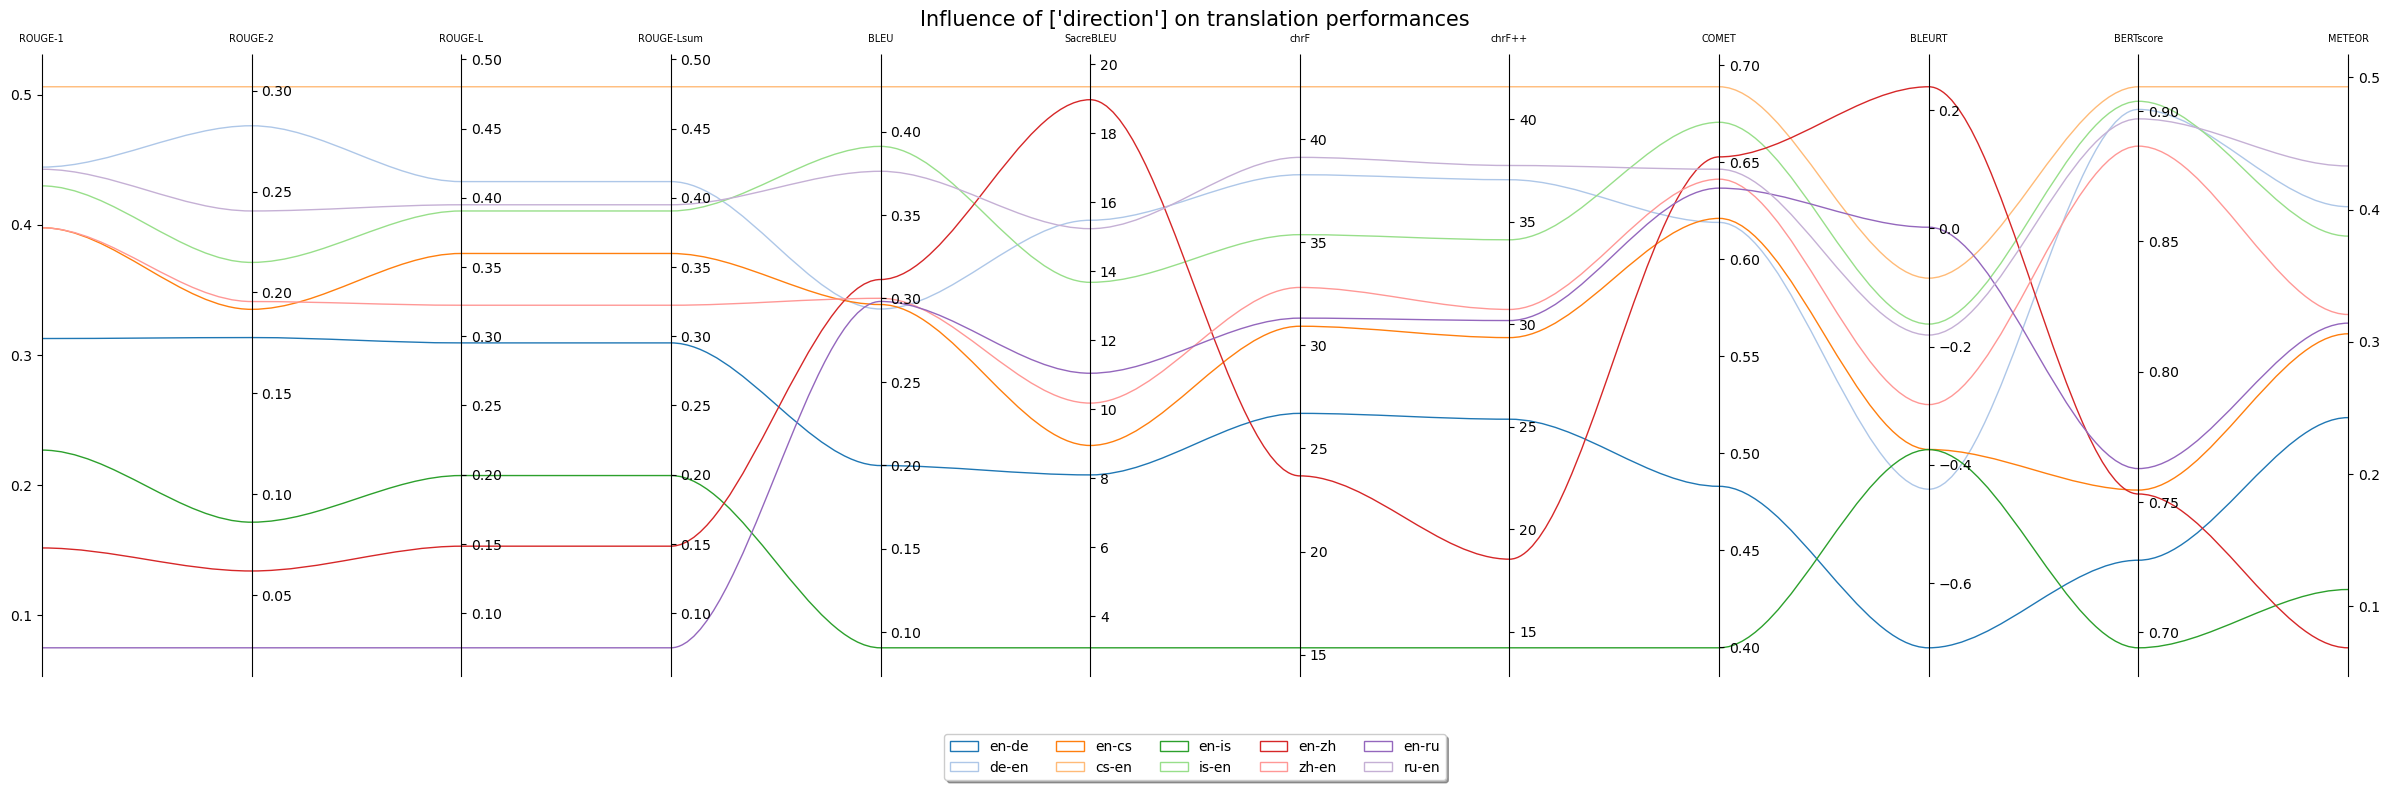

In [2]:
metric_names = ["ROUGE-1", "ROUGE-2", "ROUGE-L", "ROUGE-Lsum",
                "BLEU", "SacreBLEU", "chrF", "chrF++",
                "COMET", "BLEURT", "BERTscore", "METEOR"]

dataset_names = ["wnt23"]
reduce_sizes = [100]

directions = ["en-de", "de-en",
              "en-cs", "cs-en",
              "en-is", "is-en",
              "en-zh", "zh-en",
              "en-ru", "ru-en"]

model_names = ["finetuned_llama3-3B"]
model_sizes = [None]


make_parallel_plot(directions,
                    model_names, model_sizes,
                    dataset_names, reduce_sizes,
                    metric_names,
                    list_colors_per = ["direction"],
                    savepath = "./results/evaluations_figures/finetuned_llama-3B_eval_directions")

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


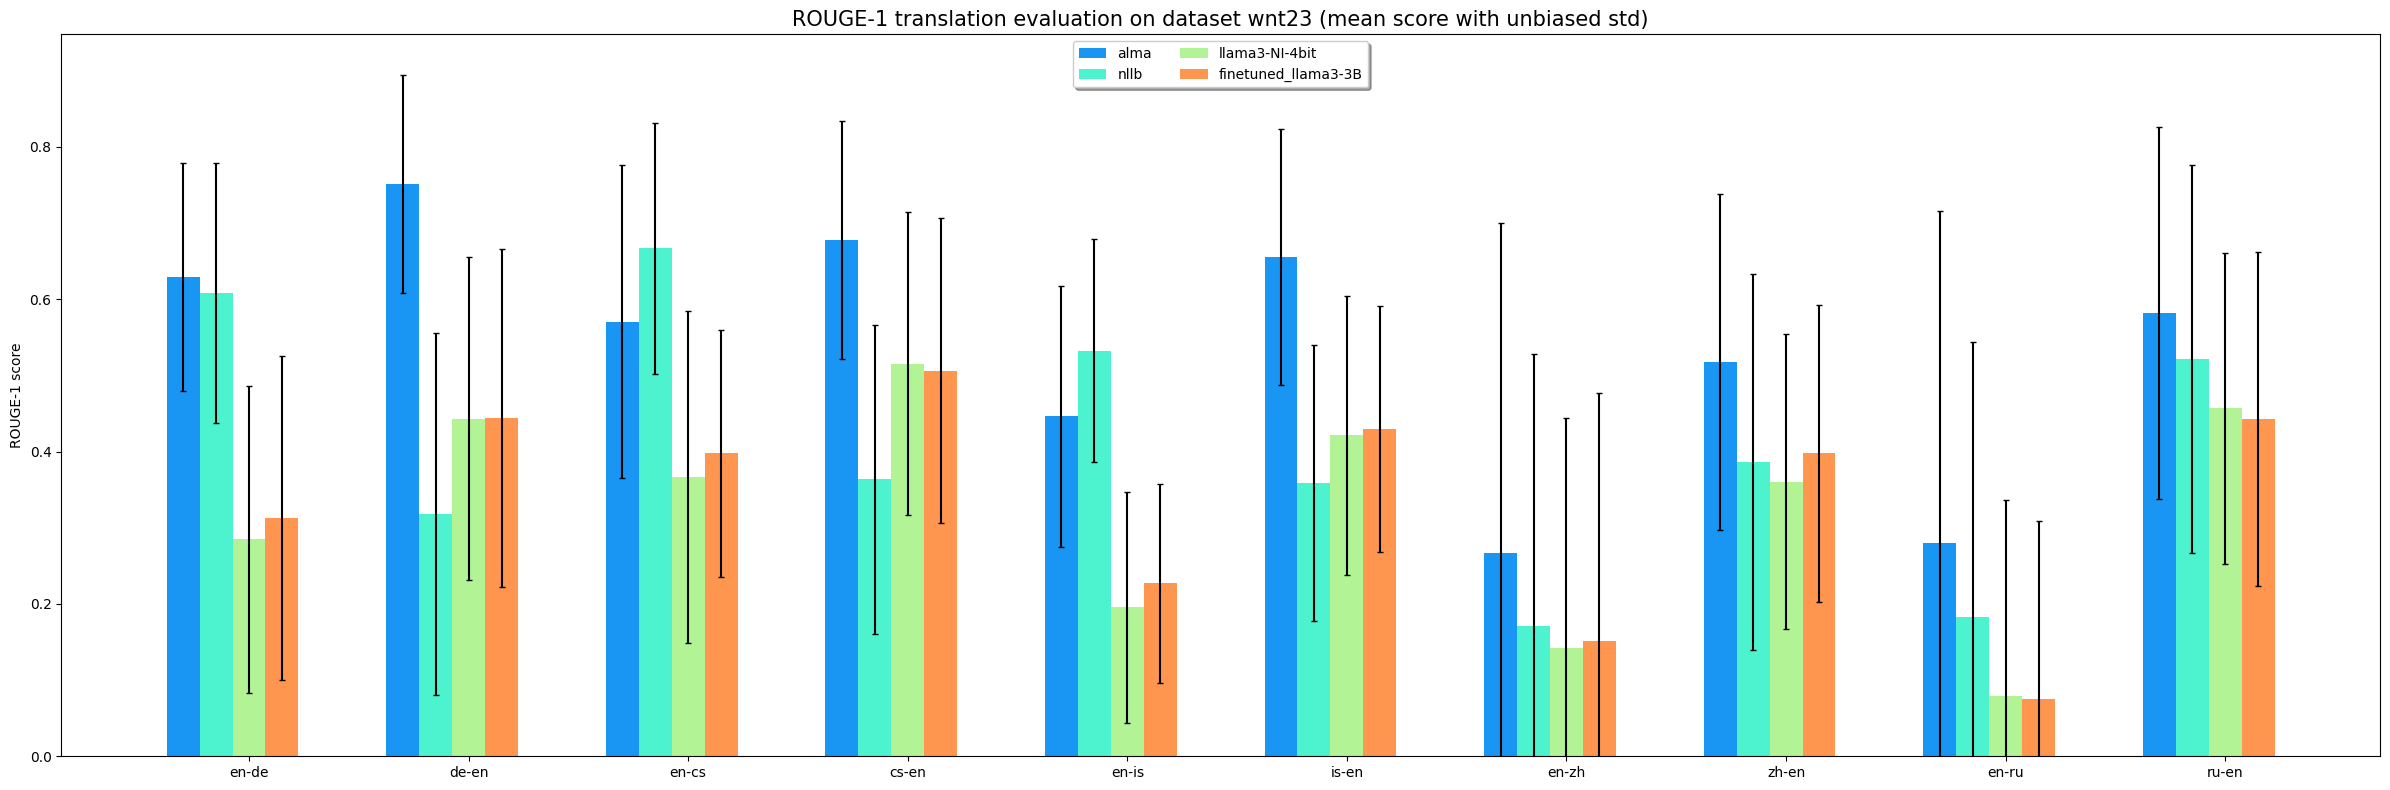

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


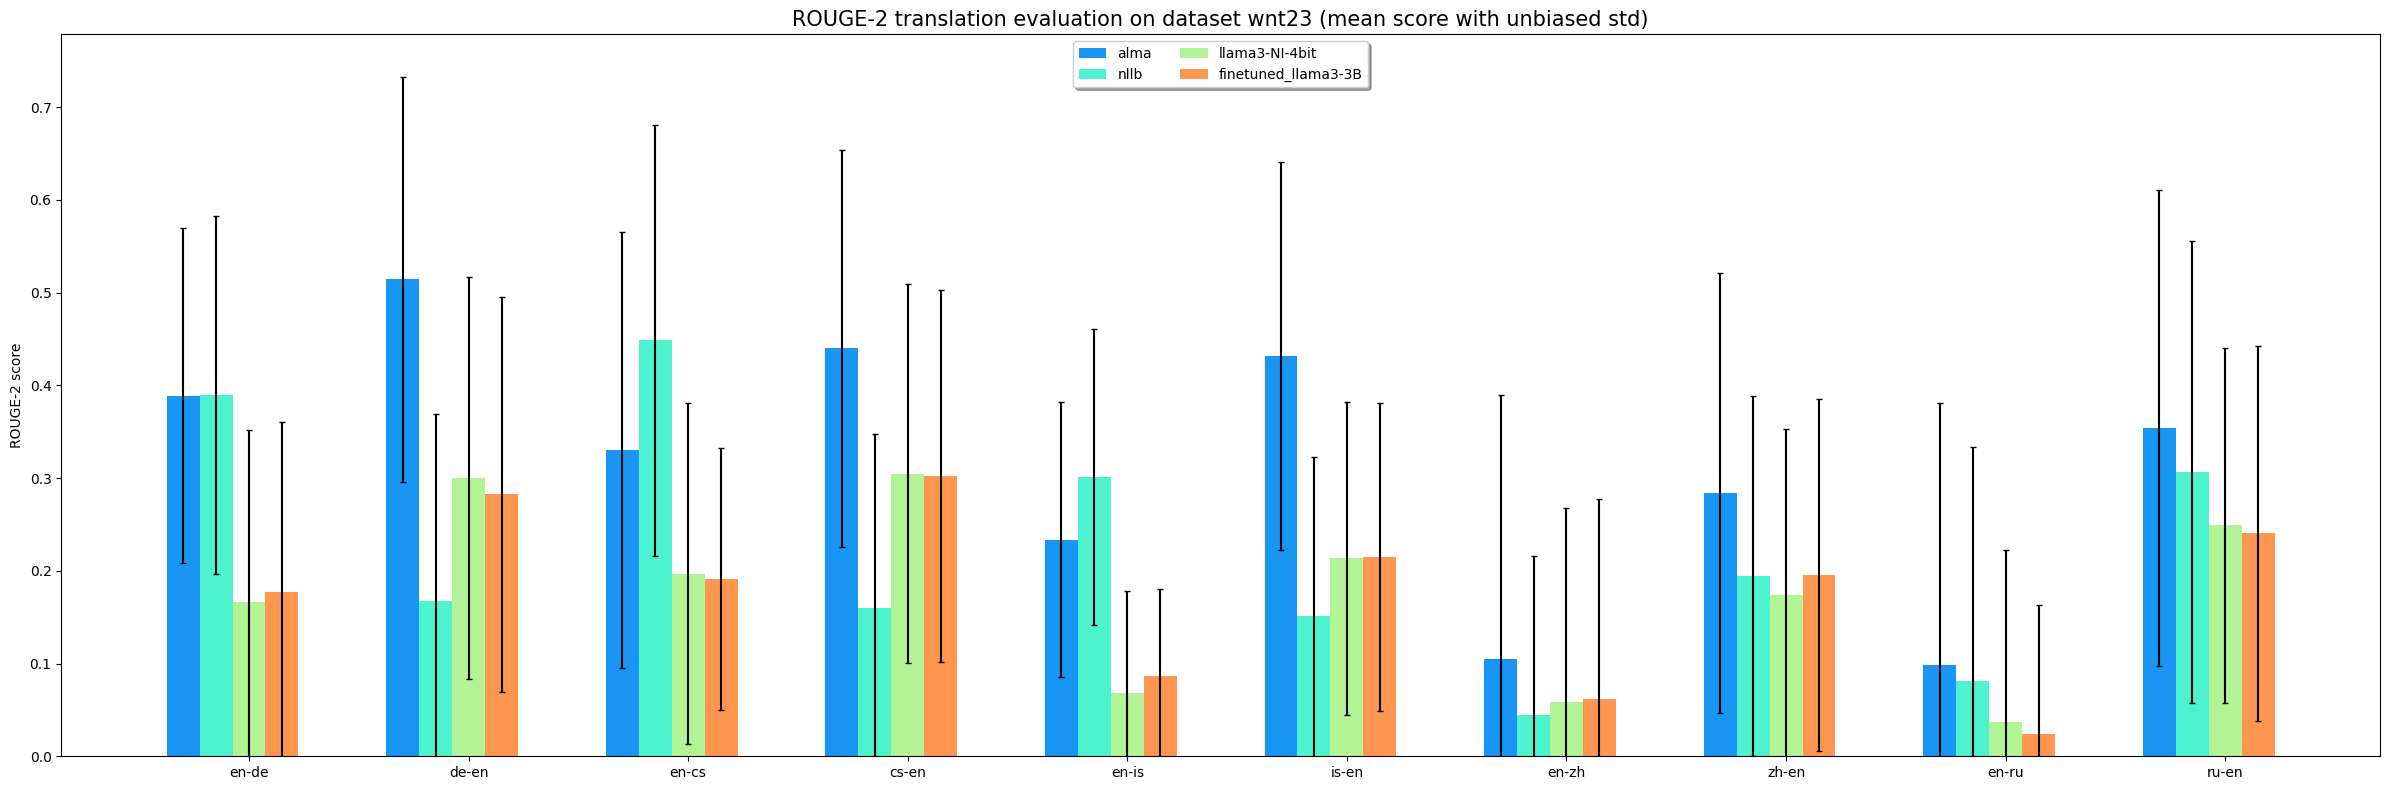

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


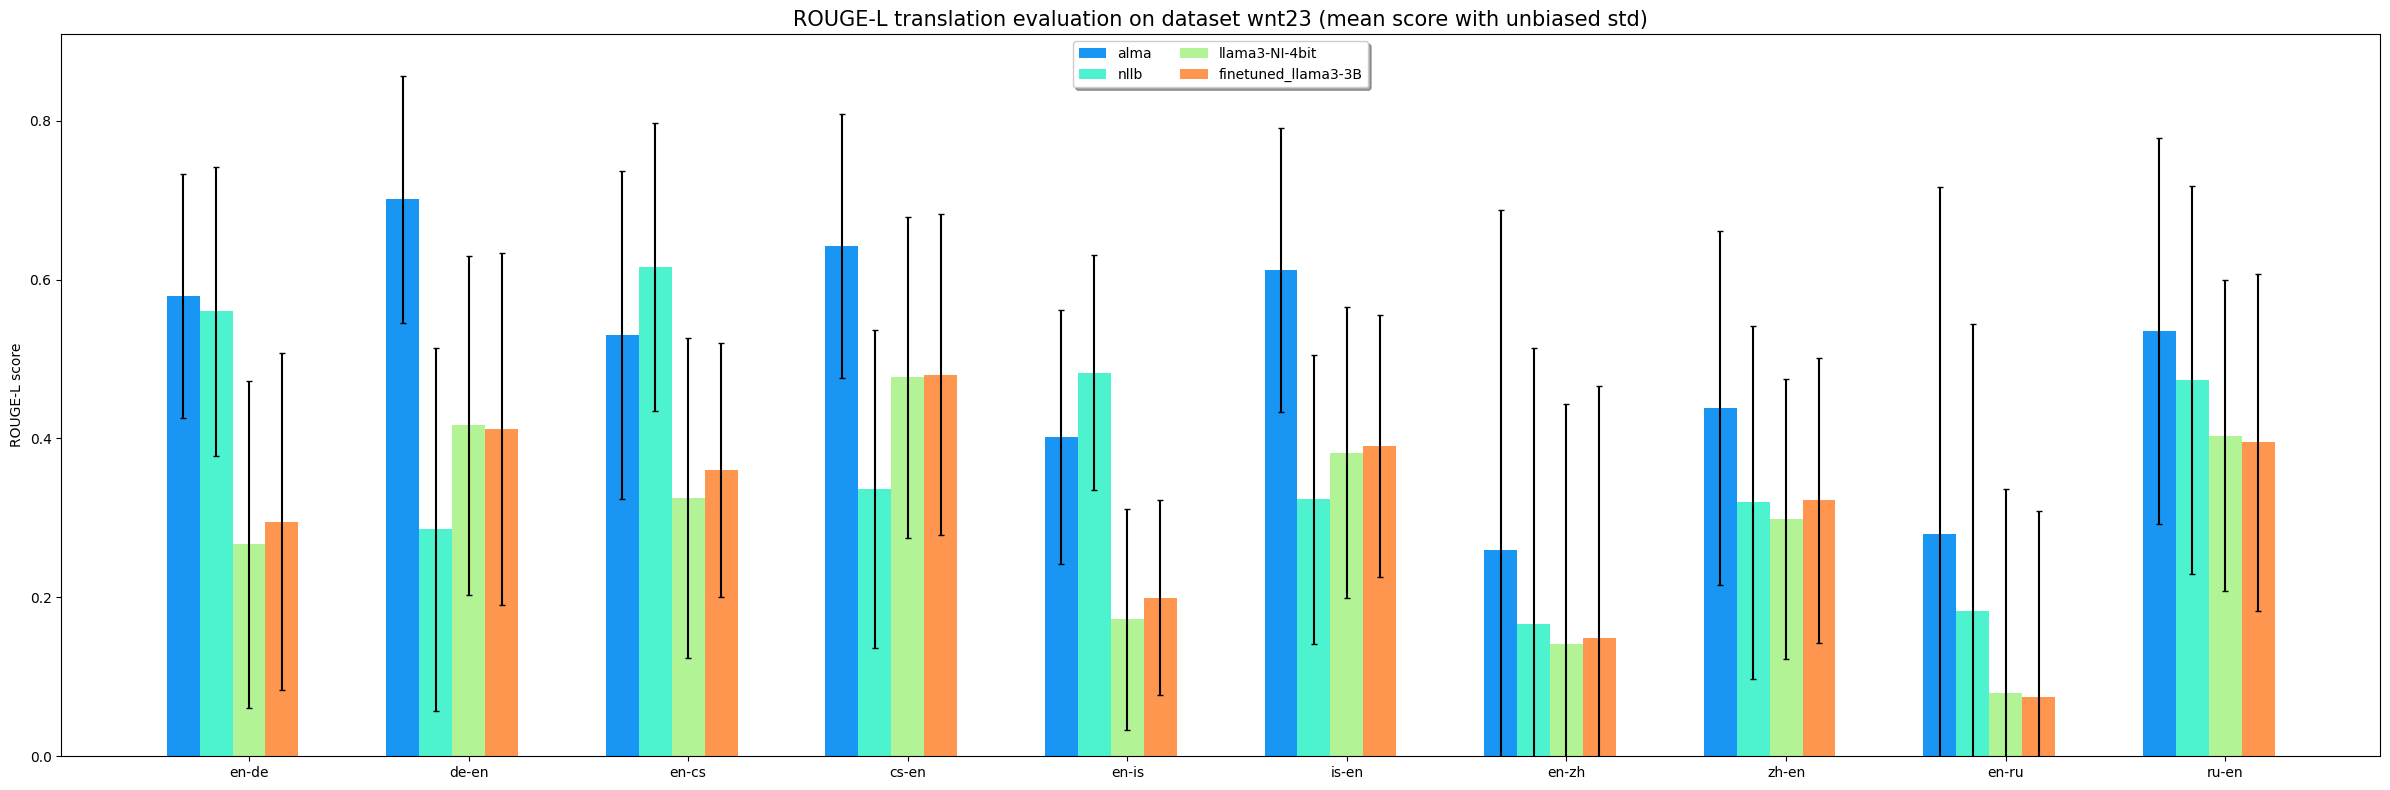

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


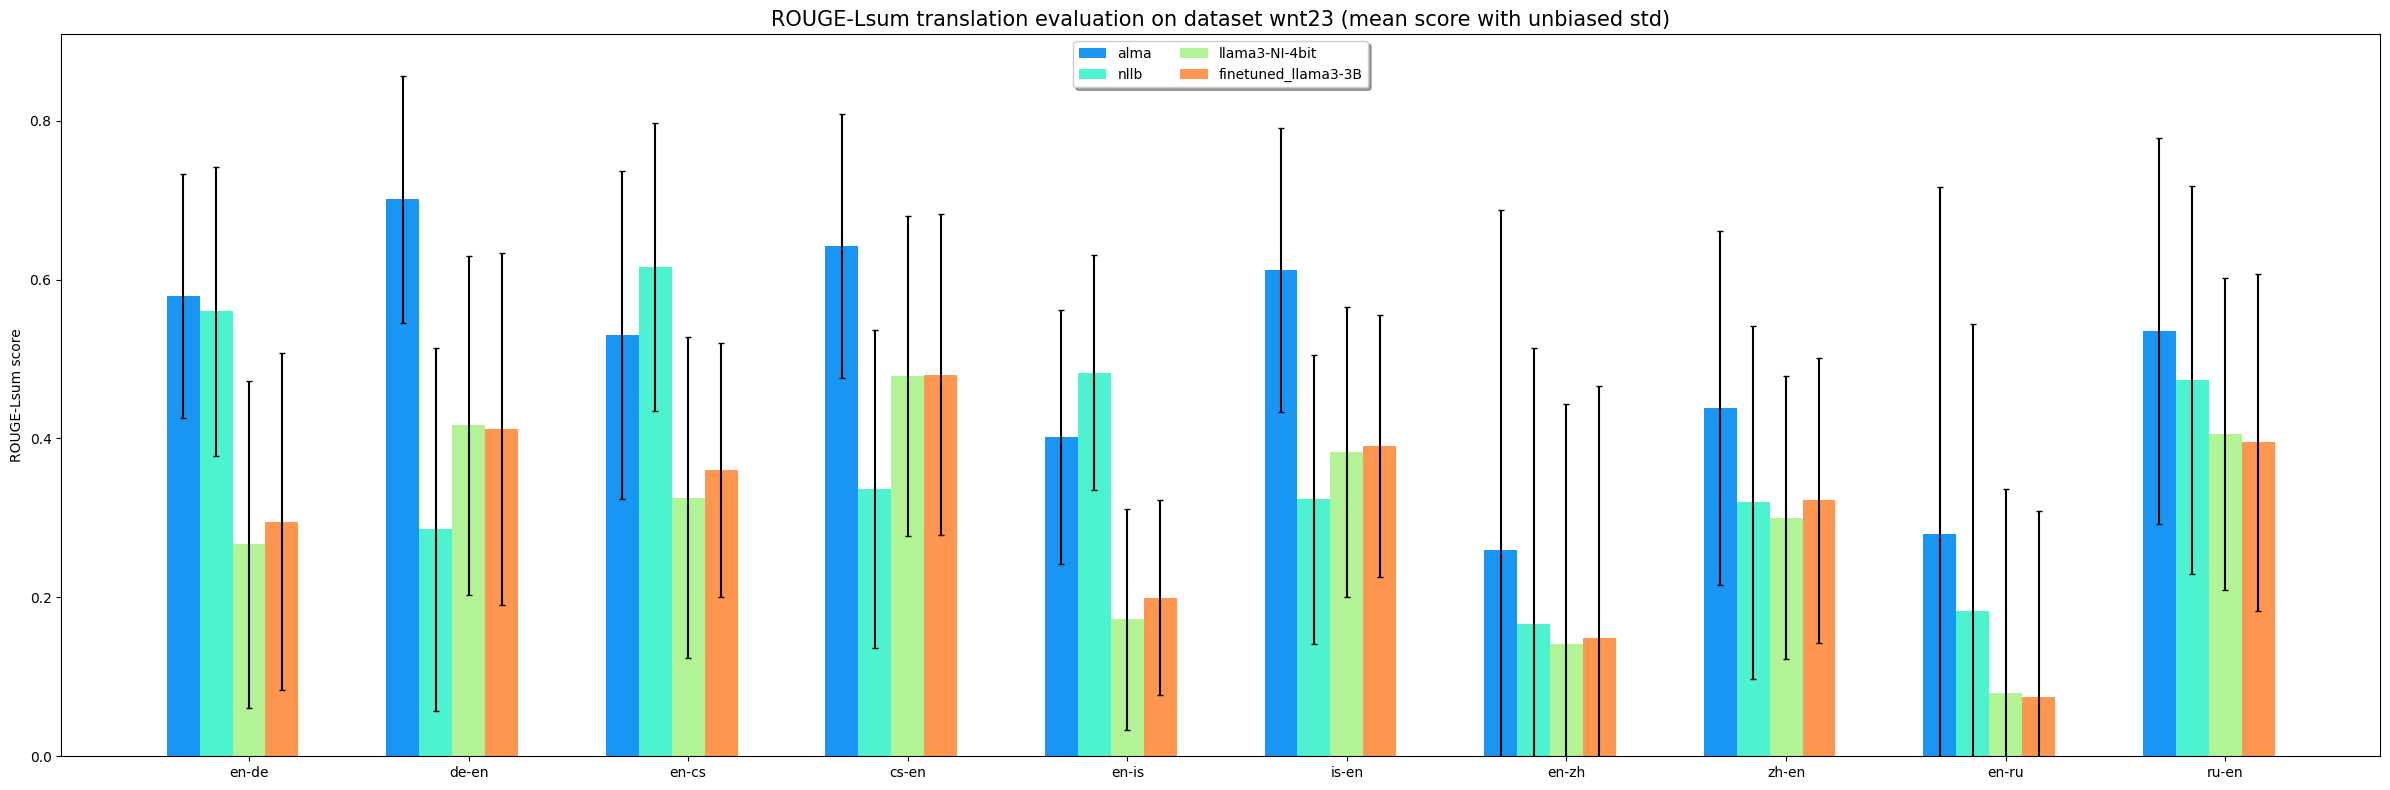

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


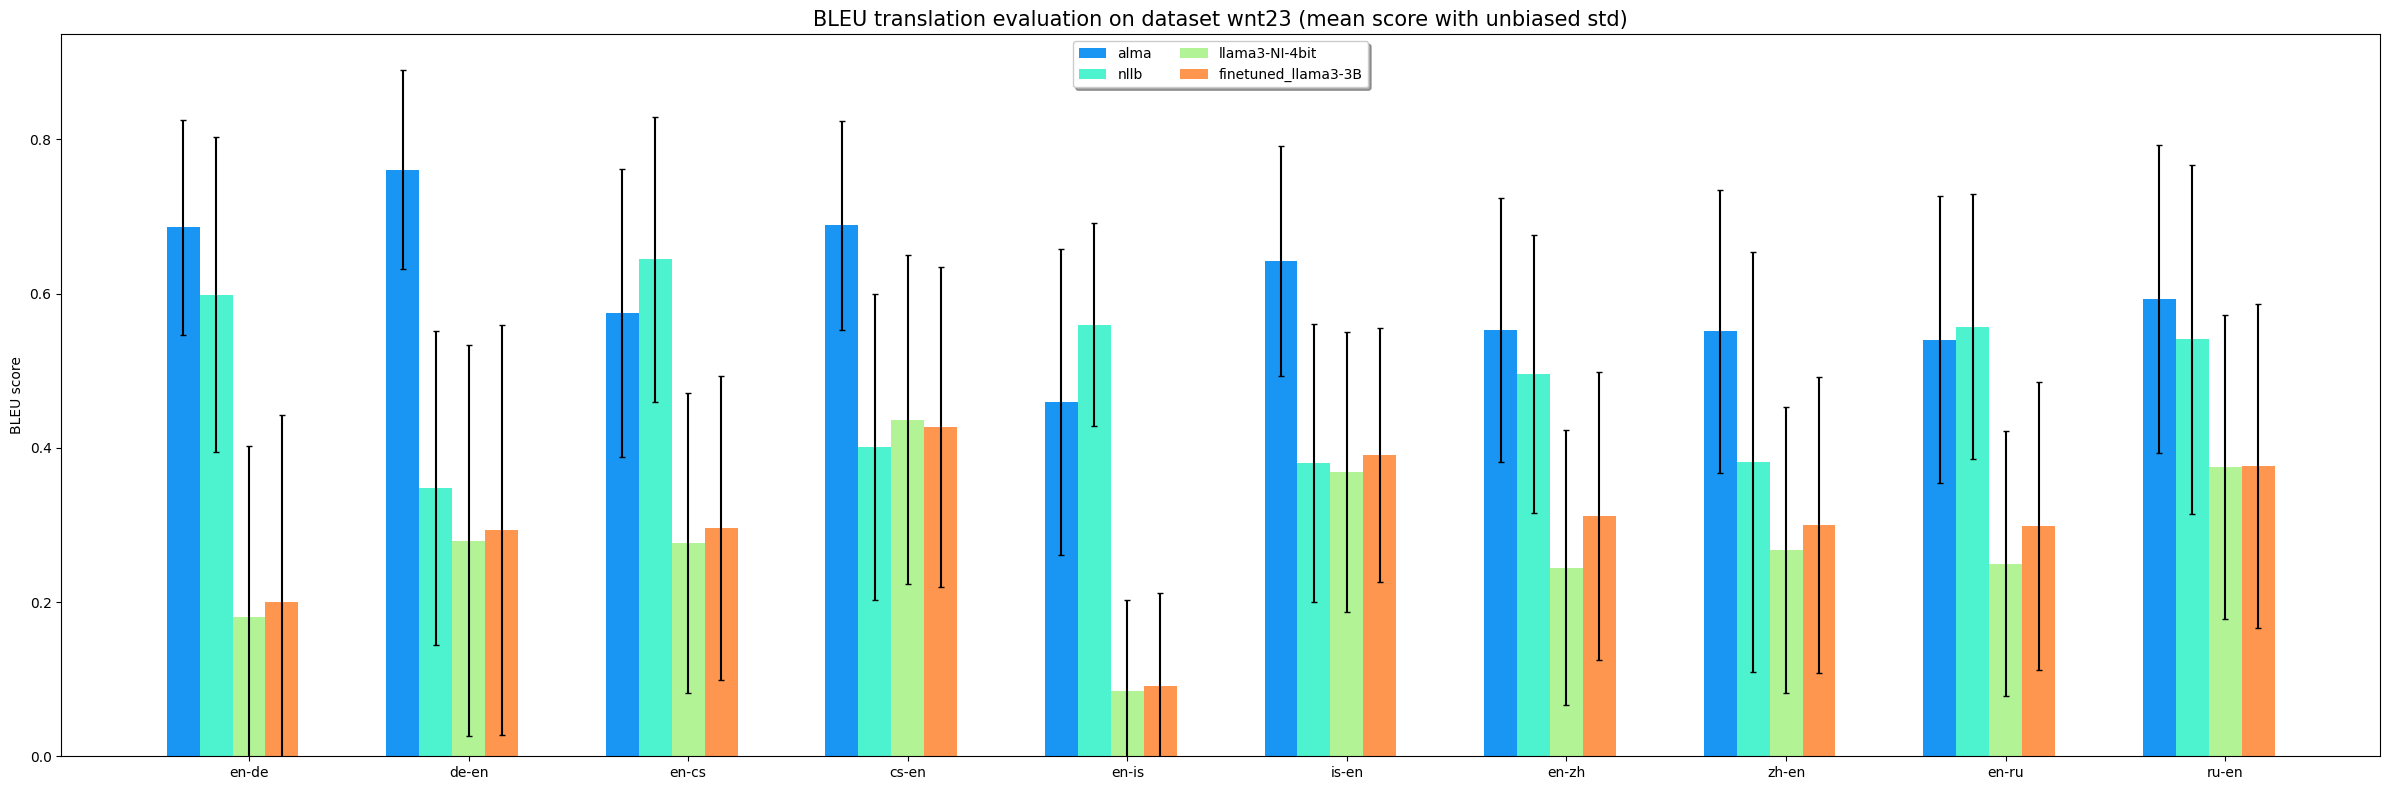

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


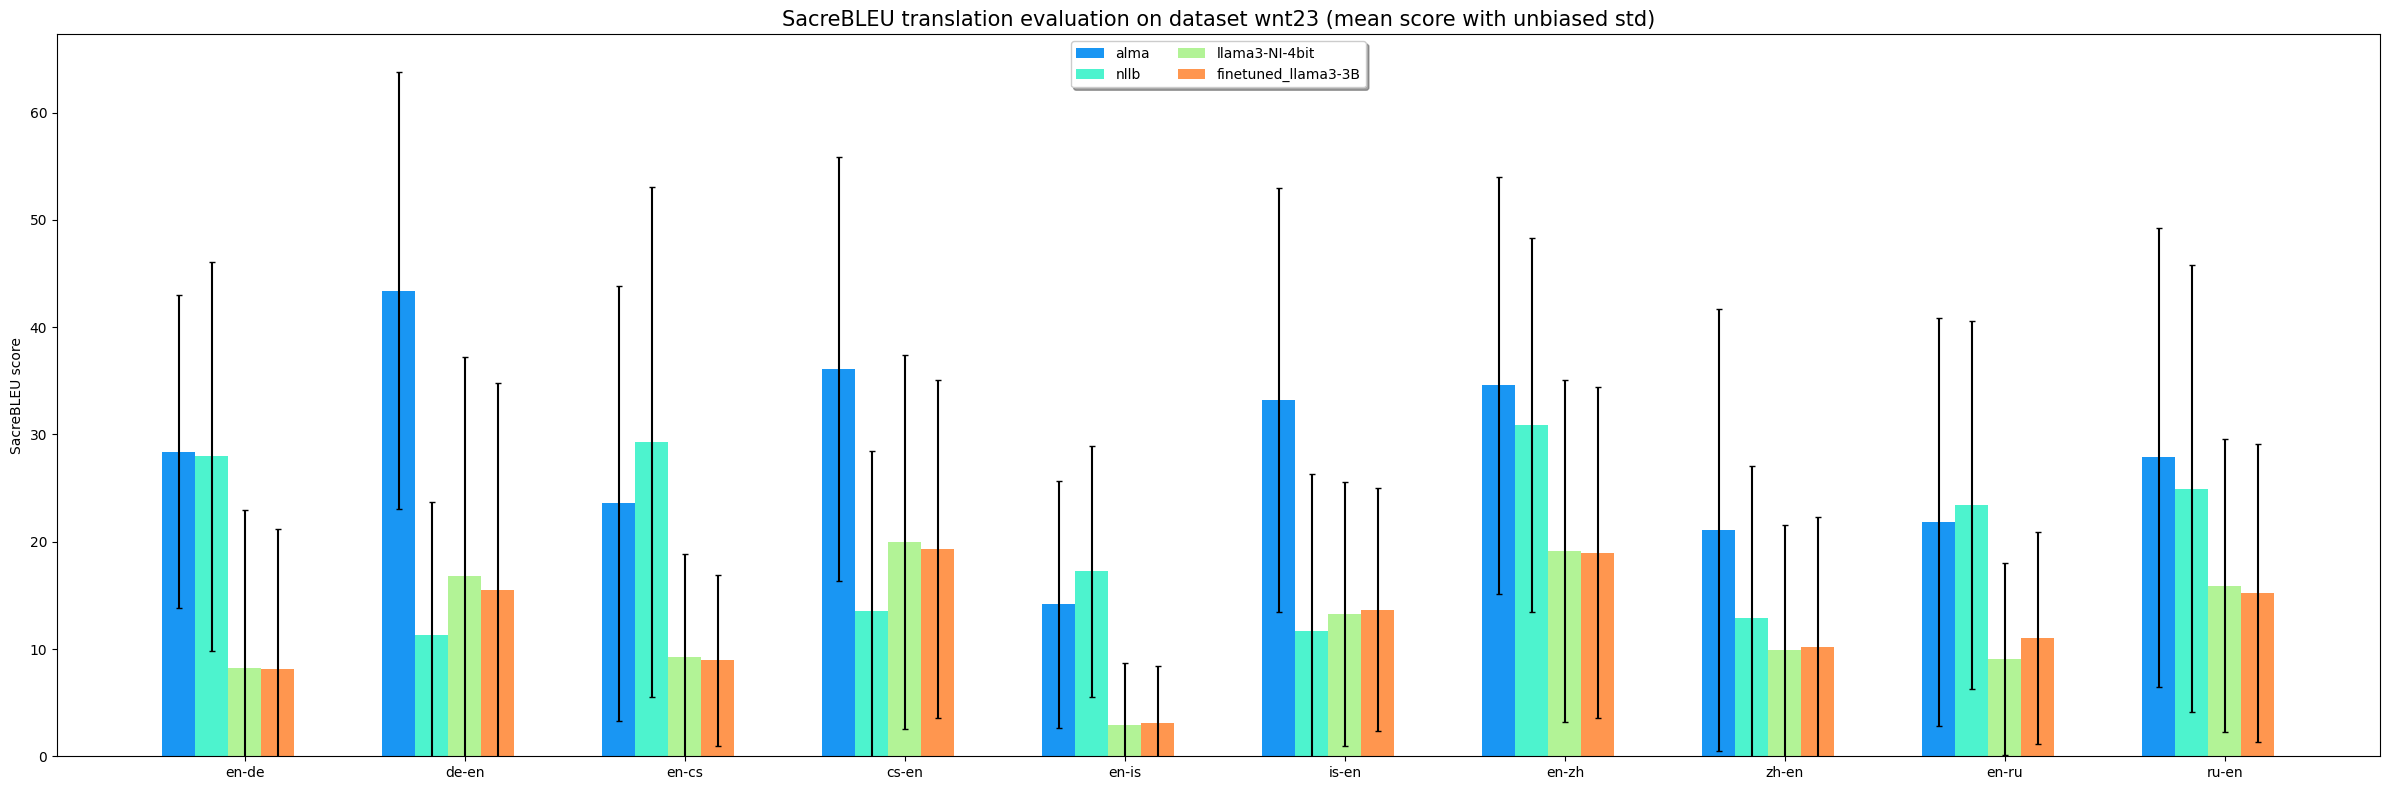

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


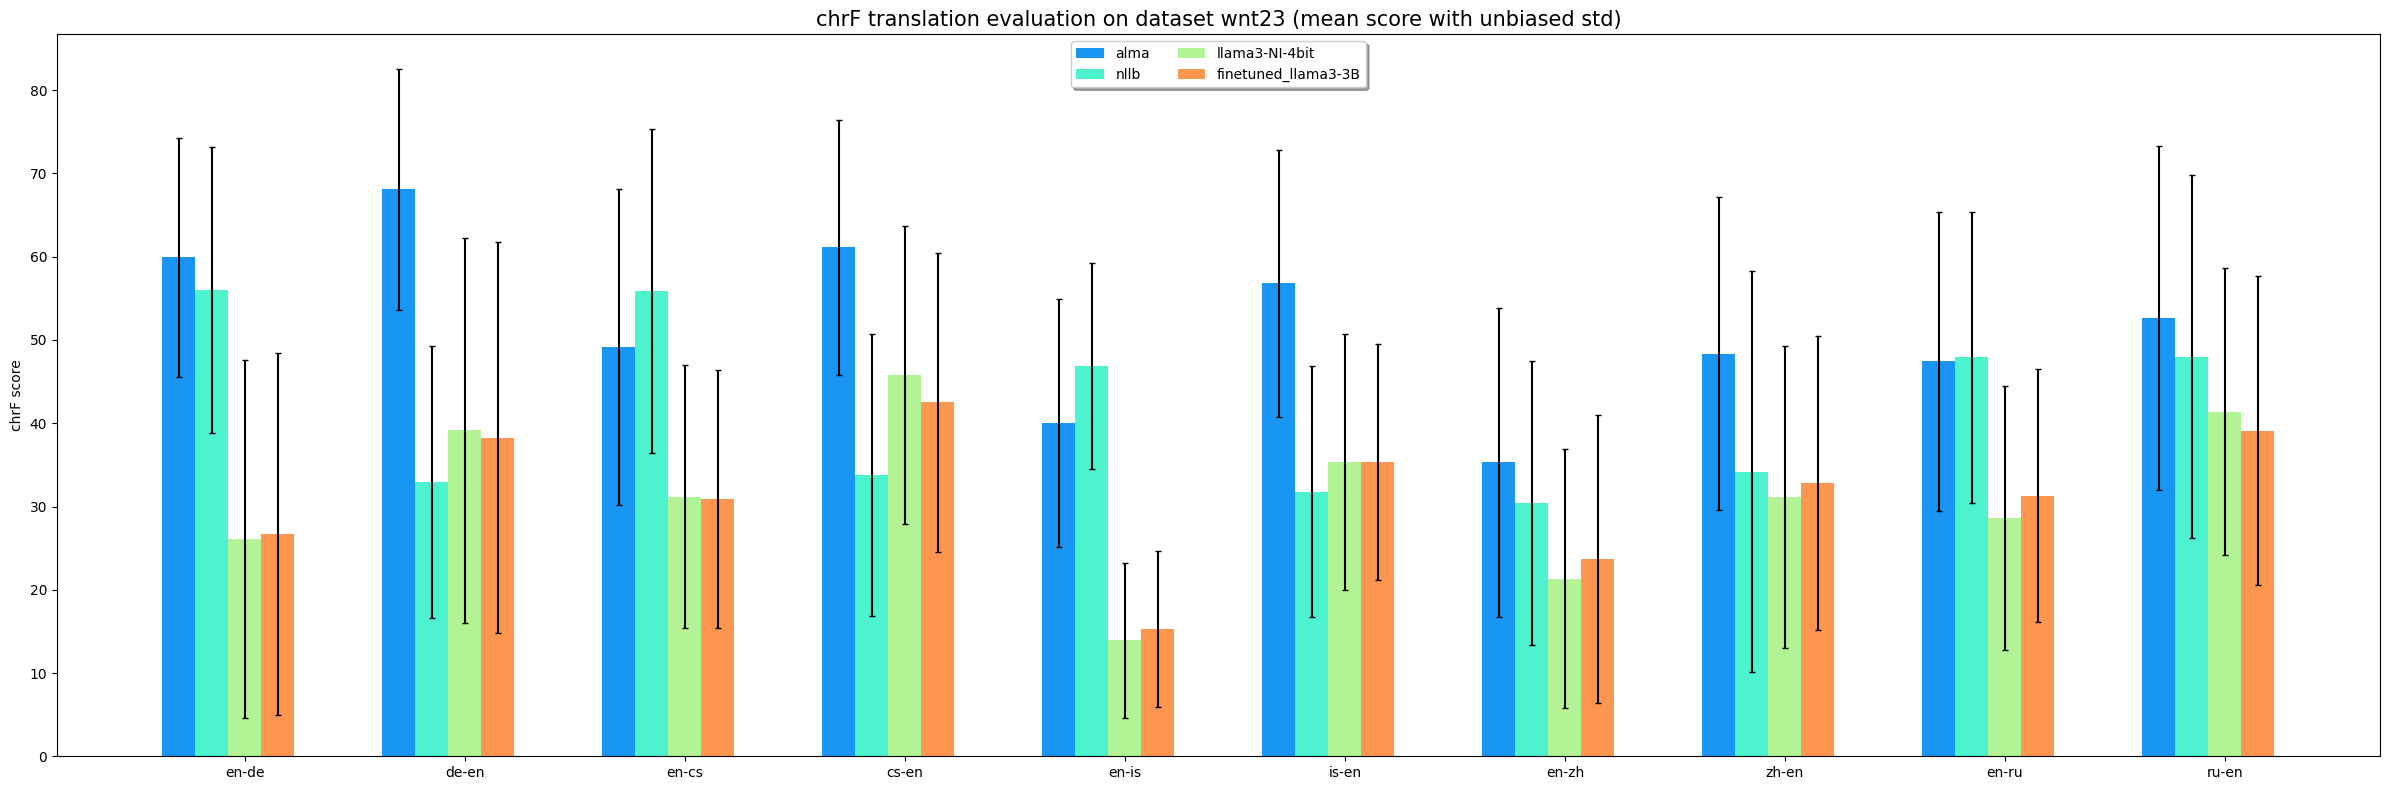

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


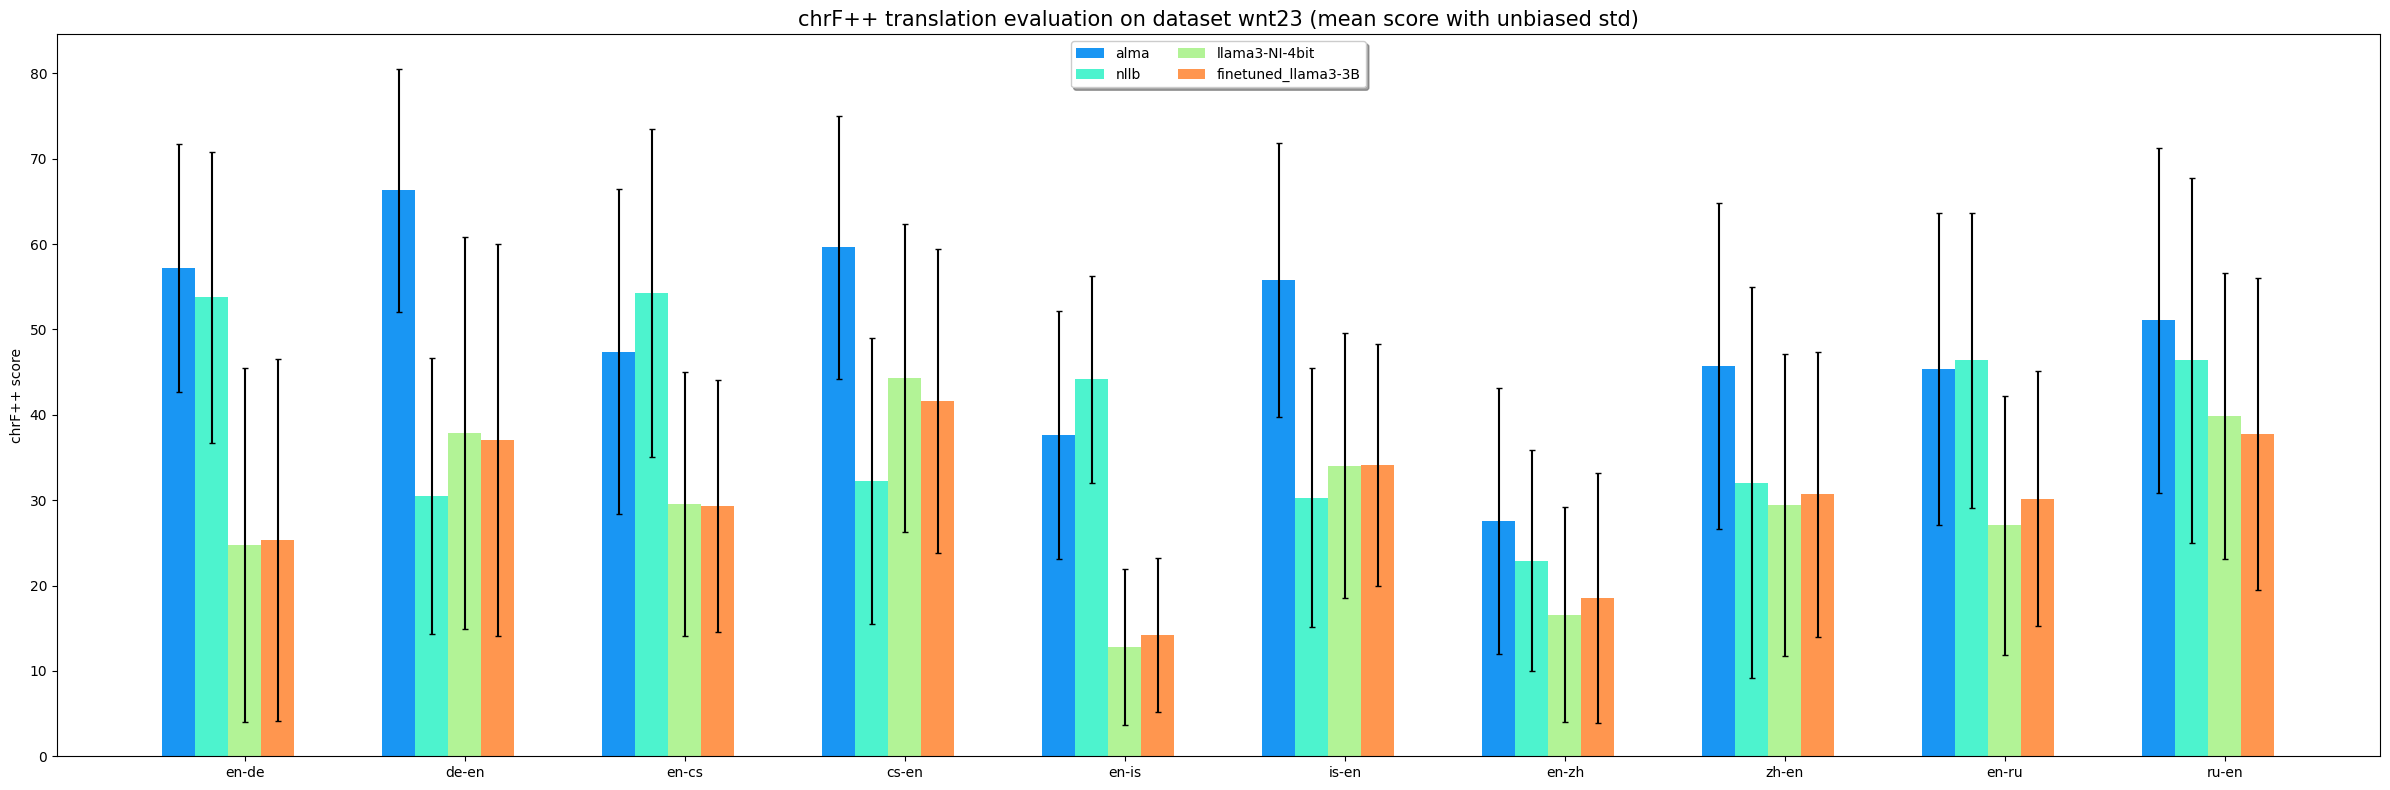

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


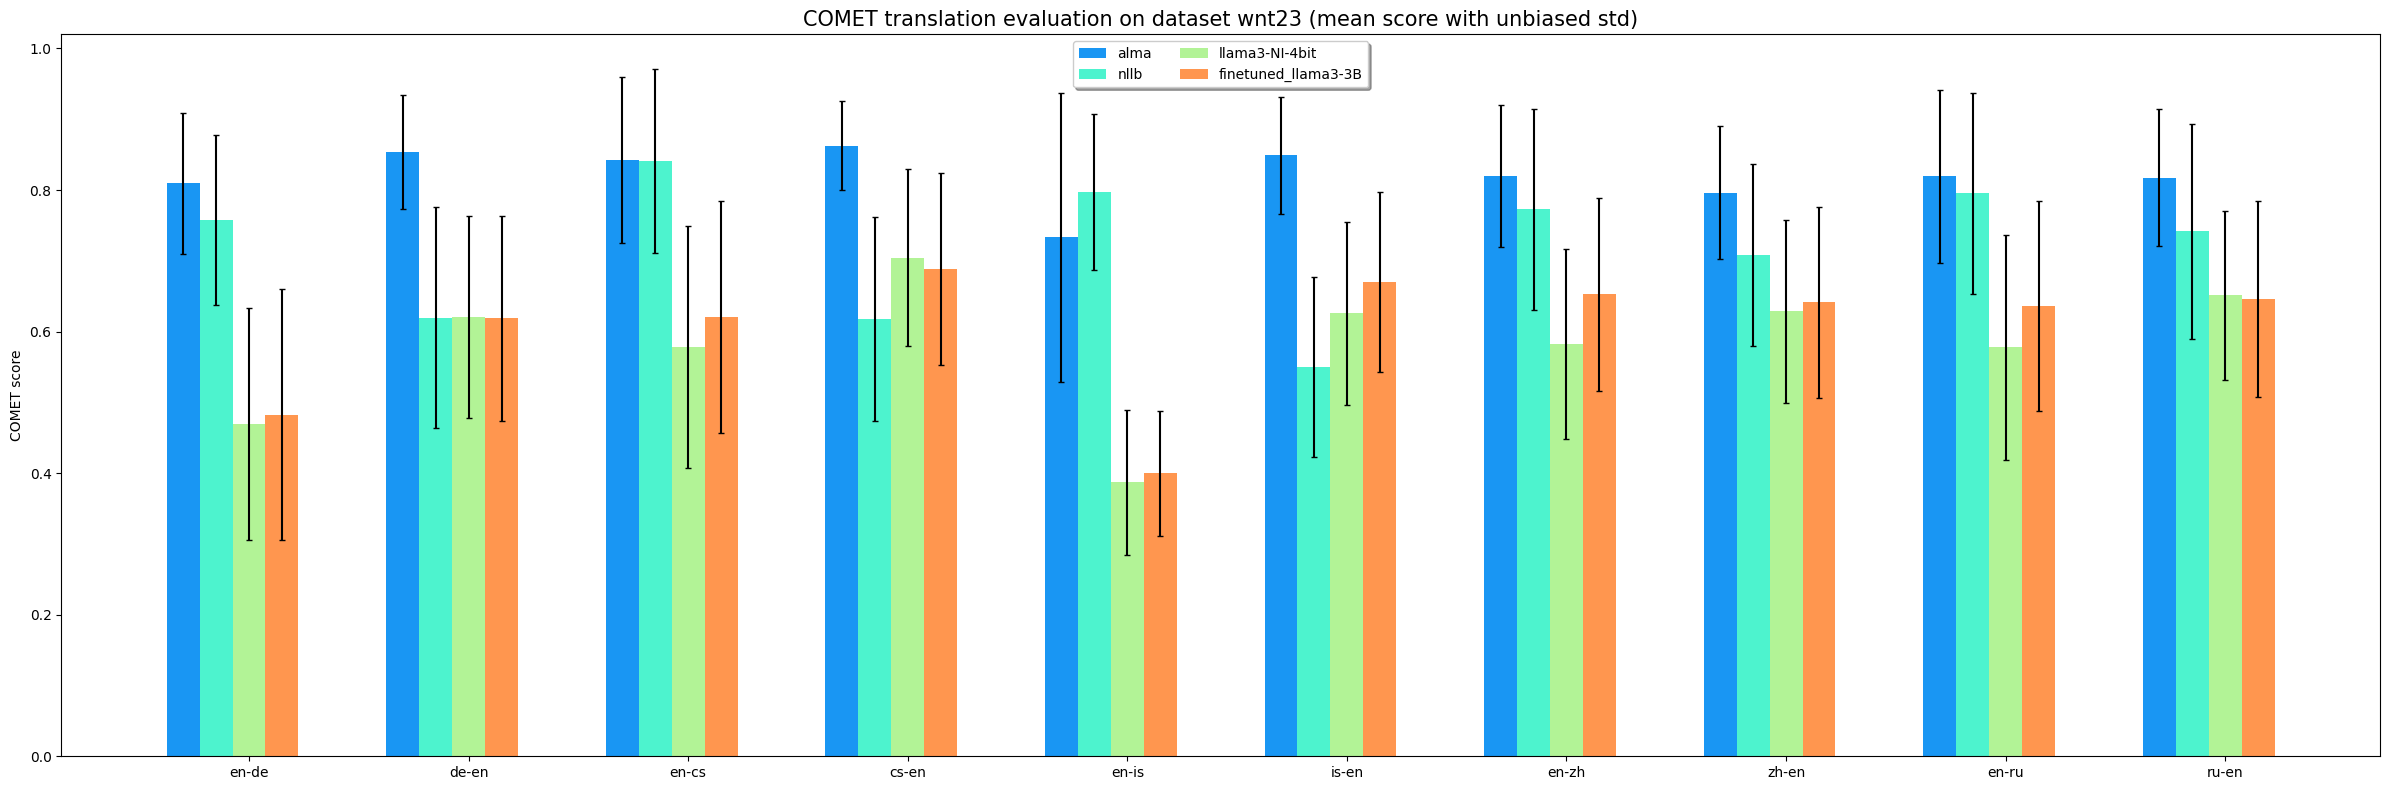

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


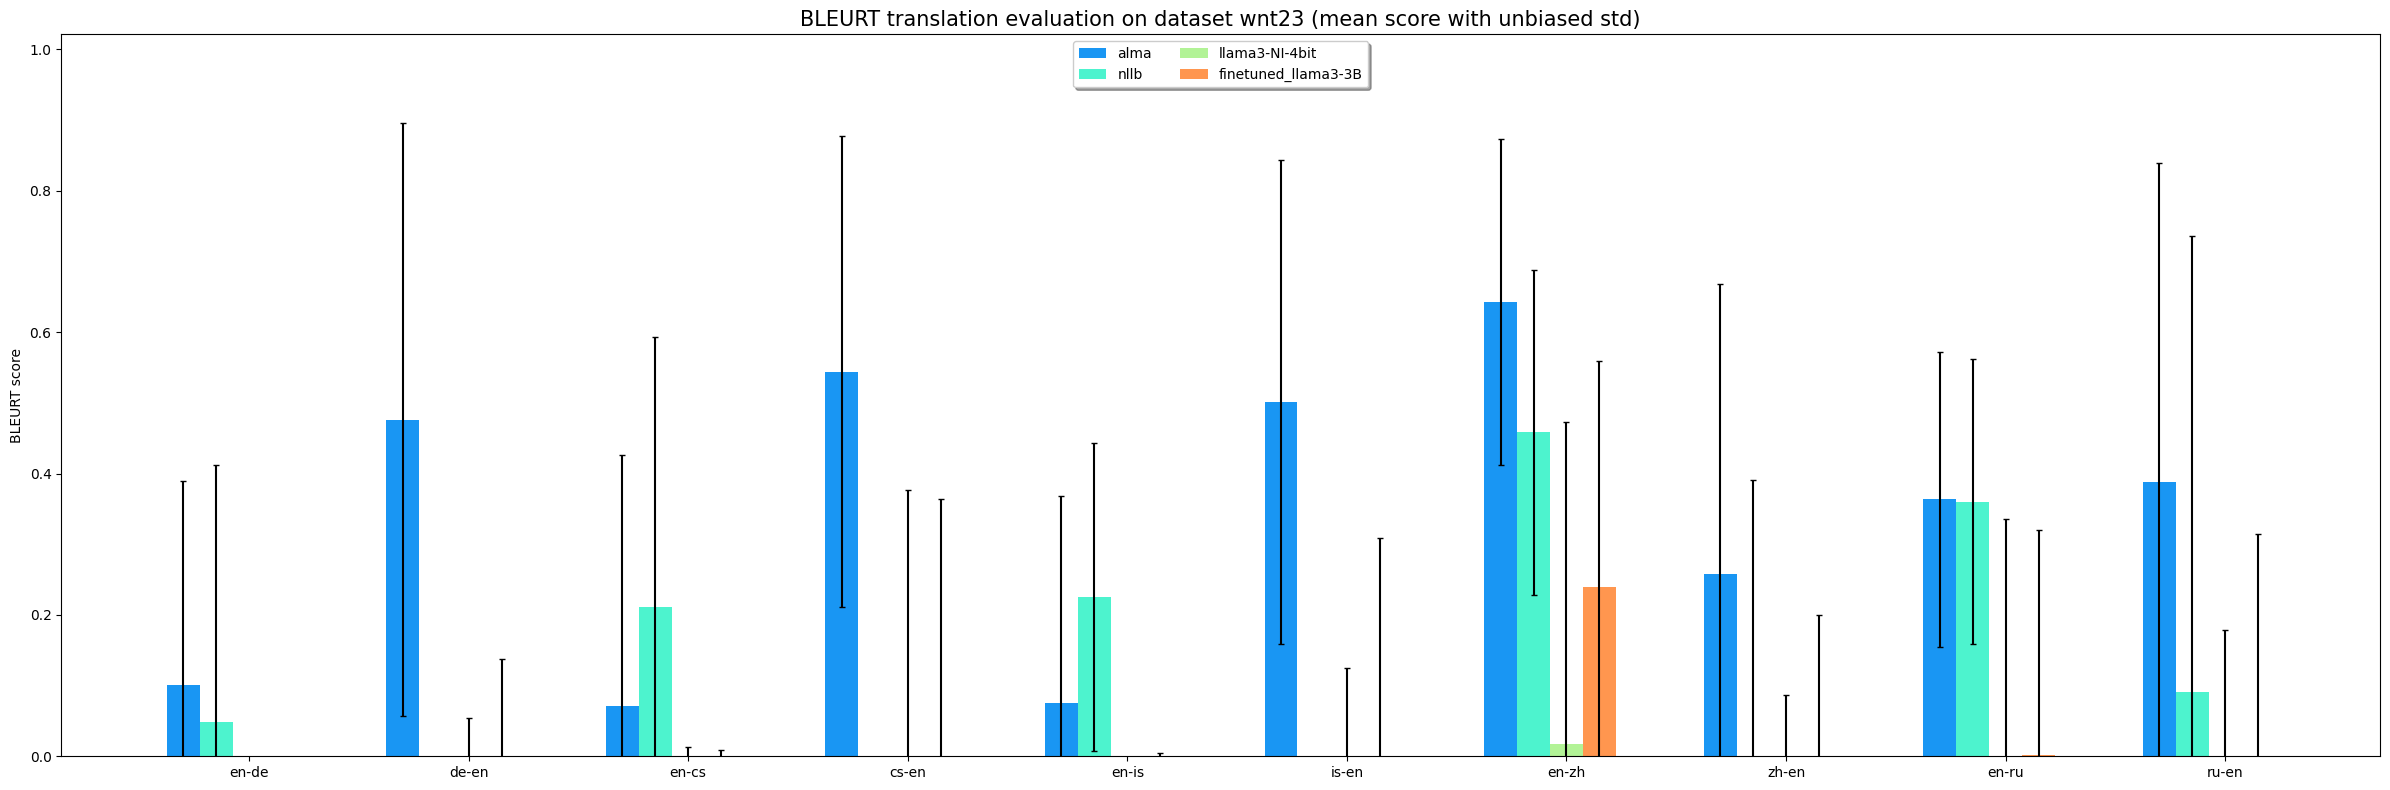

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


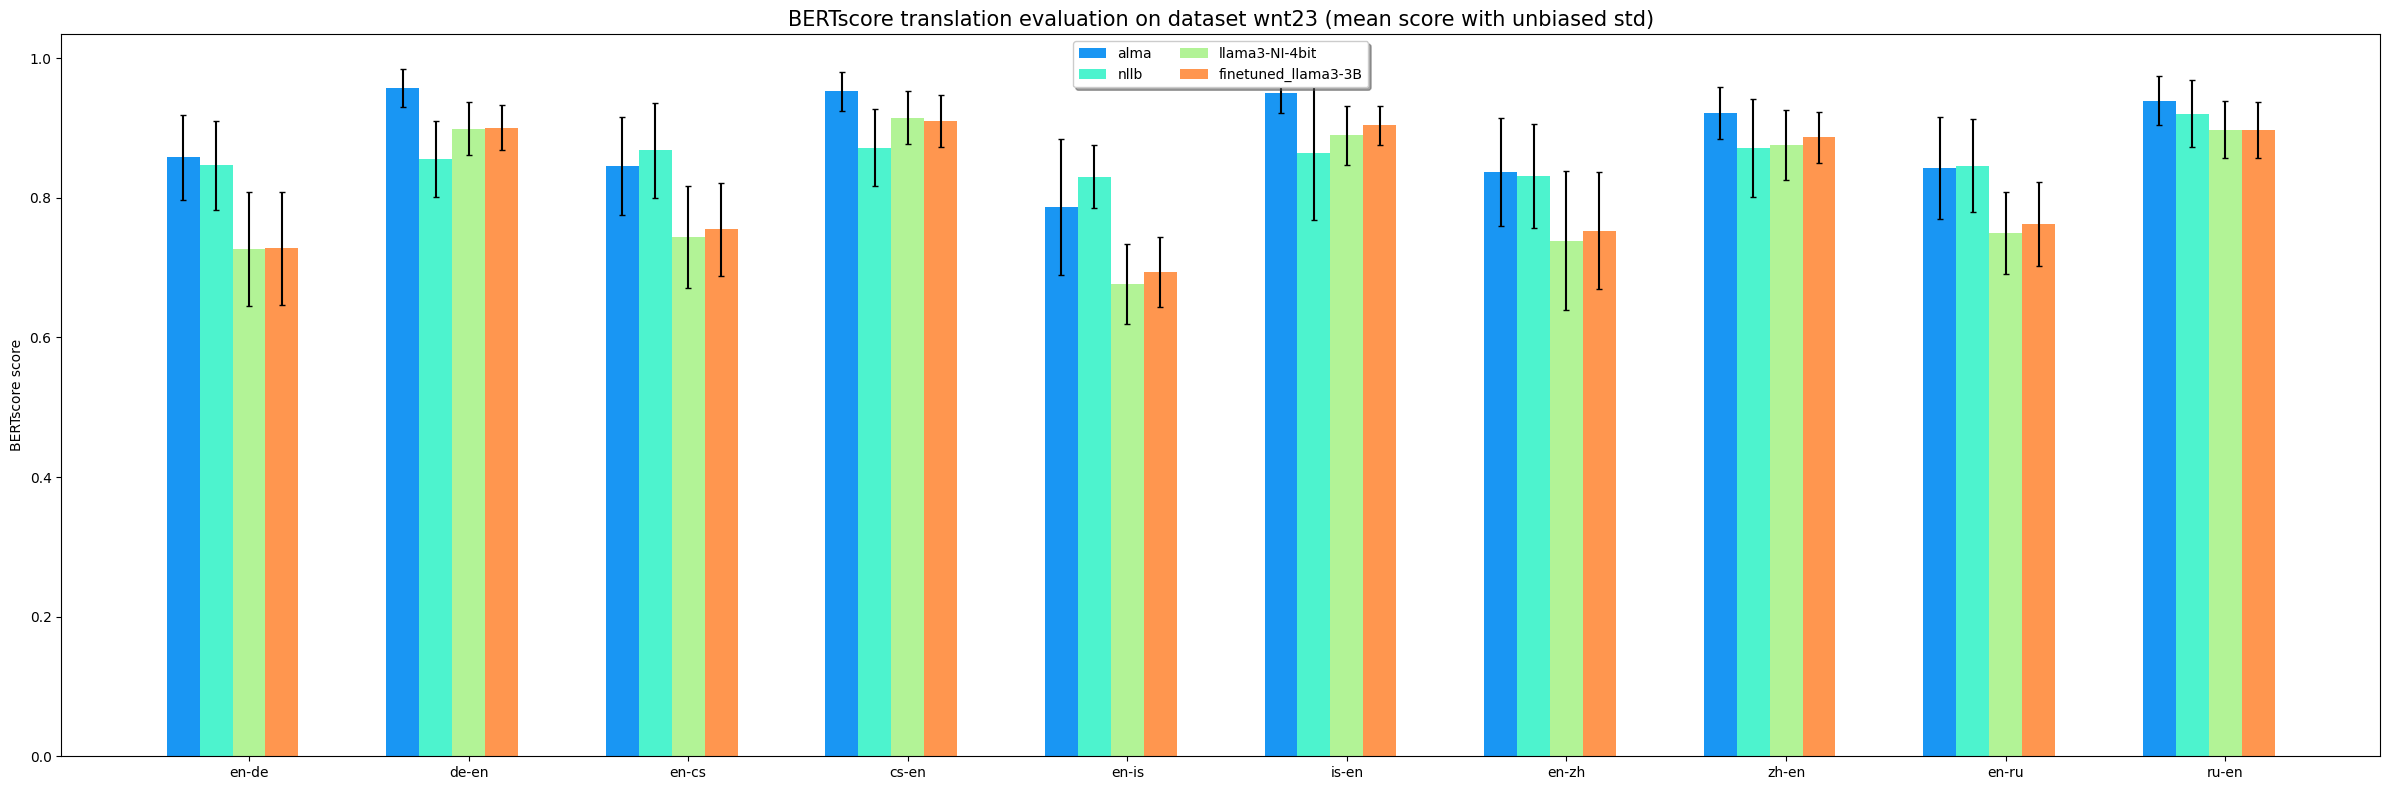

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


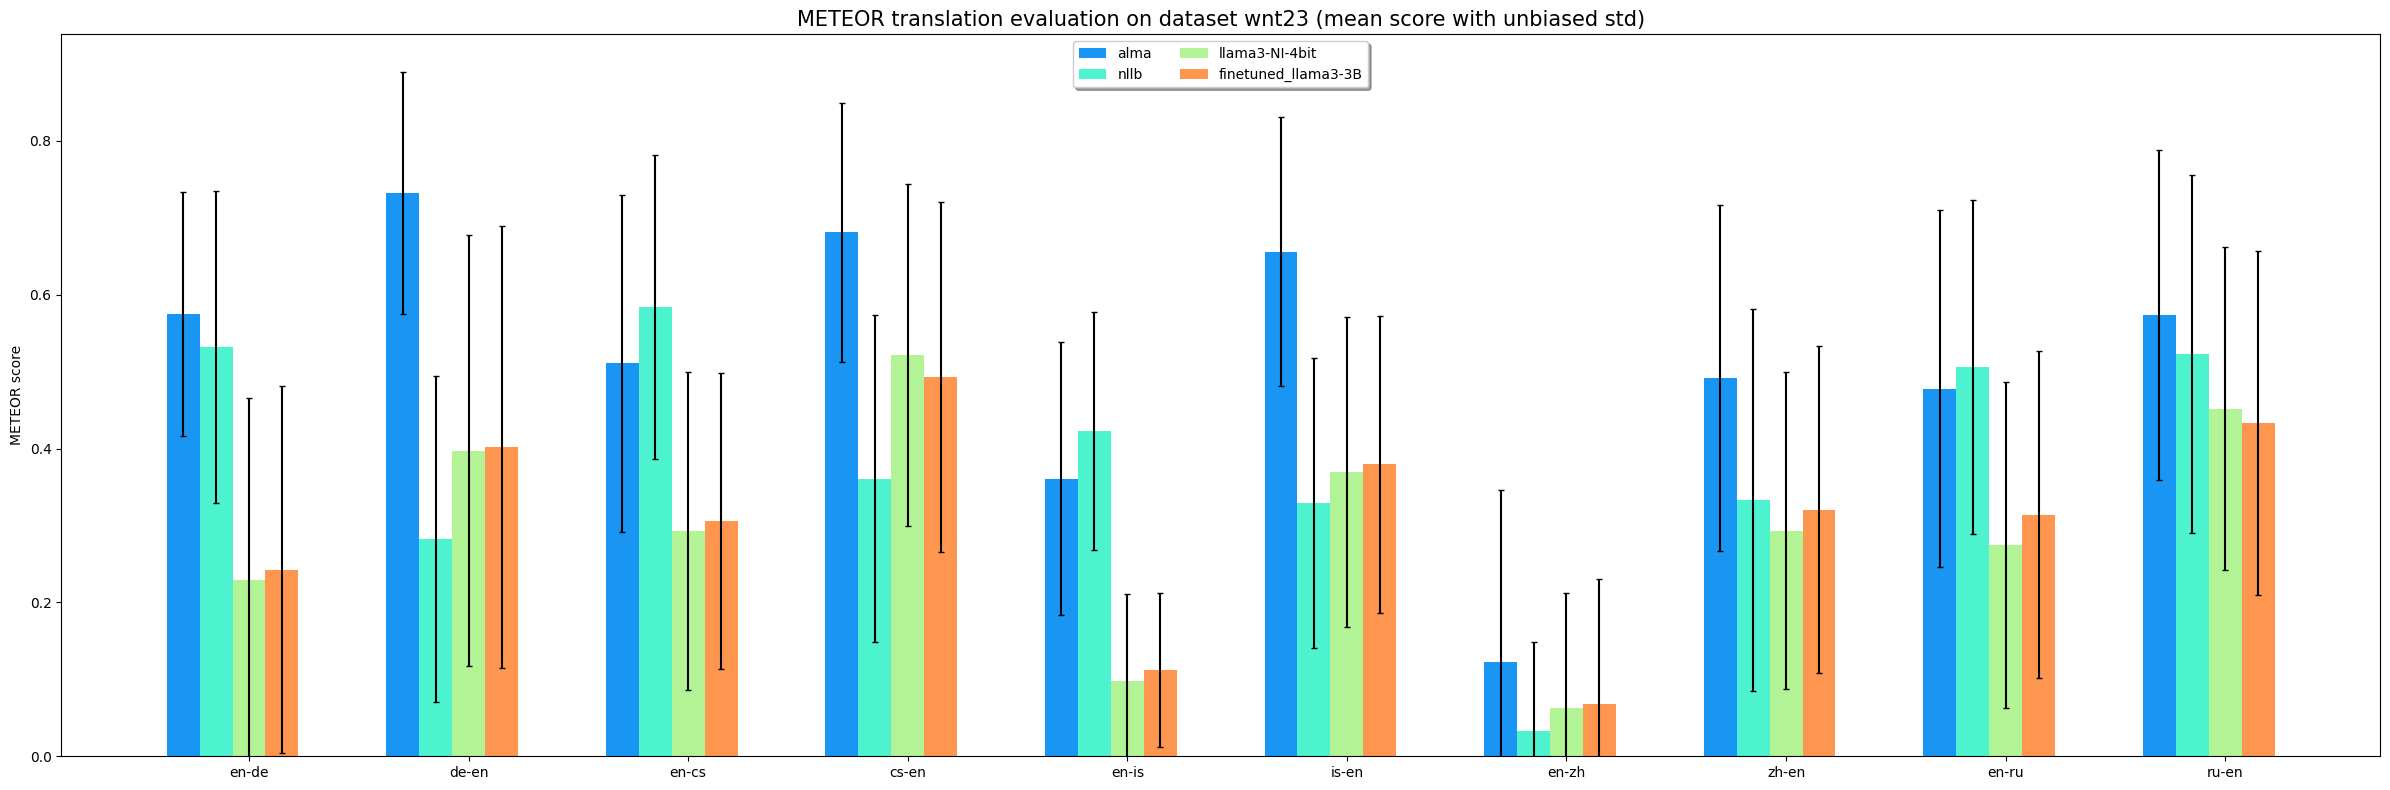

In [10]:
metric_names = ["ROUGE-1", "ROUGE-2", "ROUGE-L", "ROUGE-Lsum",
                "BLEU", "SacreBLEU", "chrF", "chrF++",
                "COMET", "BLEURT", "BERTscore", "METEOR"]

dataset_name = "wnt23"
reduce_size = 100

directions = ["en-de", "de-en",
              "en-cs", "cs-en",
              "en-is", "is-en",
              "en-zh", "zh-en",
              "en-ru", "ru-en"]

model_names = ["alma",
               "nllb",
               "llama3-NI-4bit",
               "finetuned_llama3-3B"]
model_sizes = [None,
               None,
               None,
               None]

make_bar_plot(directions,
                model_names, model_sizes,
                dataset_name, reduce_size,
                metric_names,
                width=0.15,
                cmap="rainbow",
                savepath = "./results/evaluations_figures/barplot_wnt23_llama-3B_finetuned")

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


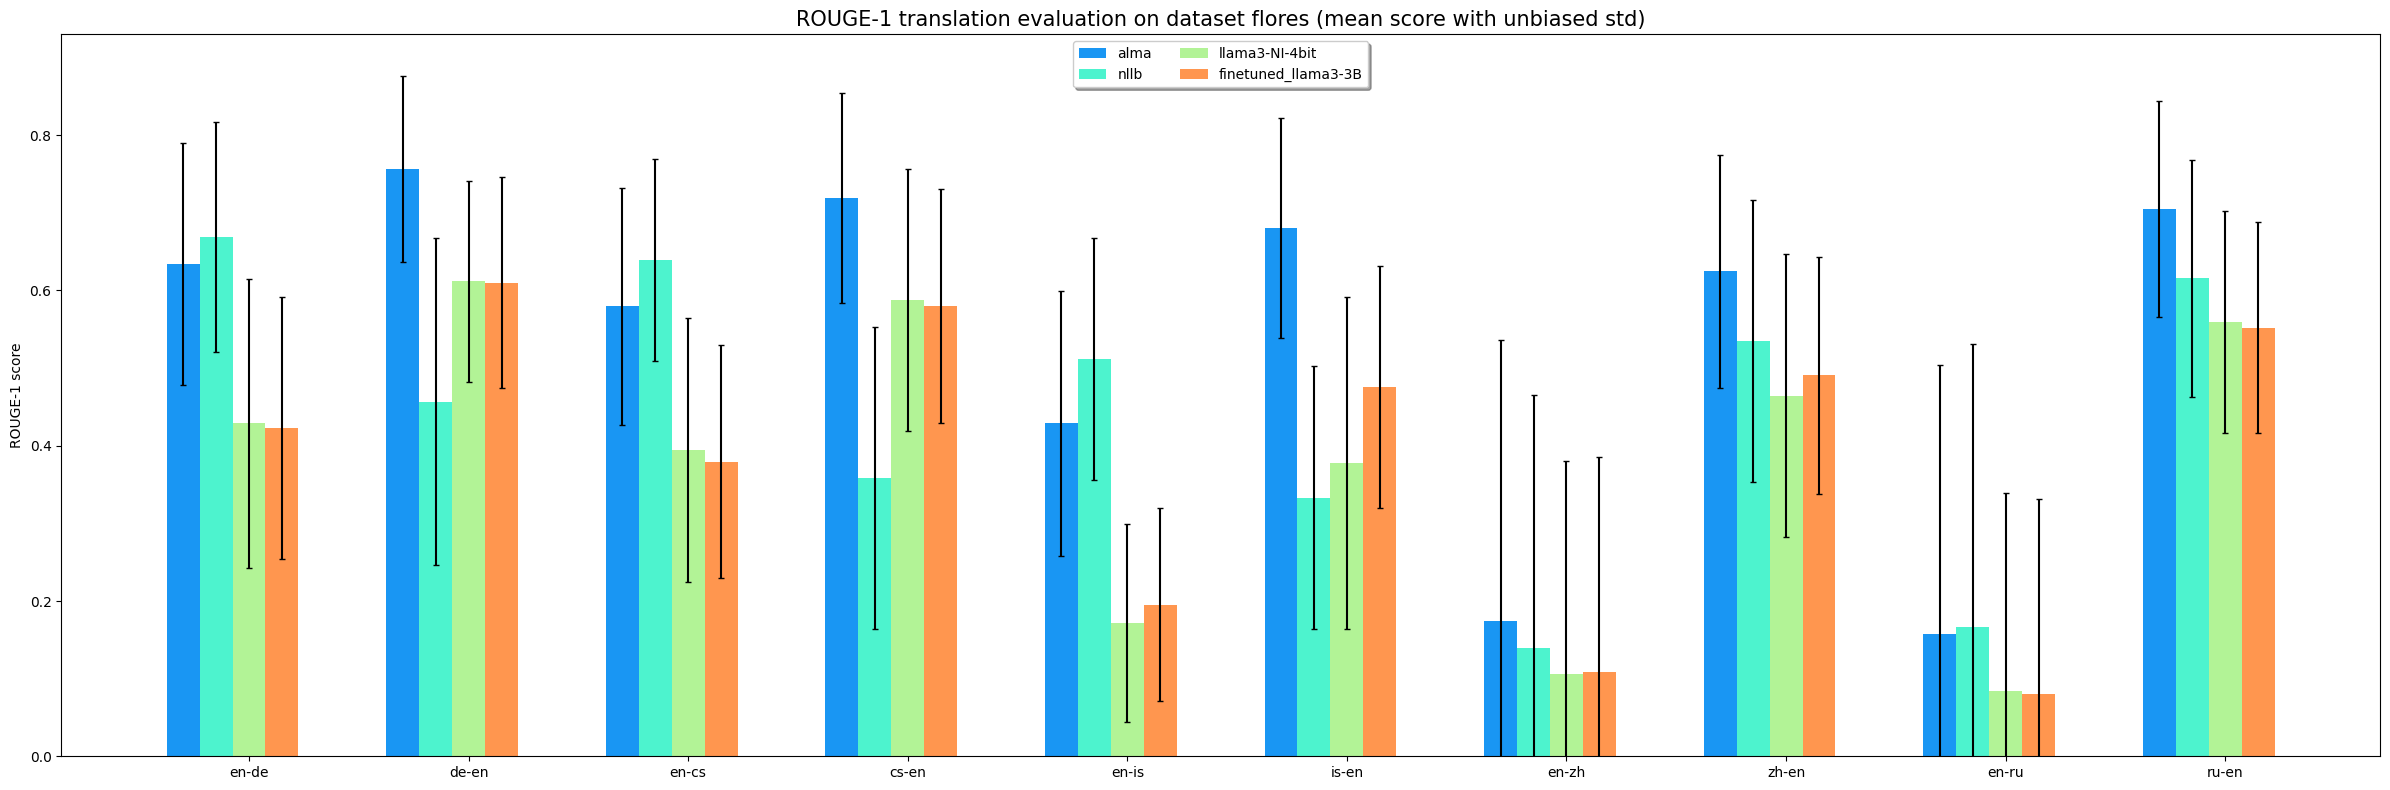

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


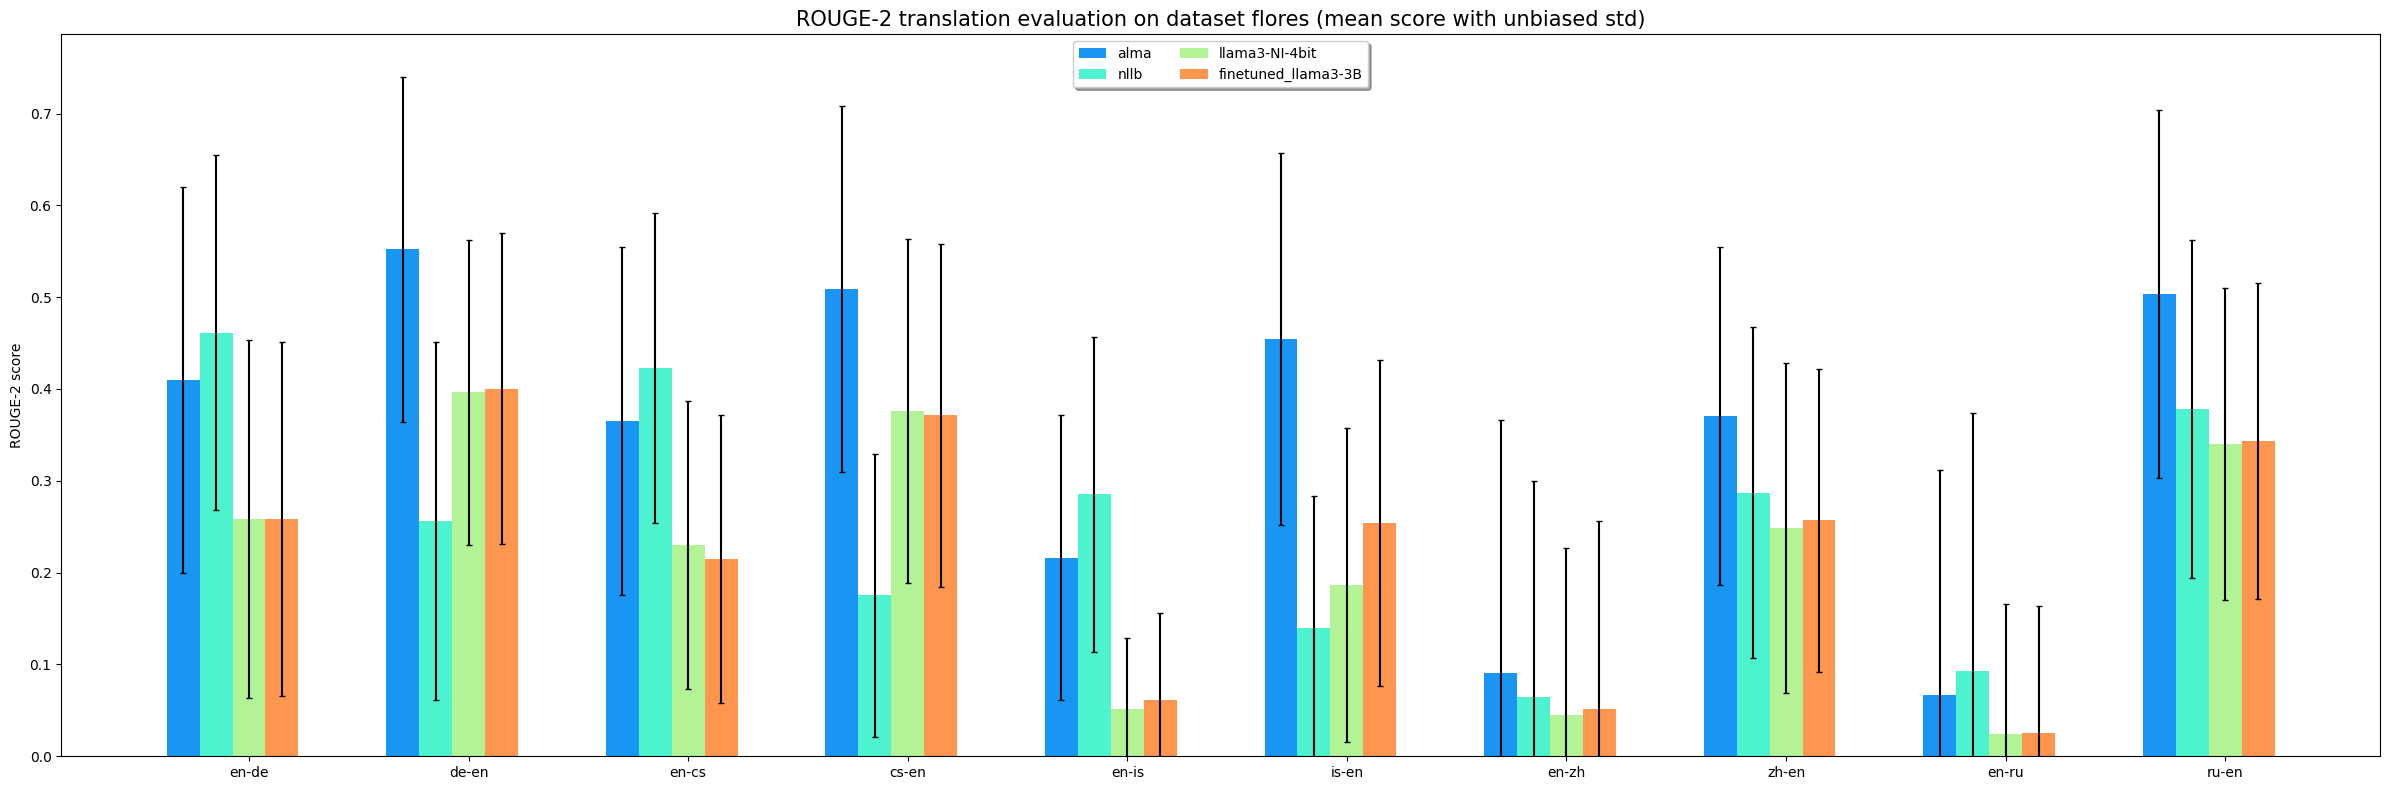

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


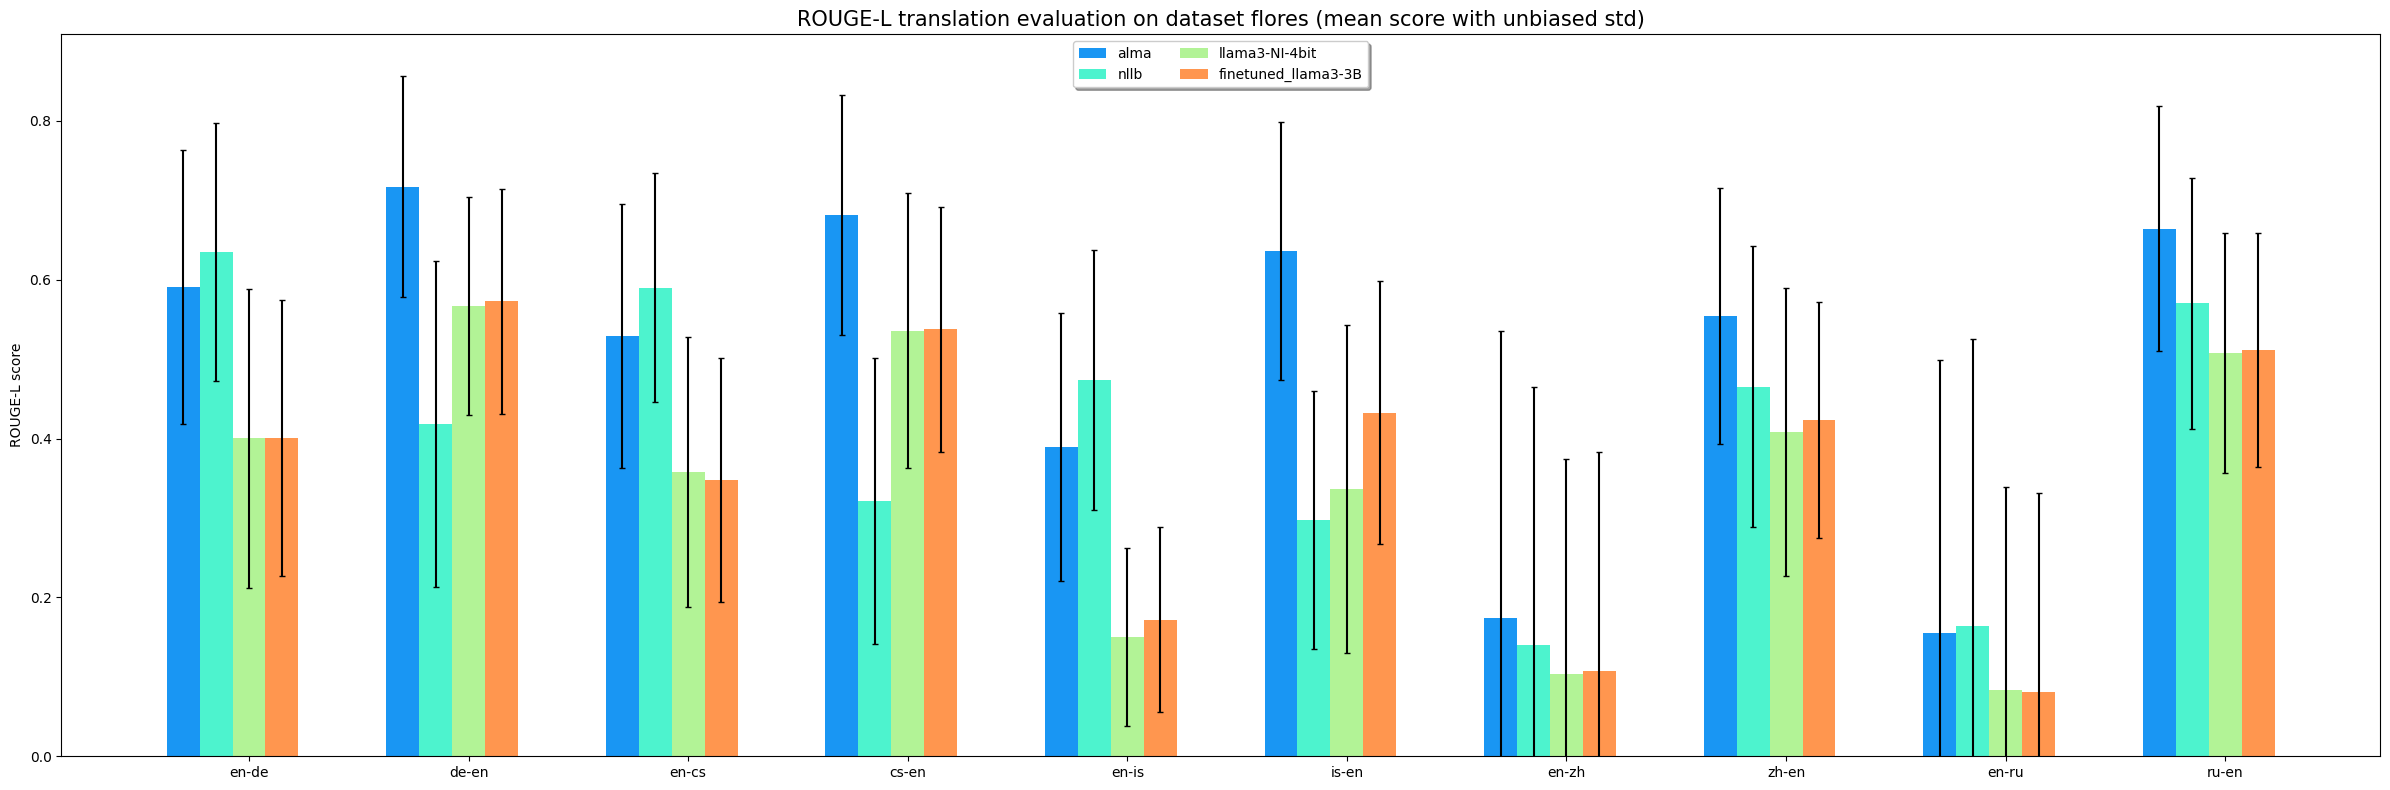

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


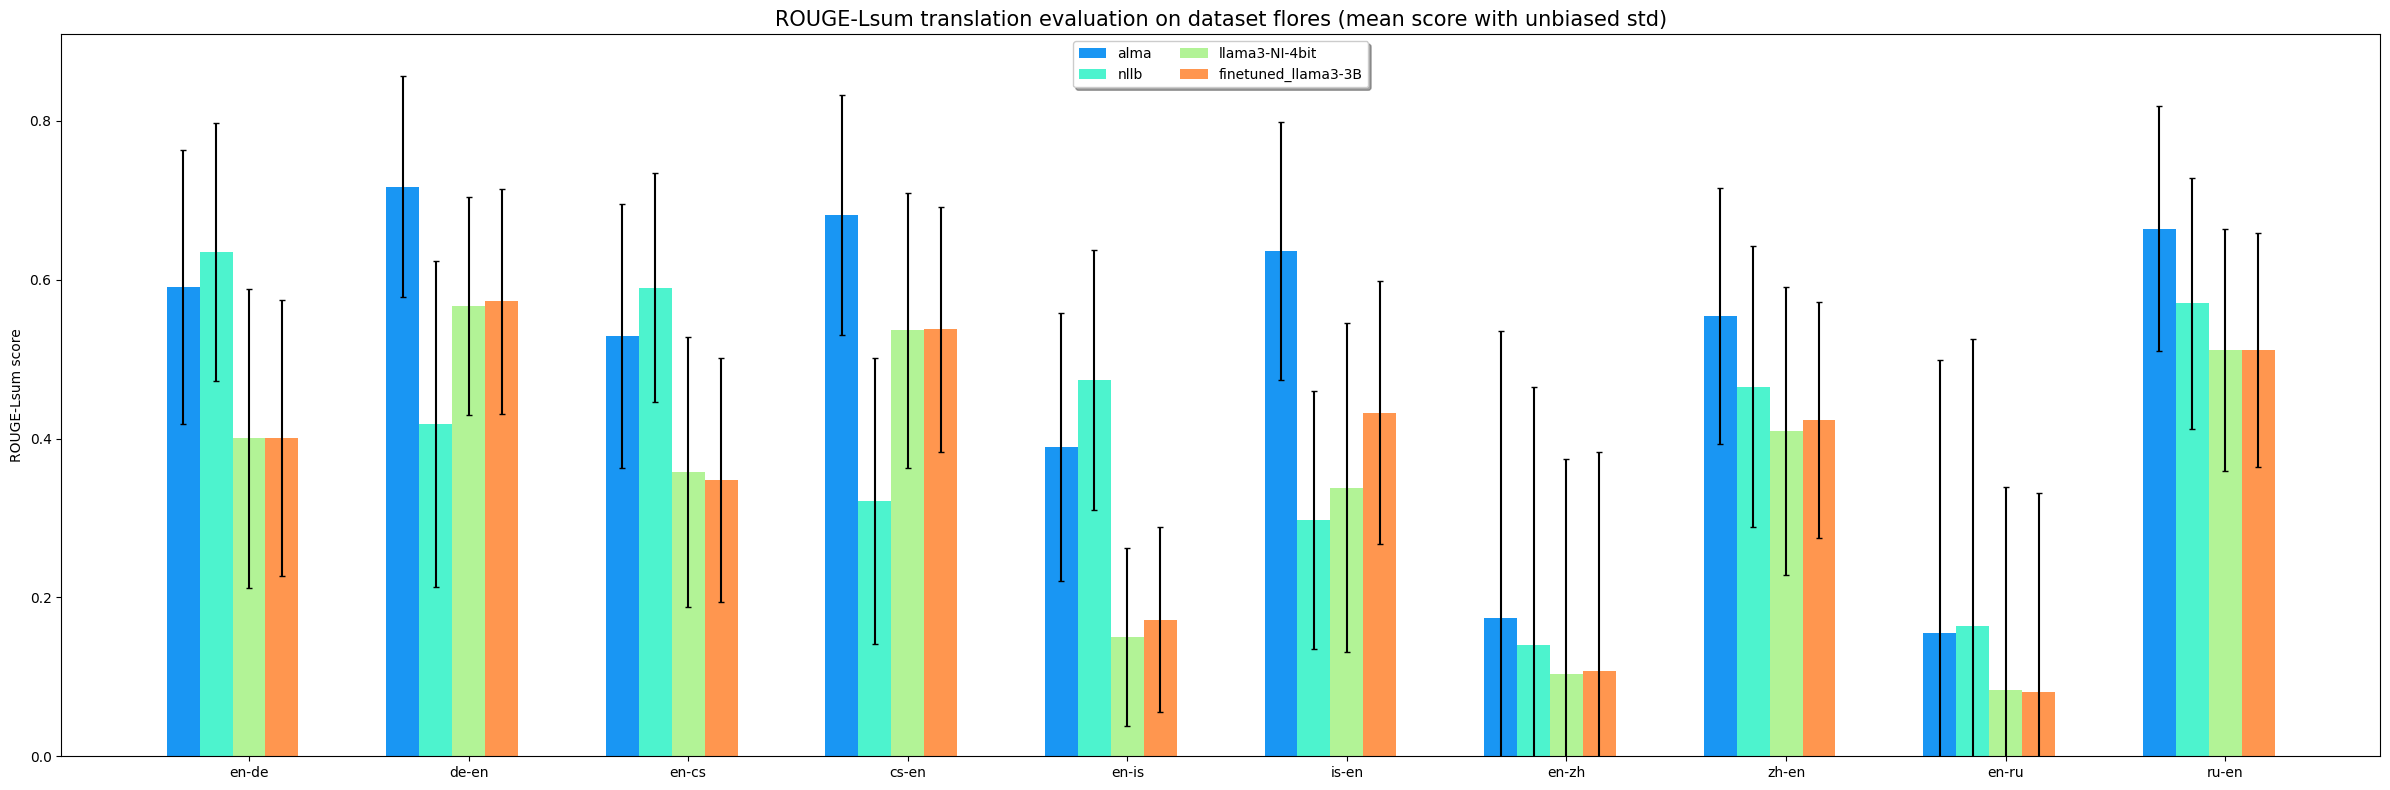

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


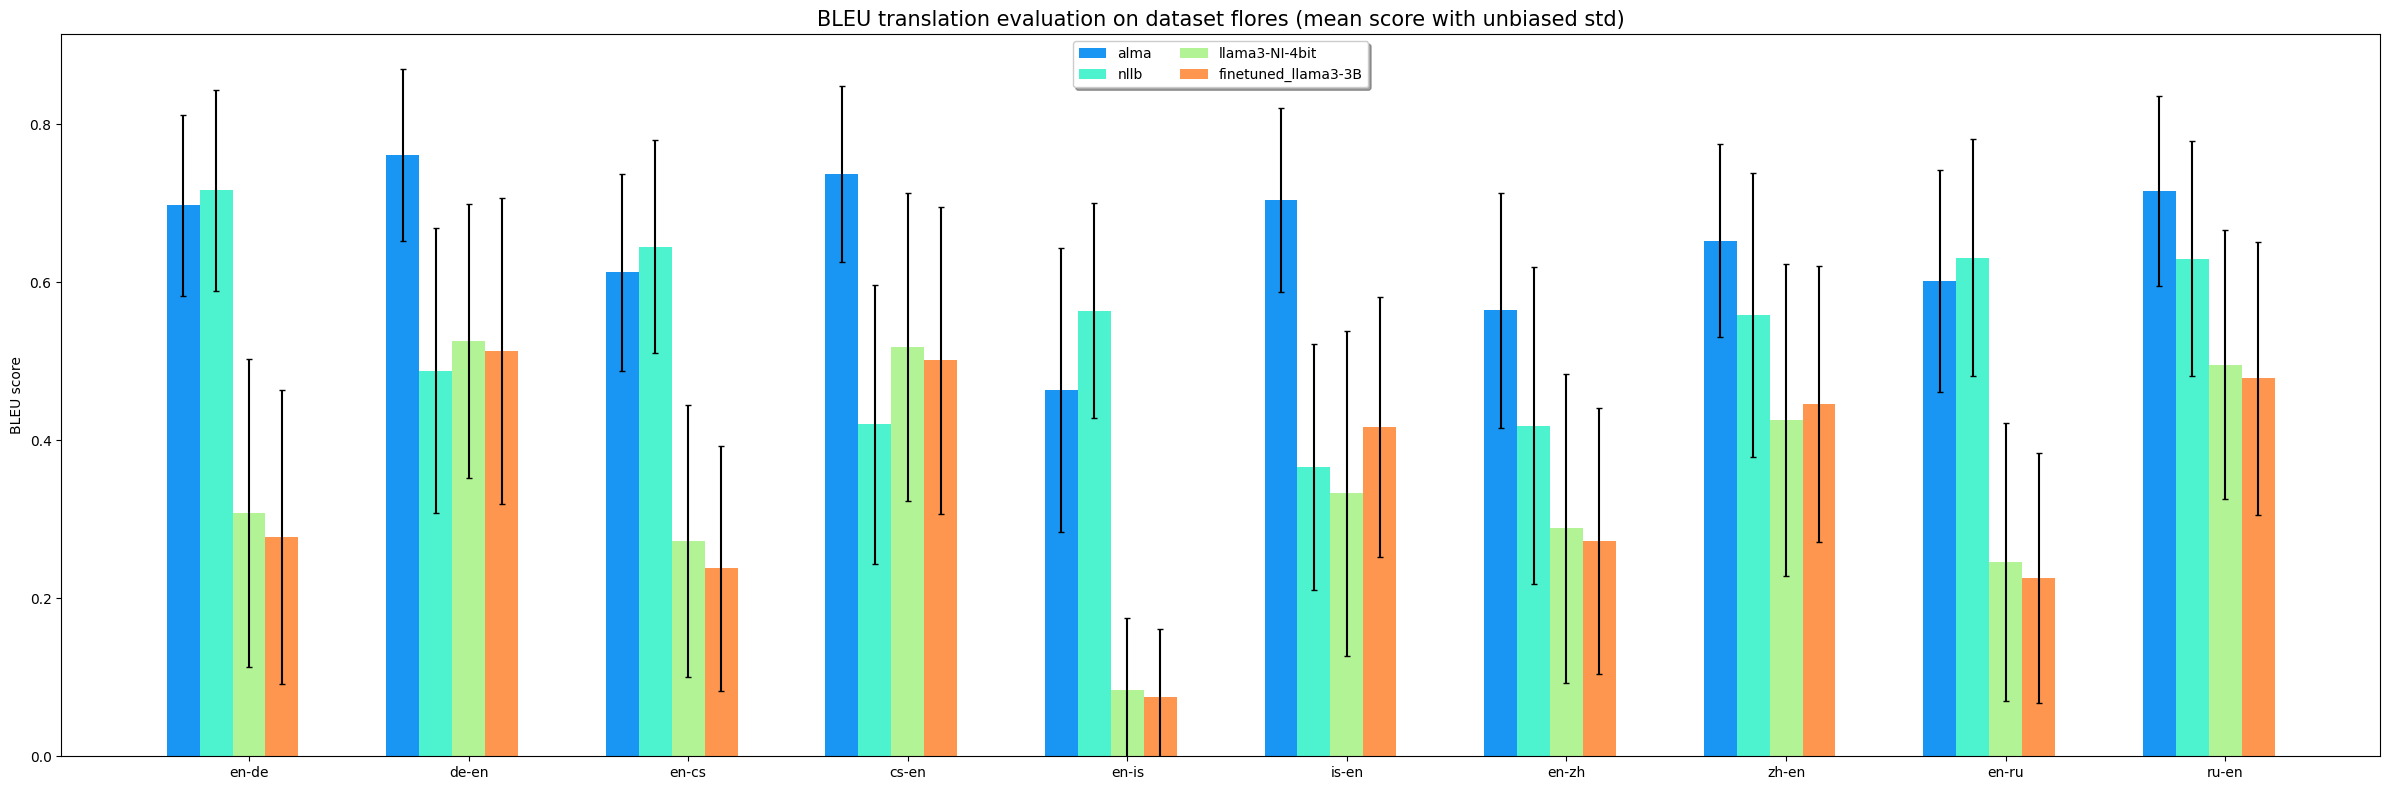

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


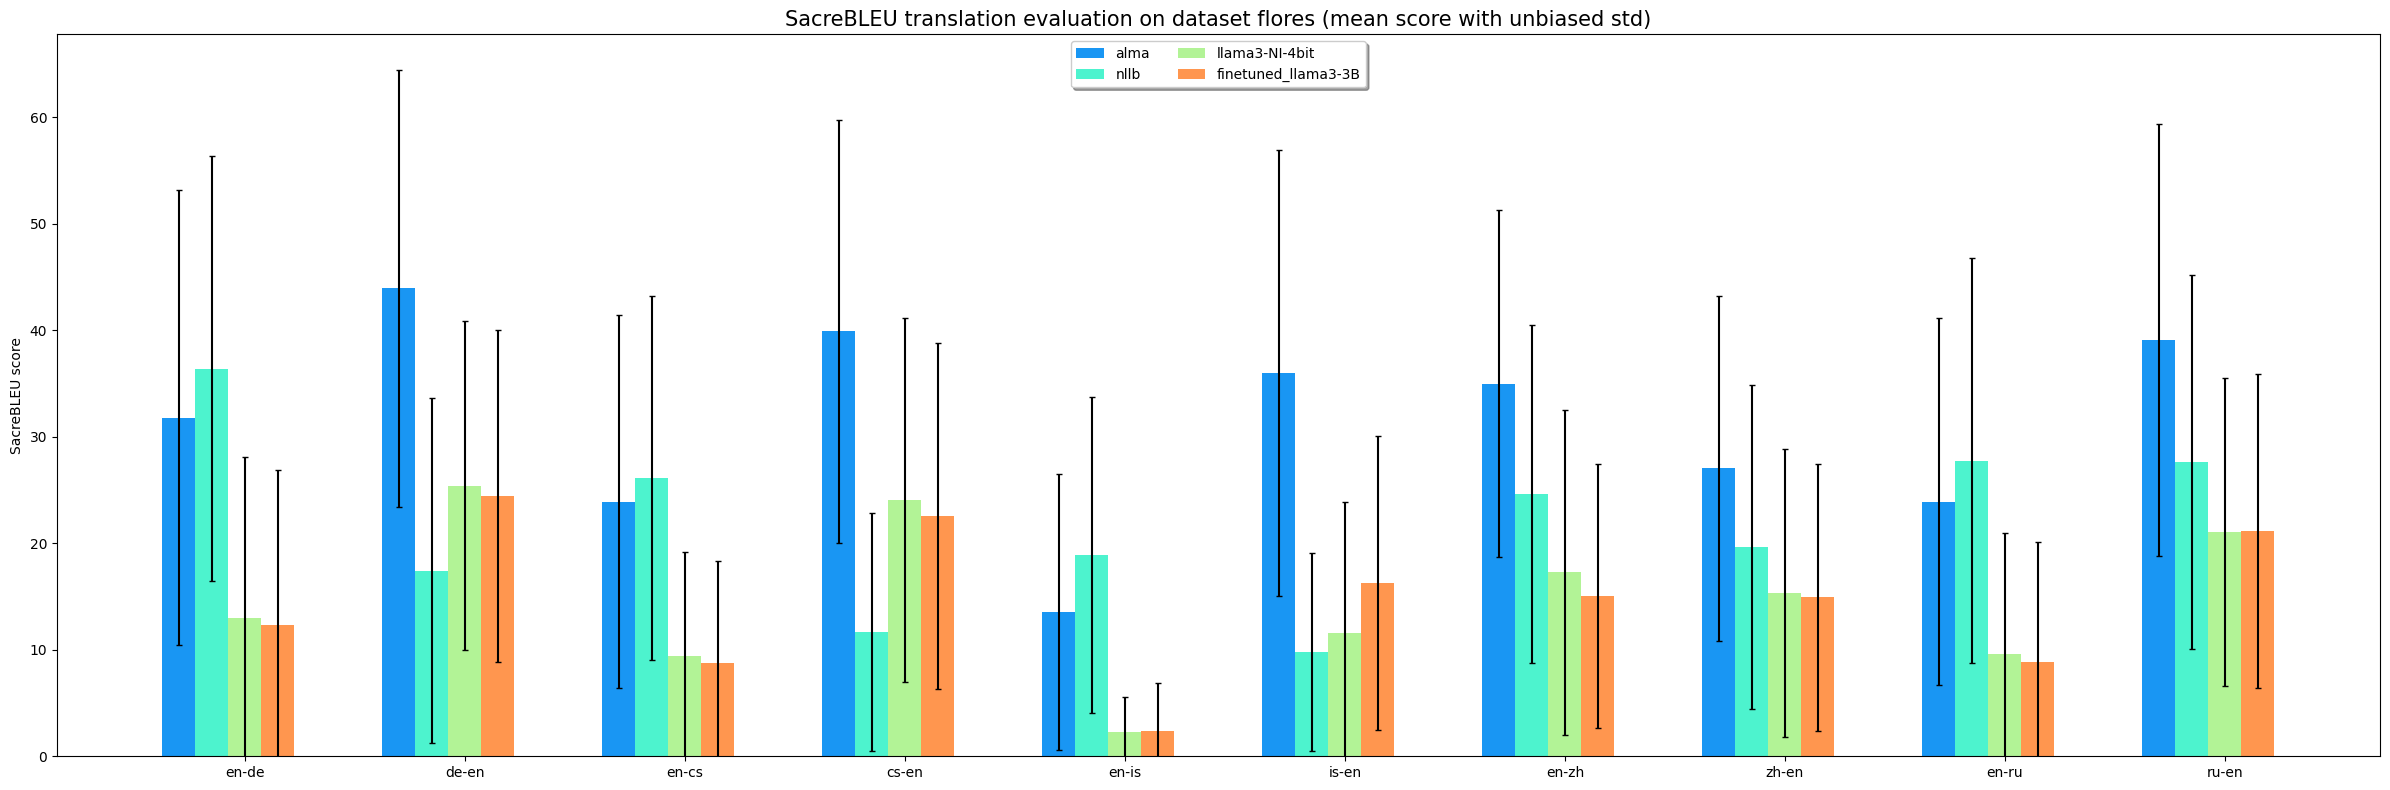

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


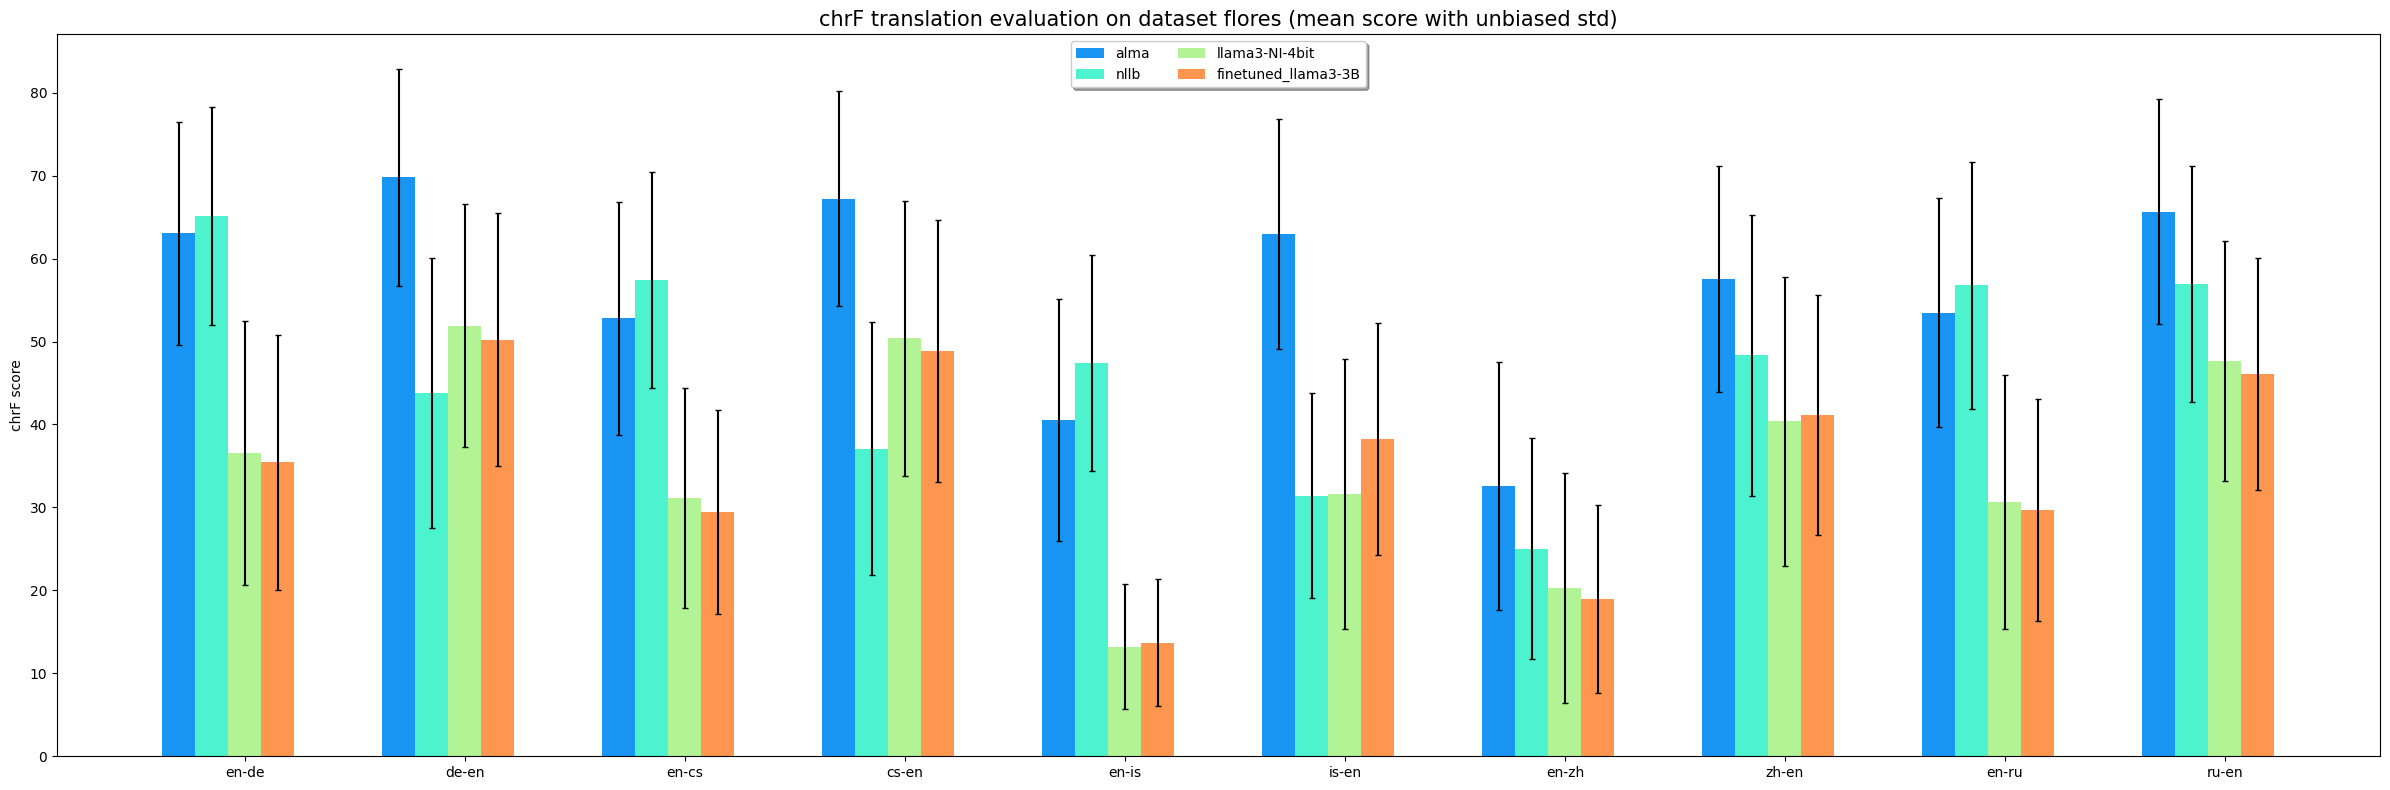

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


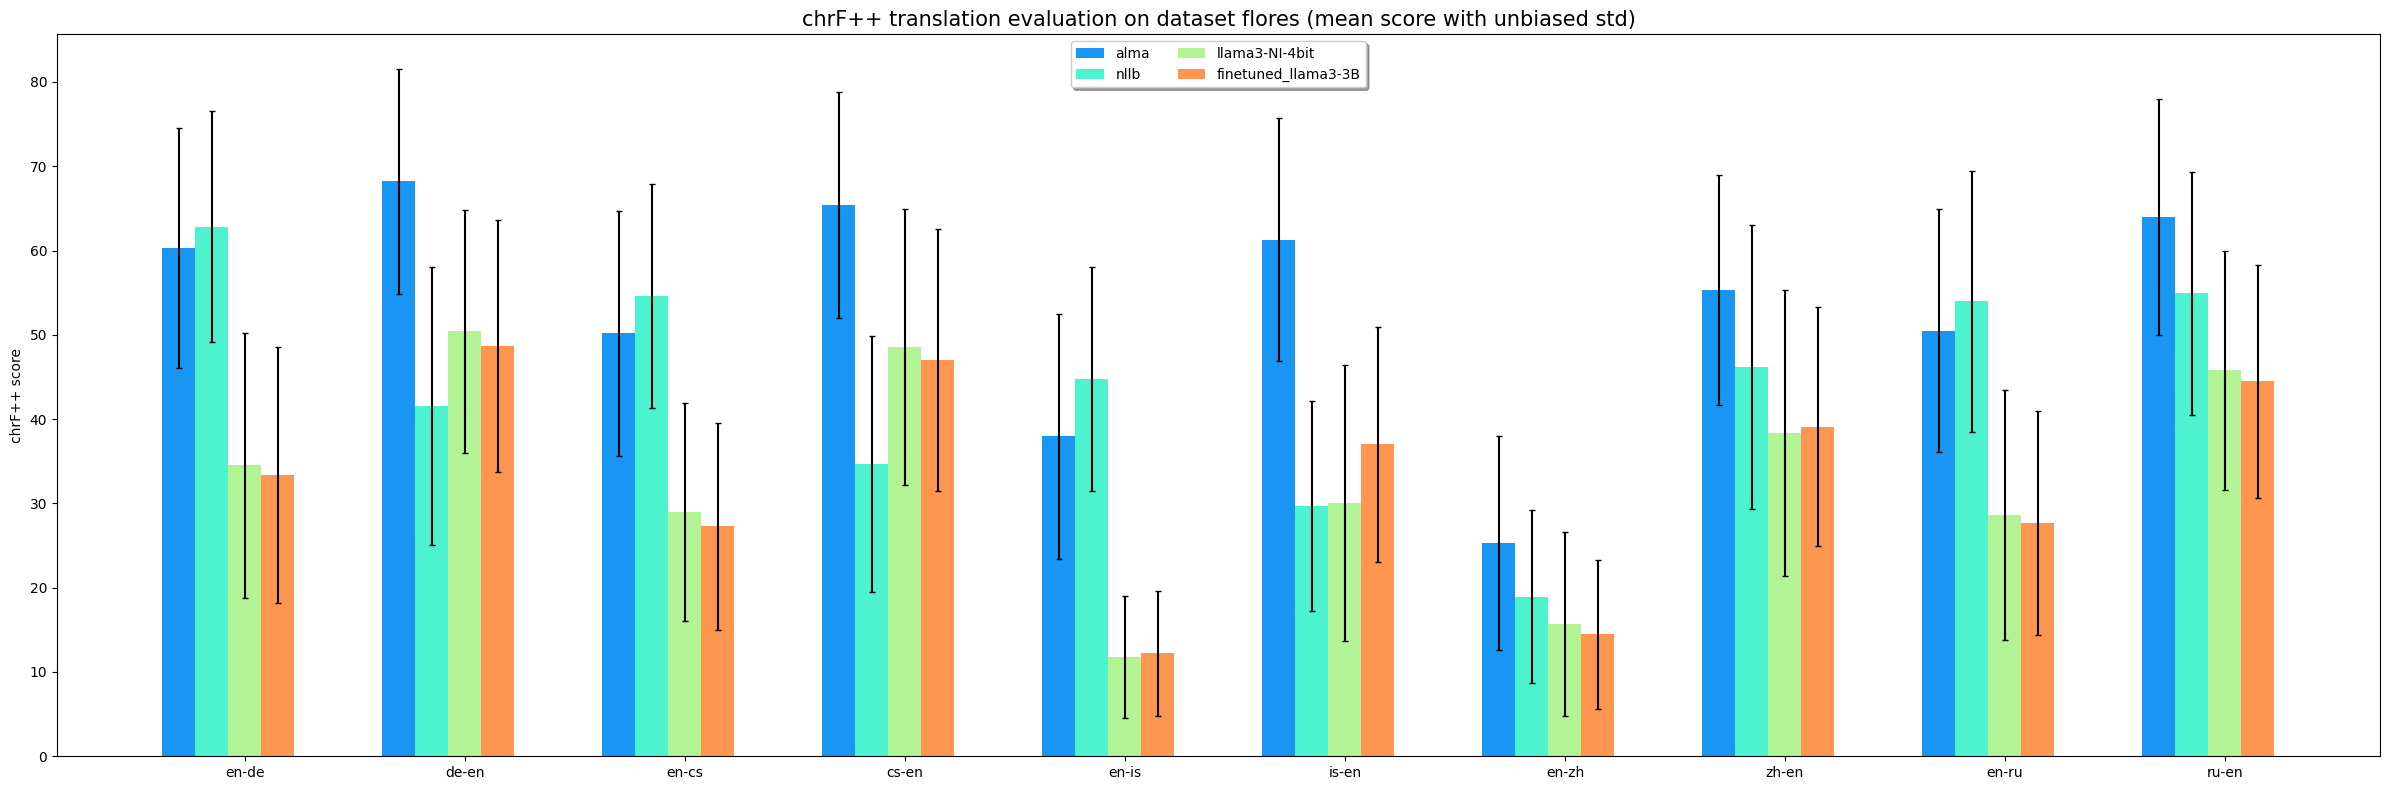

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


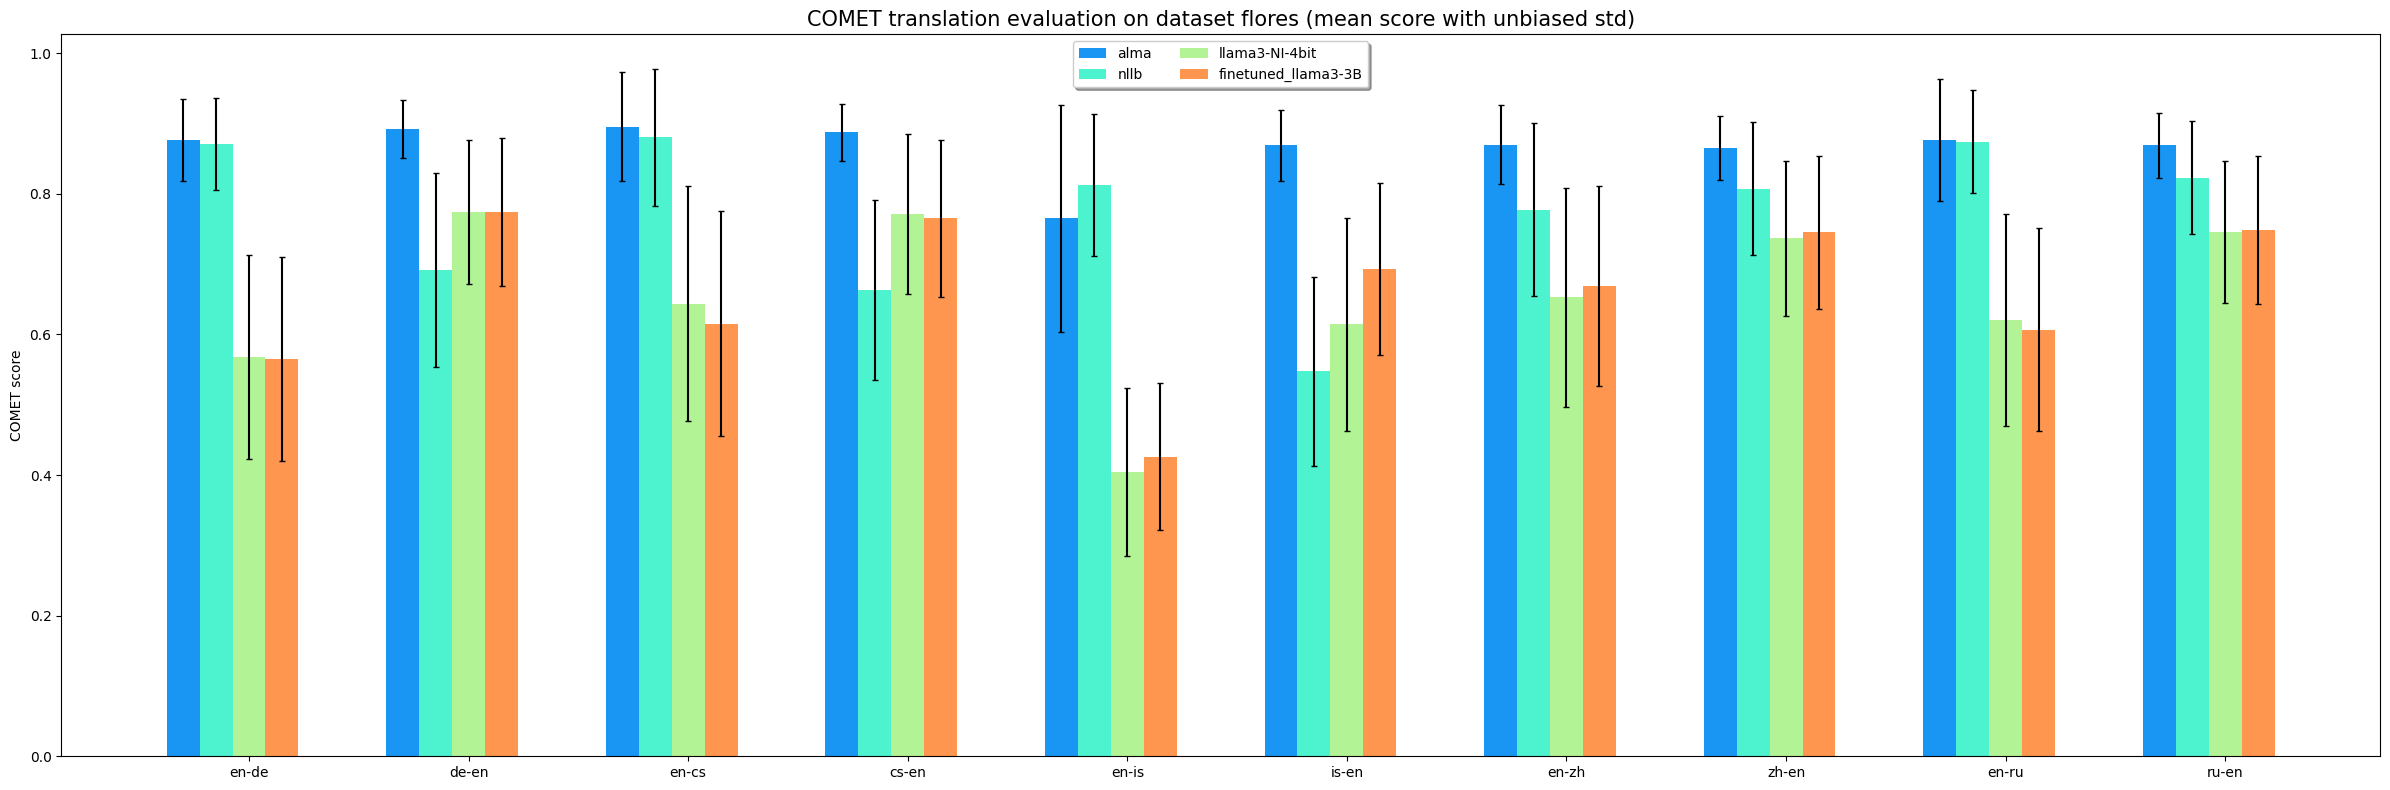

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


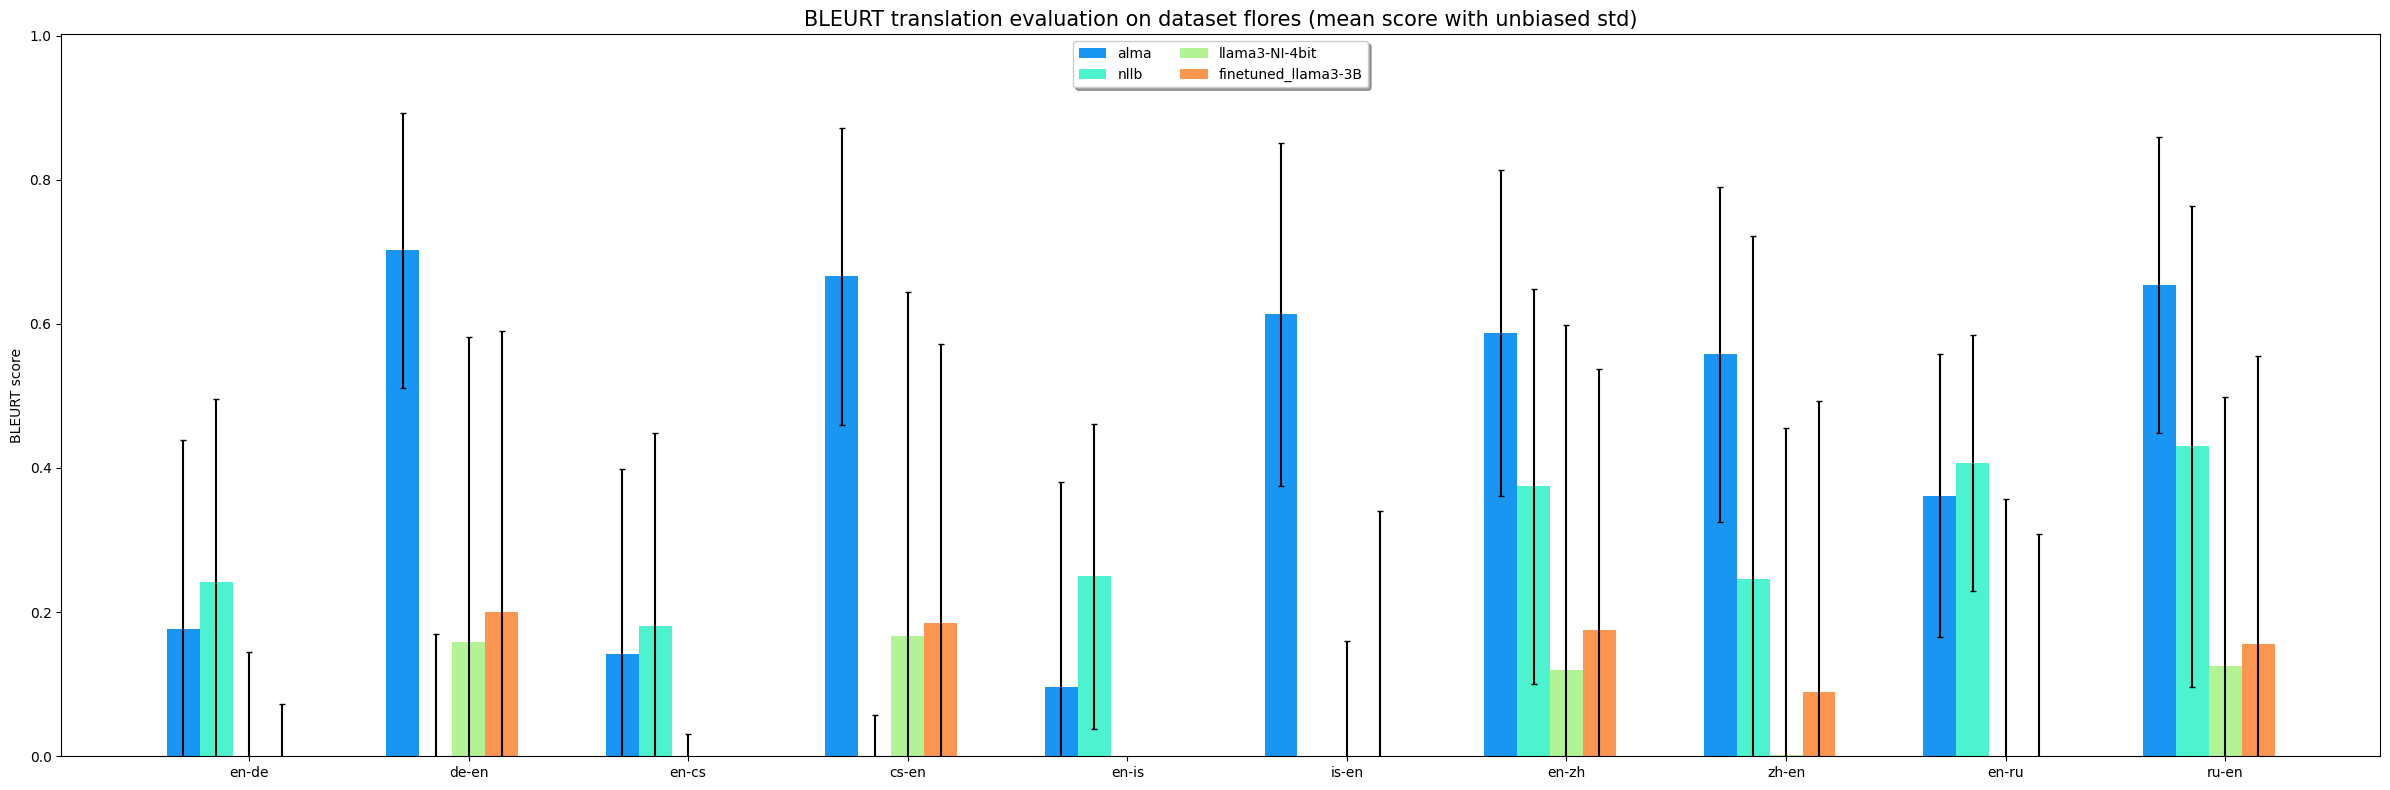

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


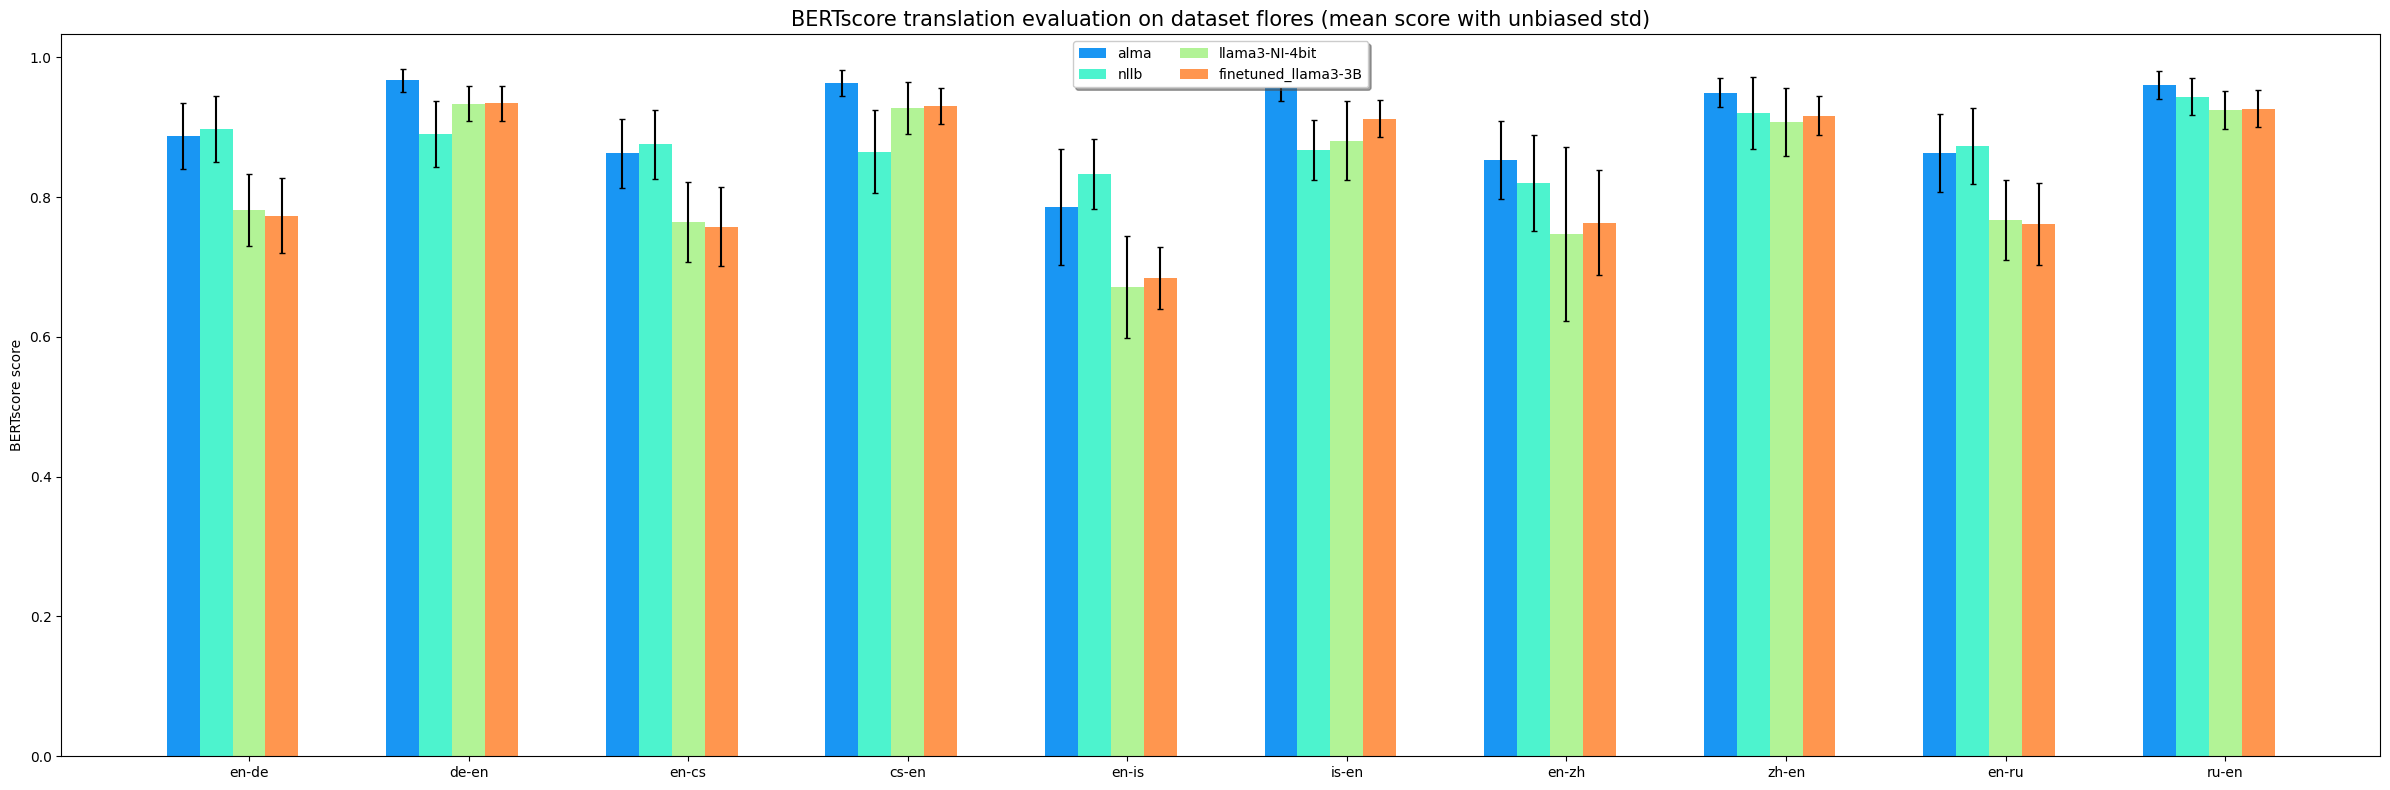

Extracting and concatenating metrics...


/Users/houssem/Documents/MVA/SNLP Project/SNLP-project/utils/utils_plot.py:117: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


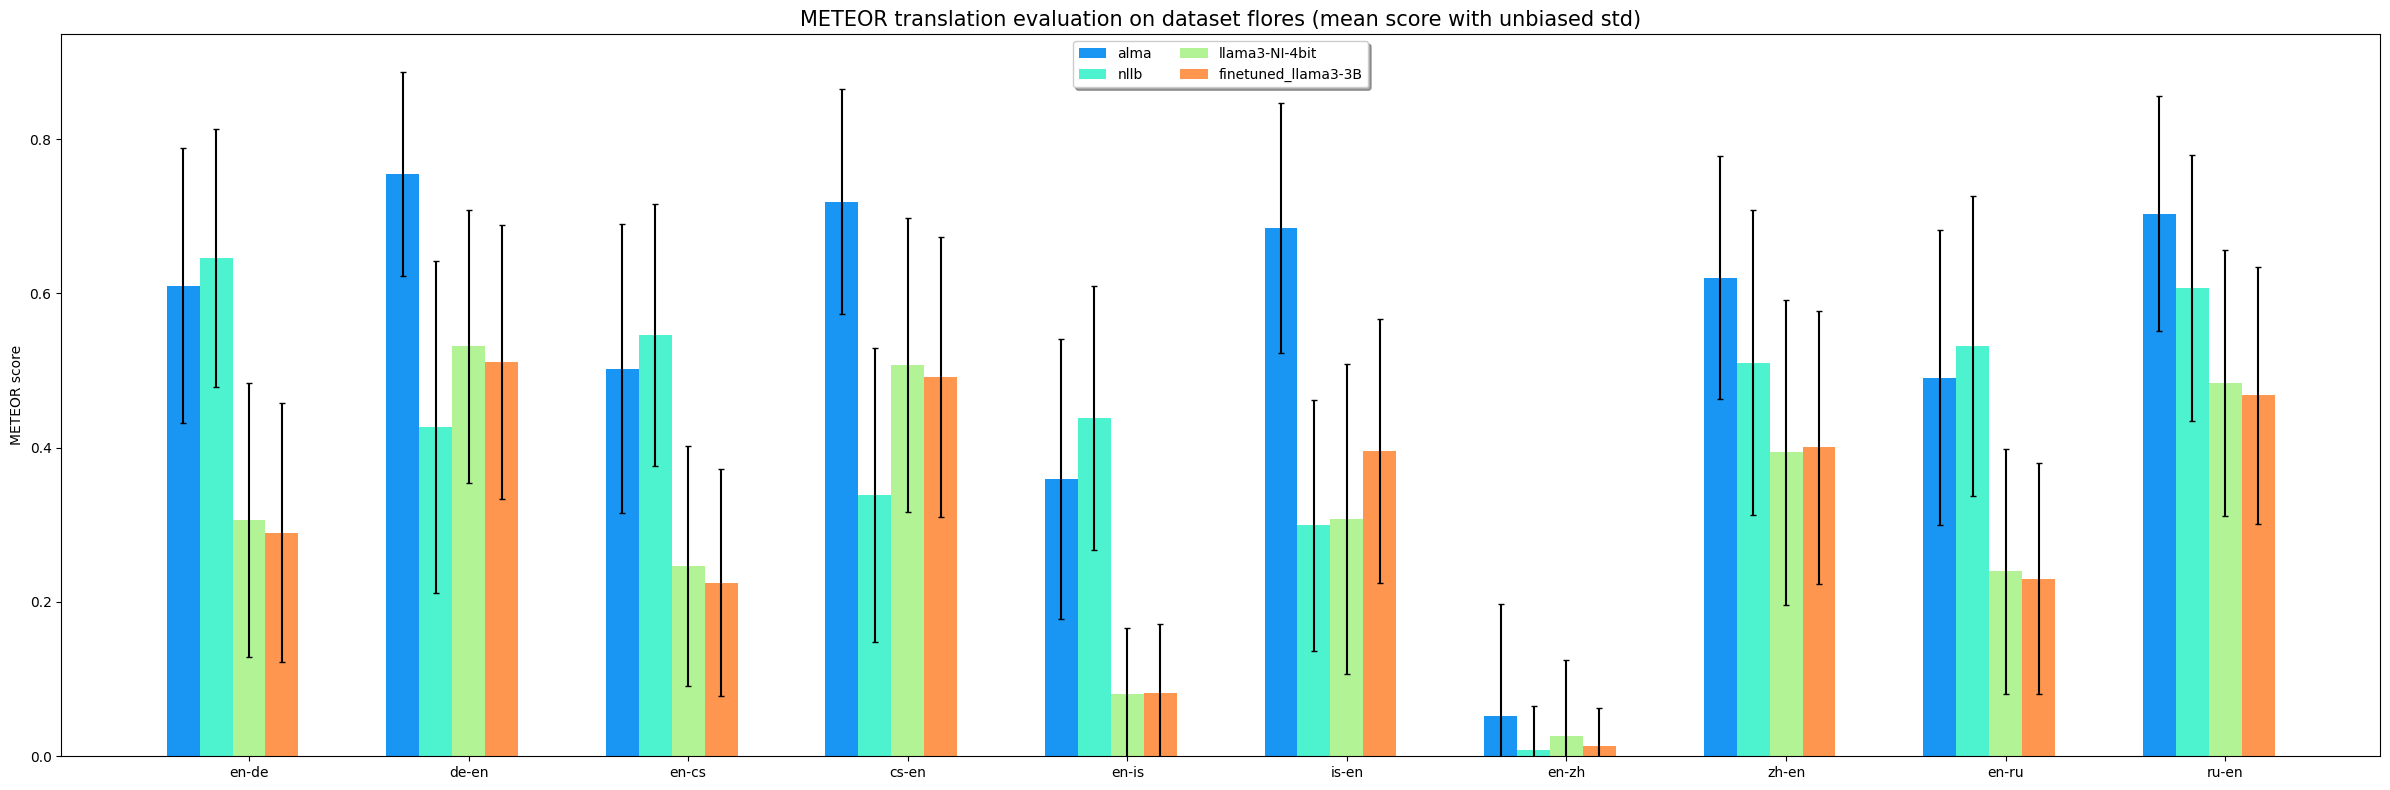

In [11]:
metric_names = ["ROUGE-1", "ROUGE-2", "ROUGE-L", "ROUGE-Lsum",
                "BLEU", "SacreBLEU", "chrF", "chrF++",
                "COMET", "BLEURT", "BERTscore", "METEOR"]

dataset_name = "flores"
reduce_size = 200

directions = ["en-de", "de-en",
              "en-cs", "cs-en",
              "en-is", "is-en",
              "en-zh", "zh-en",
              "en-ru", "ru-en"]

model_names = ["alma",
               "nllb",
               "llama3-NI-4bit",
               "finetuned_llama3-3B"]
model_sizes = [None,
               None,
               None,
               None]

make_bar_plot(directions,
                model_names, model_sizes,
                dataset_name, reduce_size,
                metric_names,
                width=0.15,
                cmap="rainbow",
                savepath = "./results/evaluations_figures/barplot_flores_llama-3B_finetuned")

Extracting and concatenating metrics...


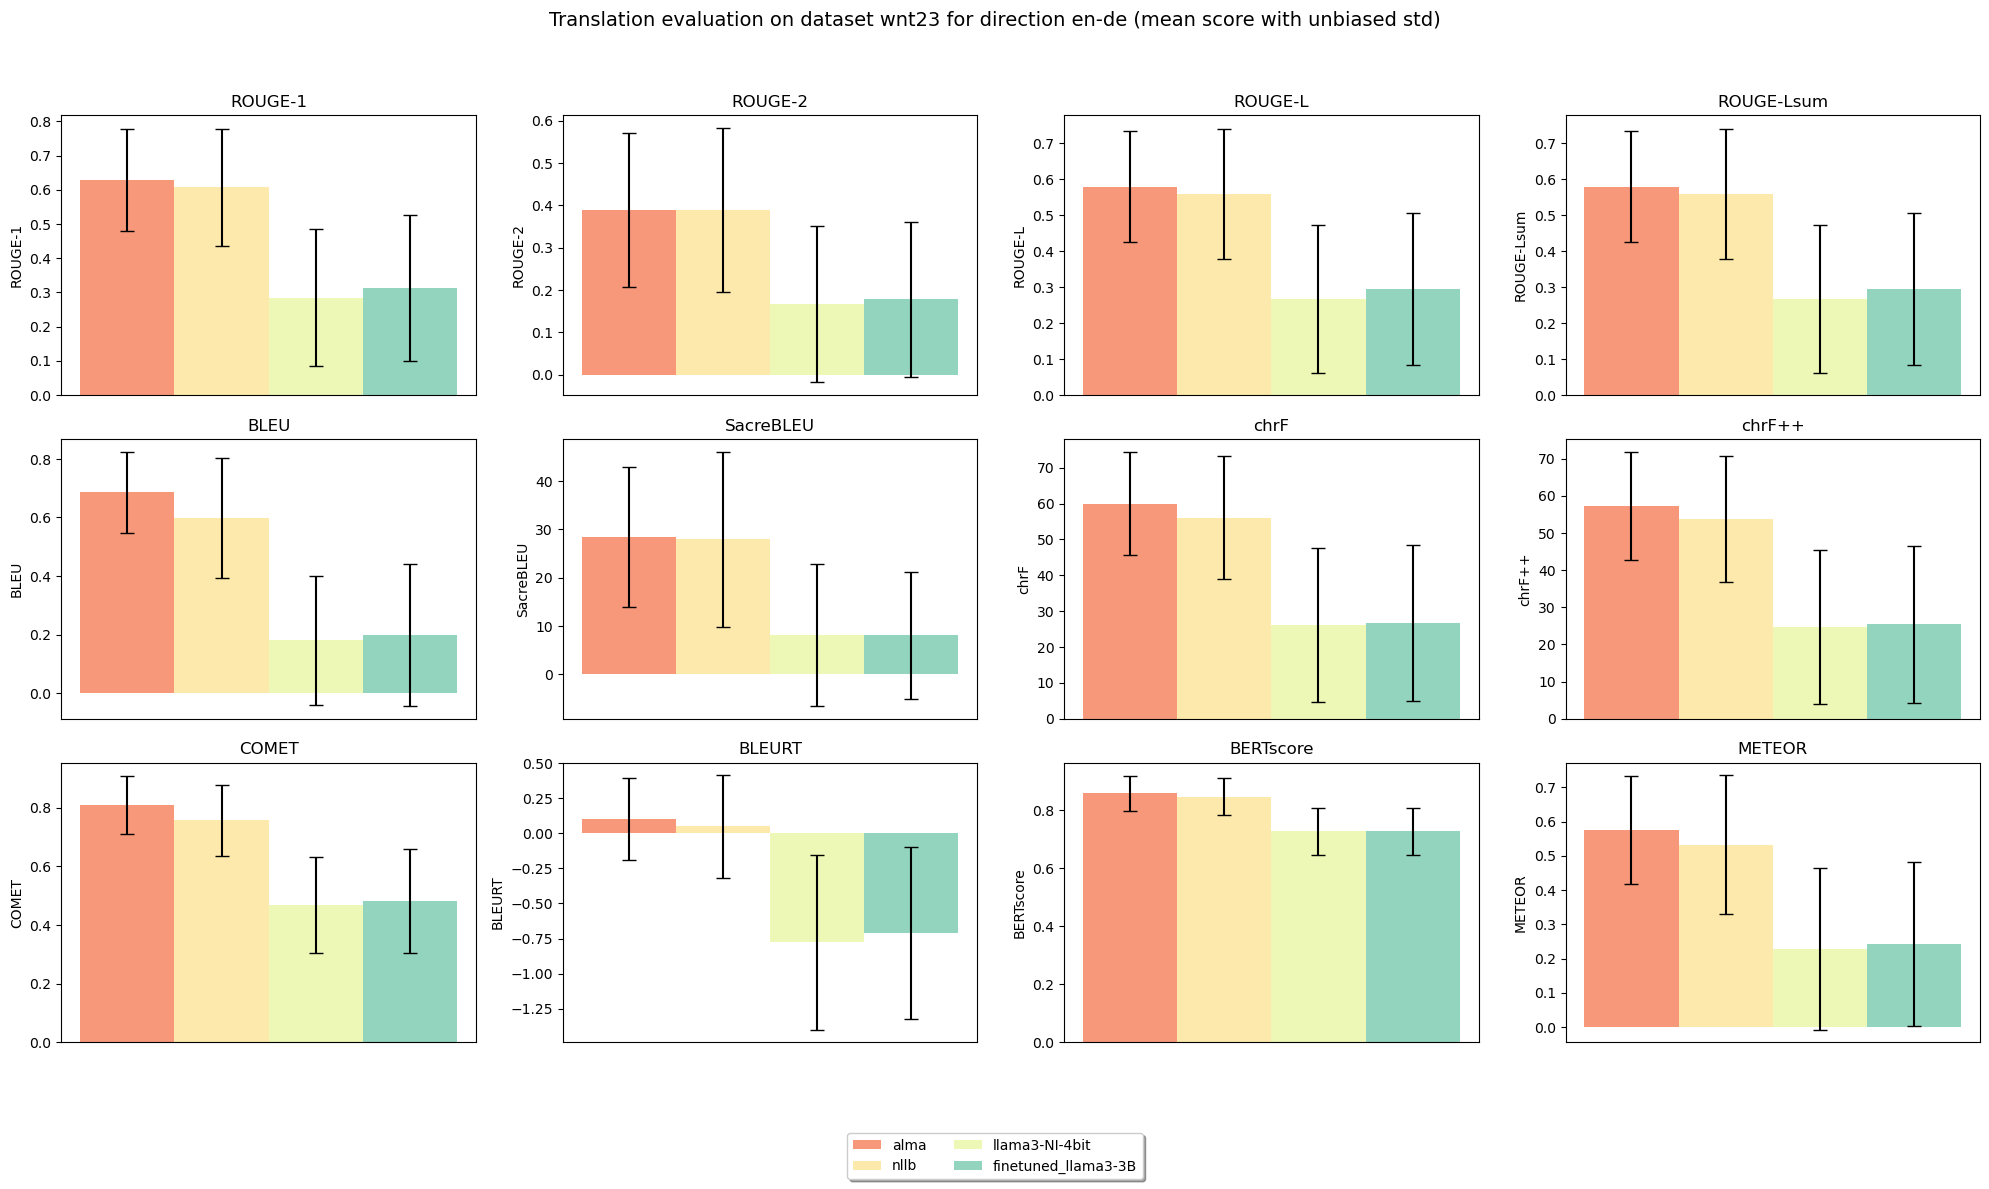

Extracting and concatenating metrics...


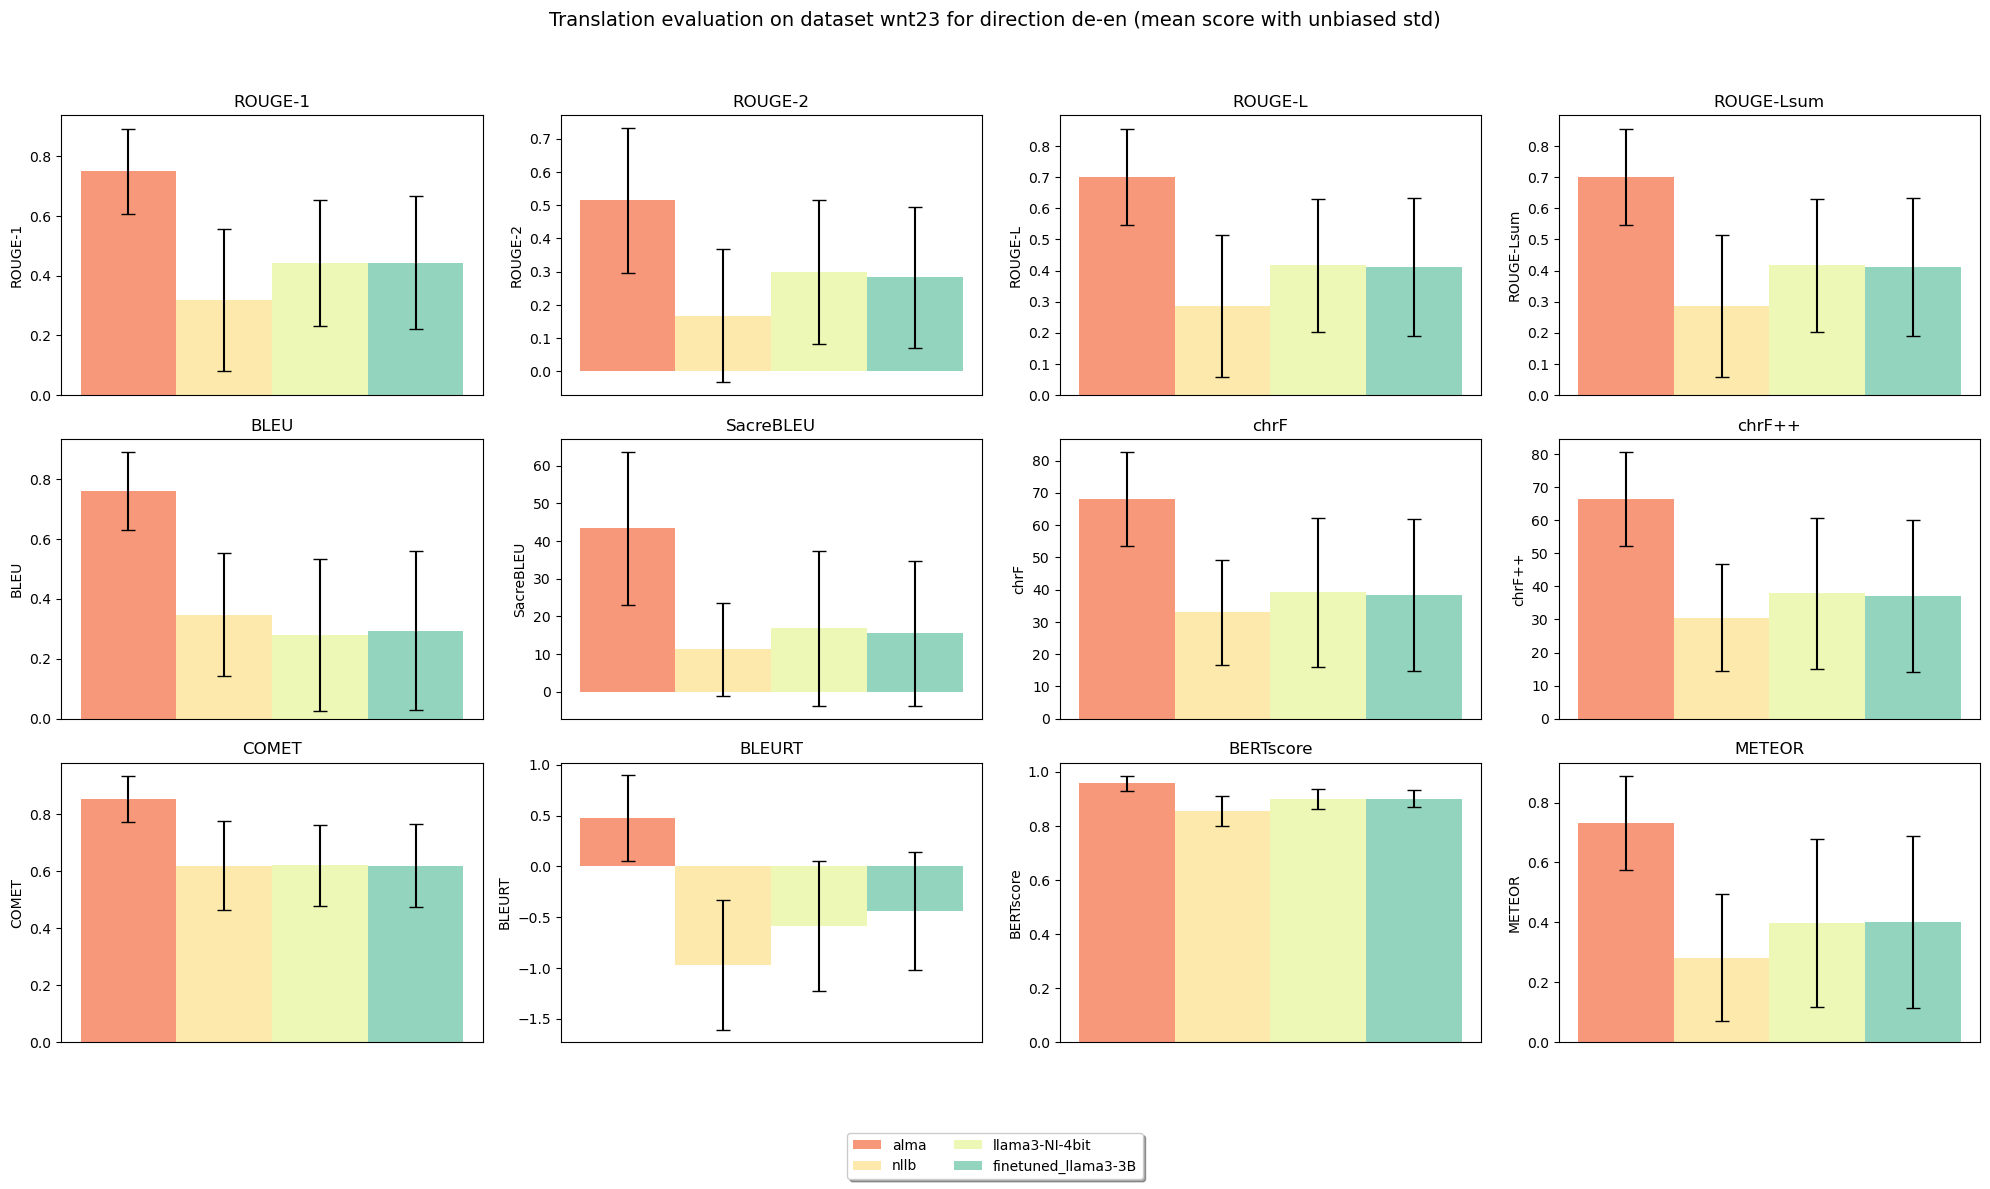

Extracting and concatenating metrics...


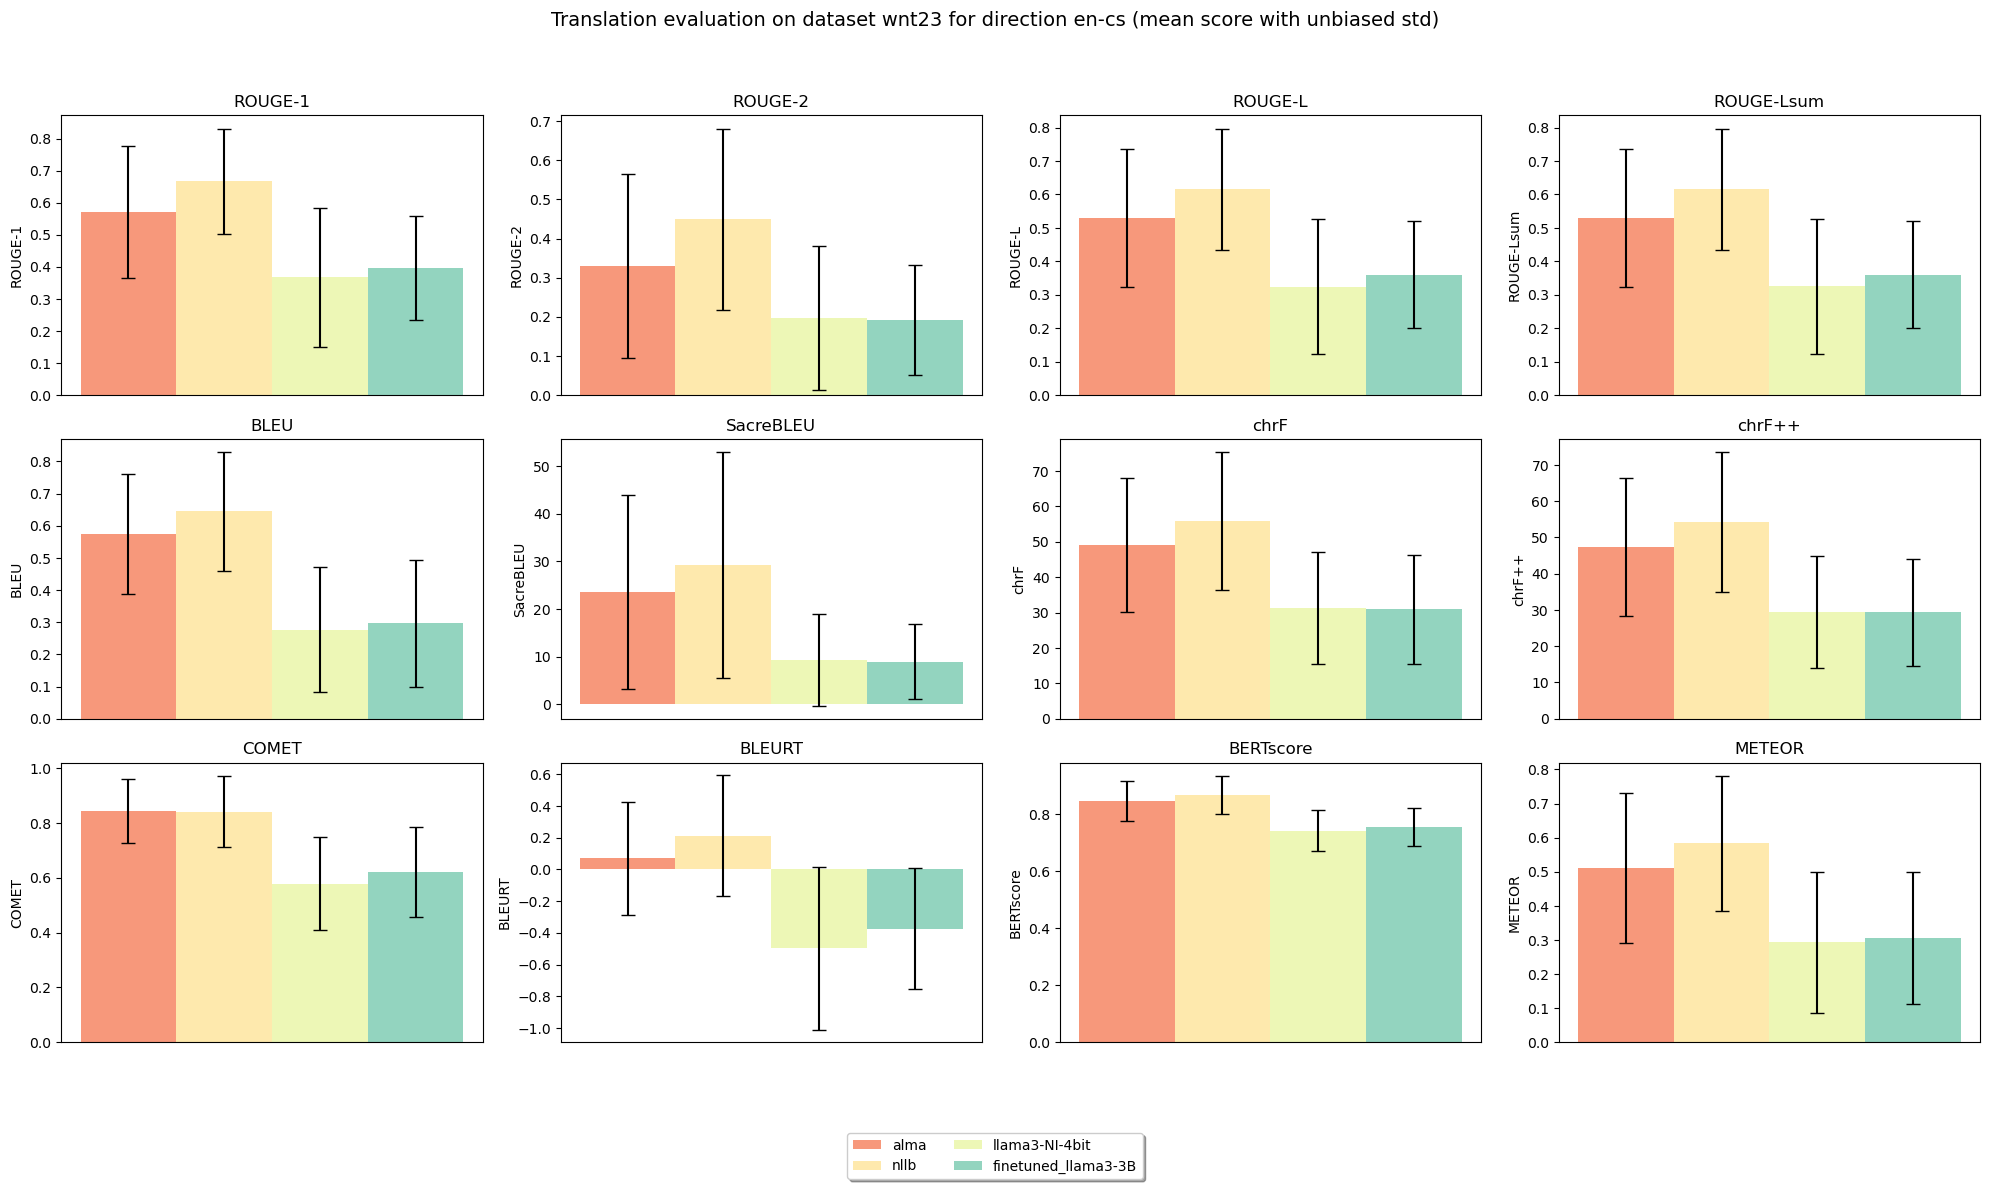

Extracting and concatenating metrics...


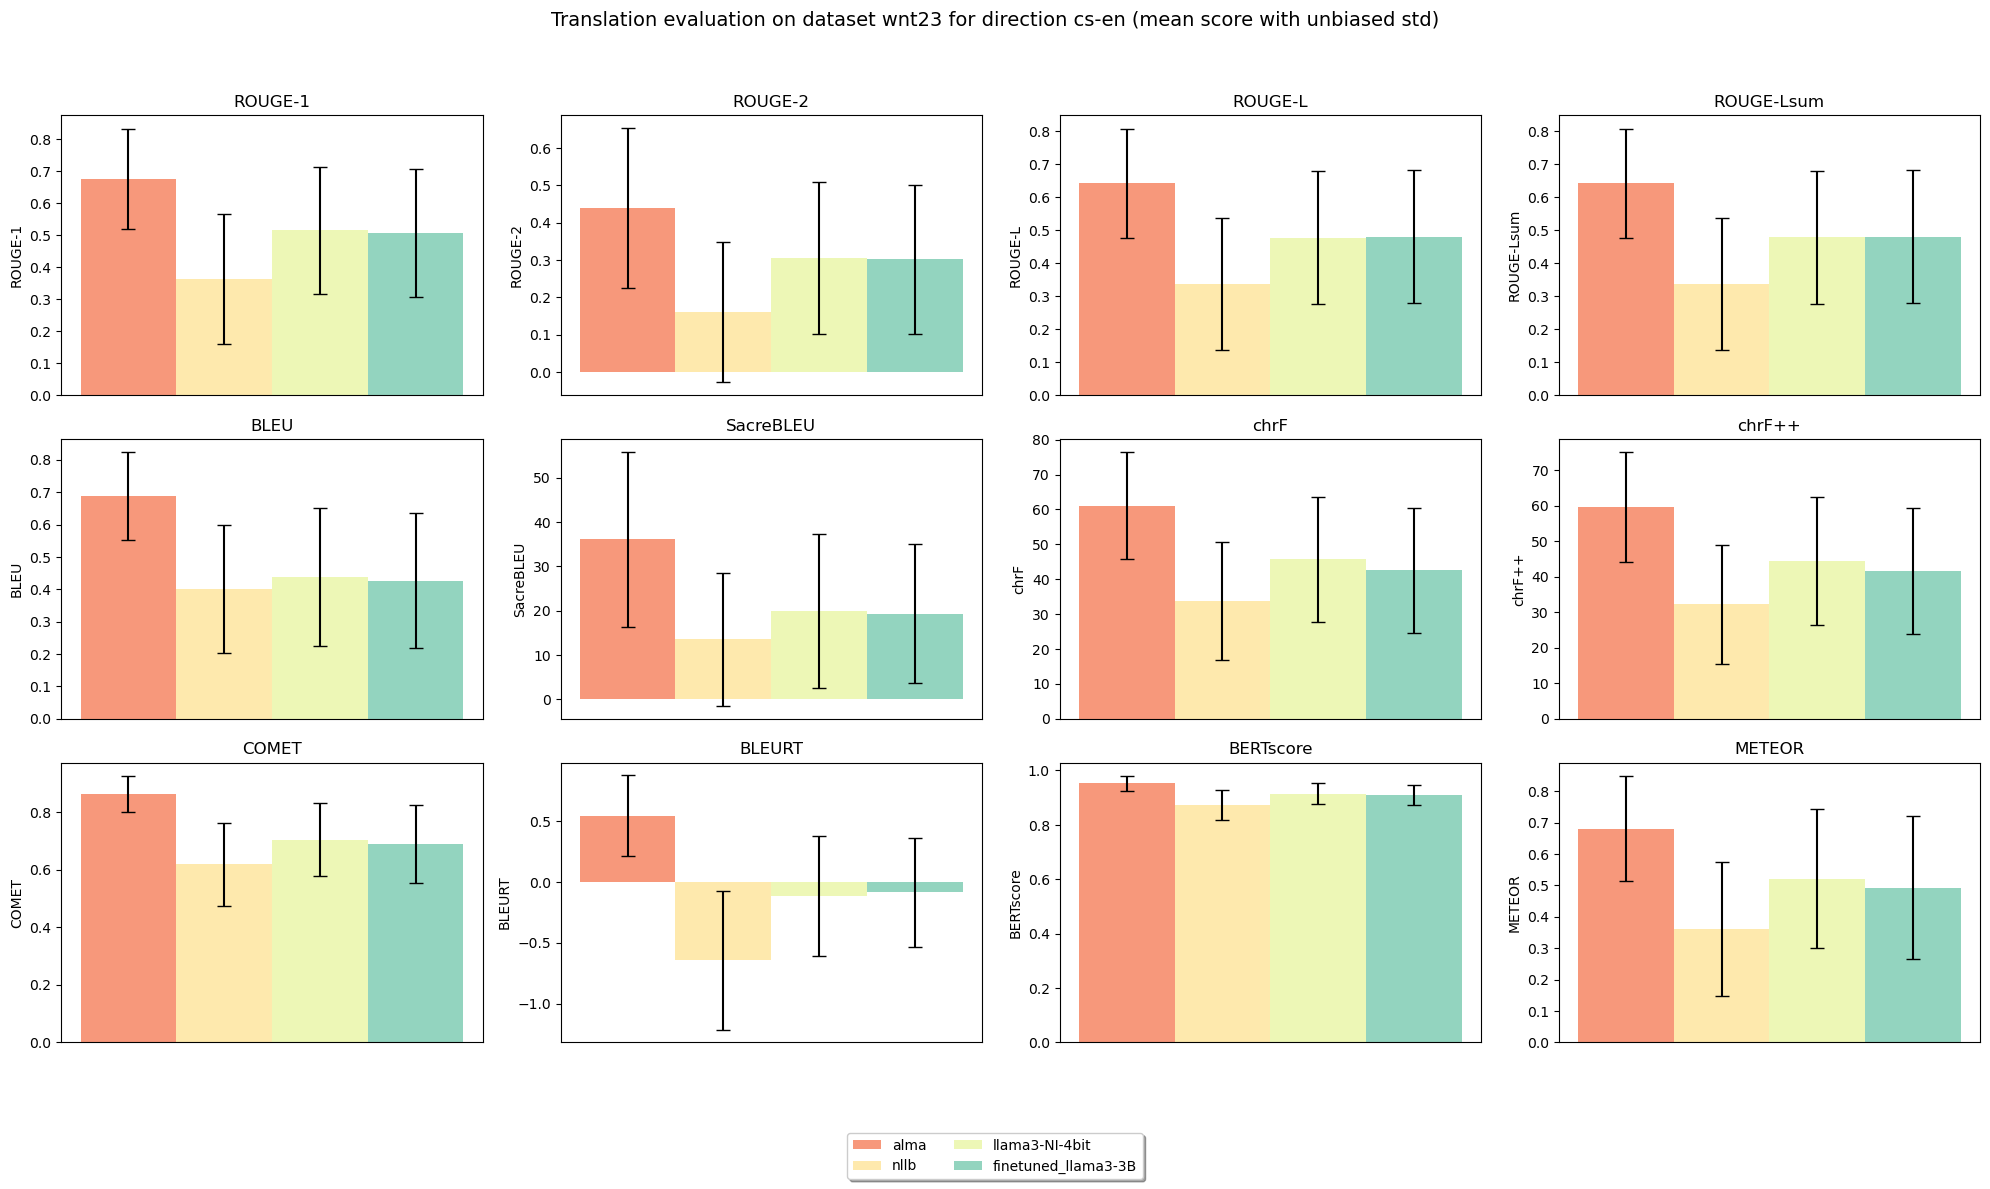

Extracting and concatenating metrics...


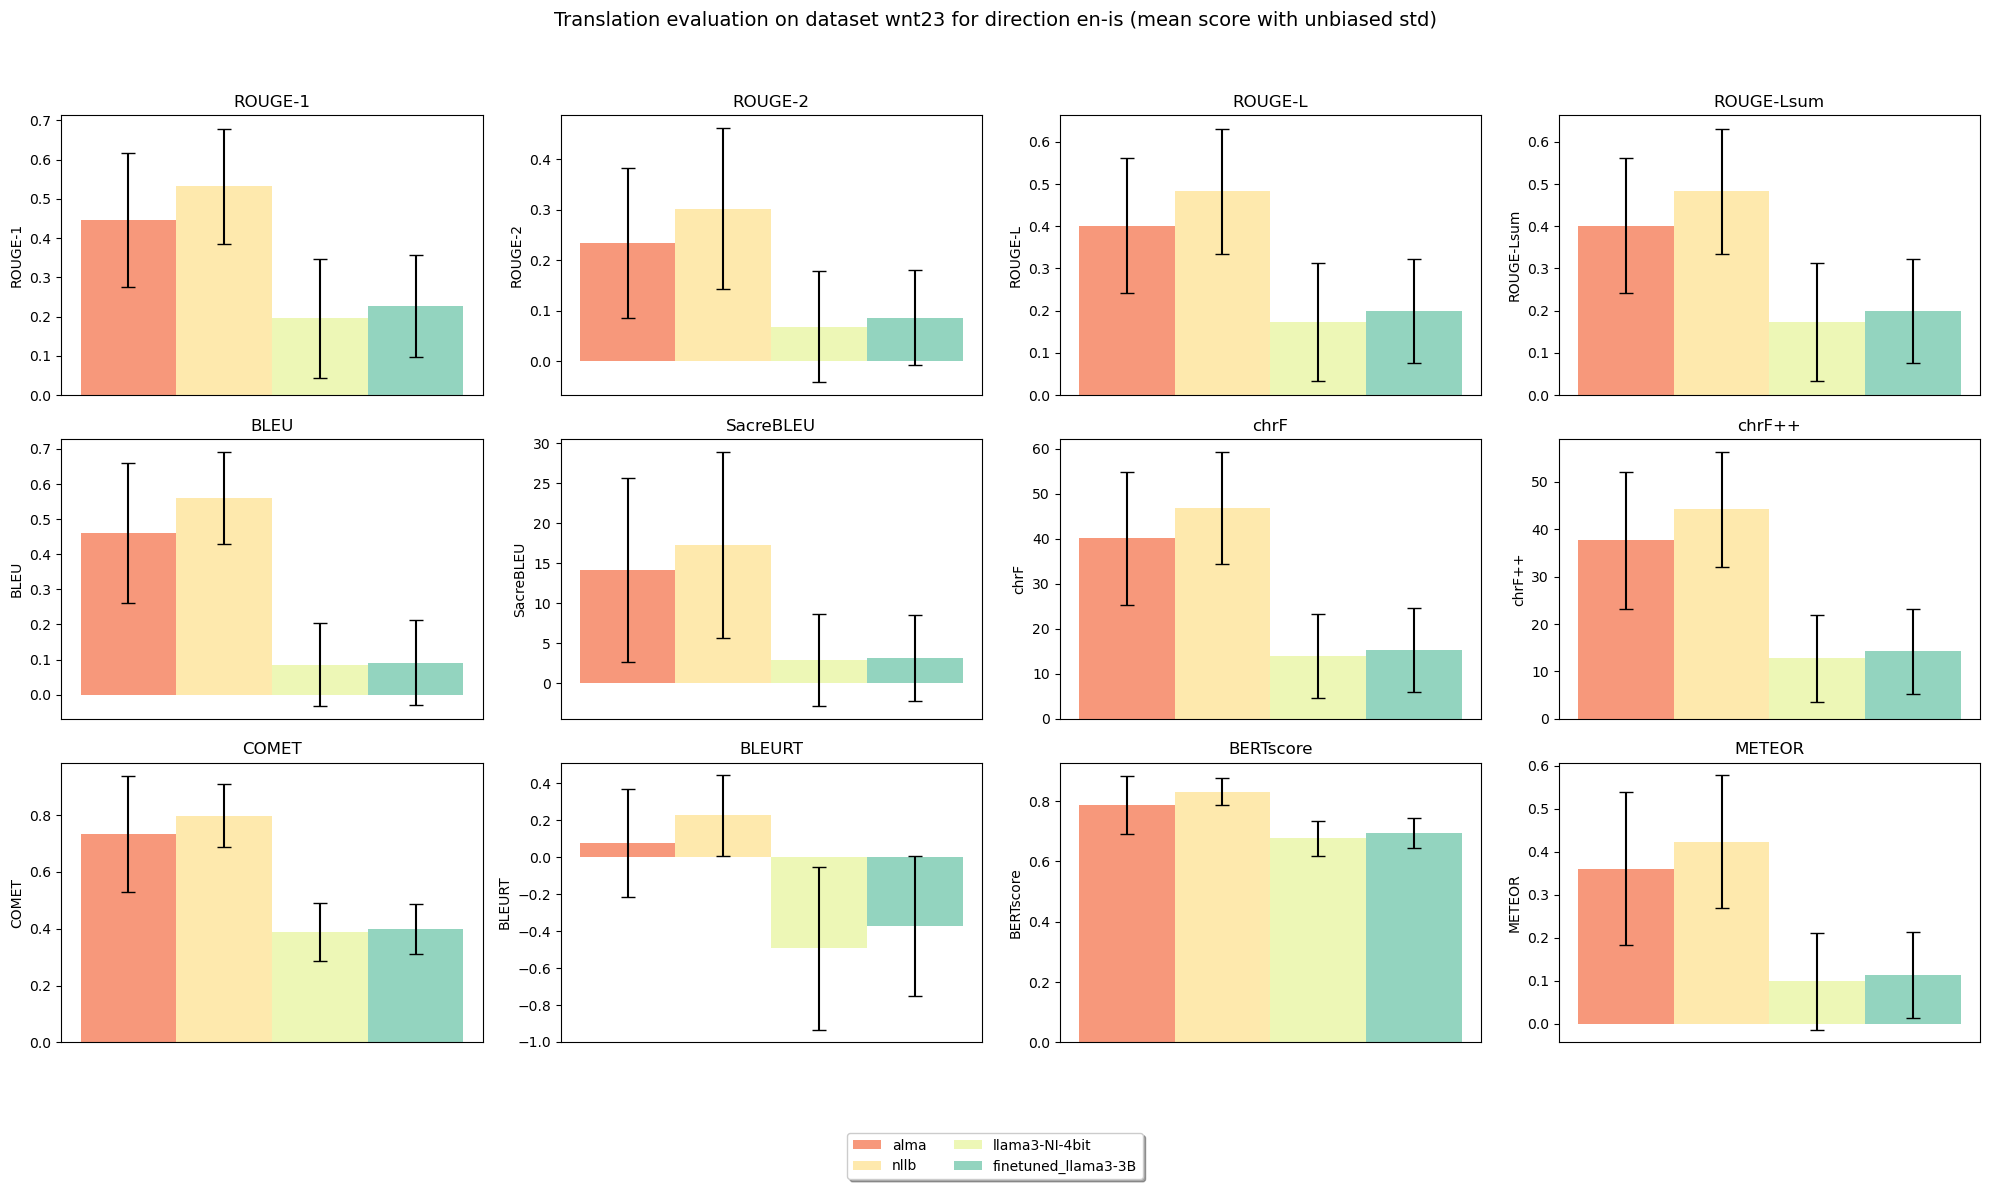

Extracting and concatenating metrics...


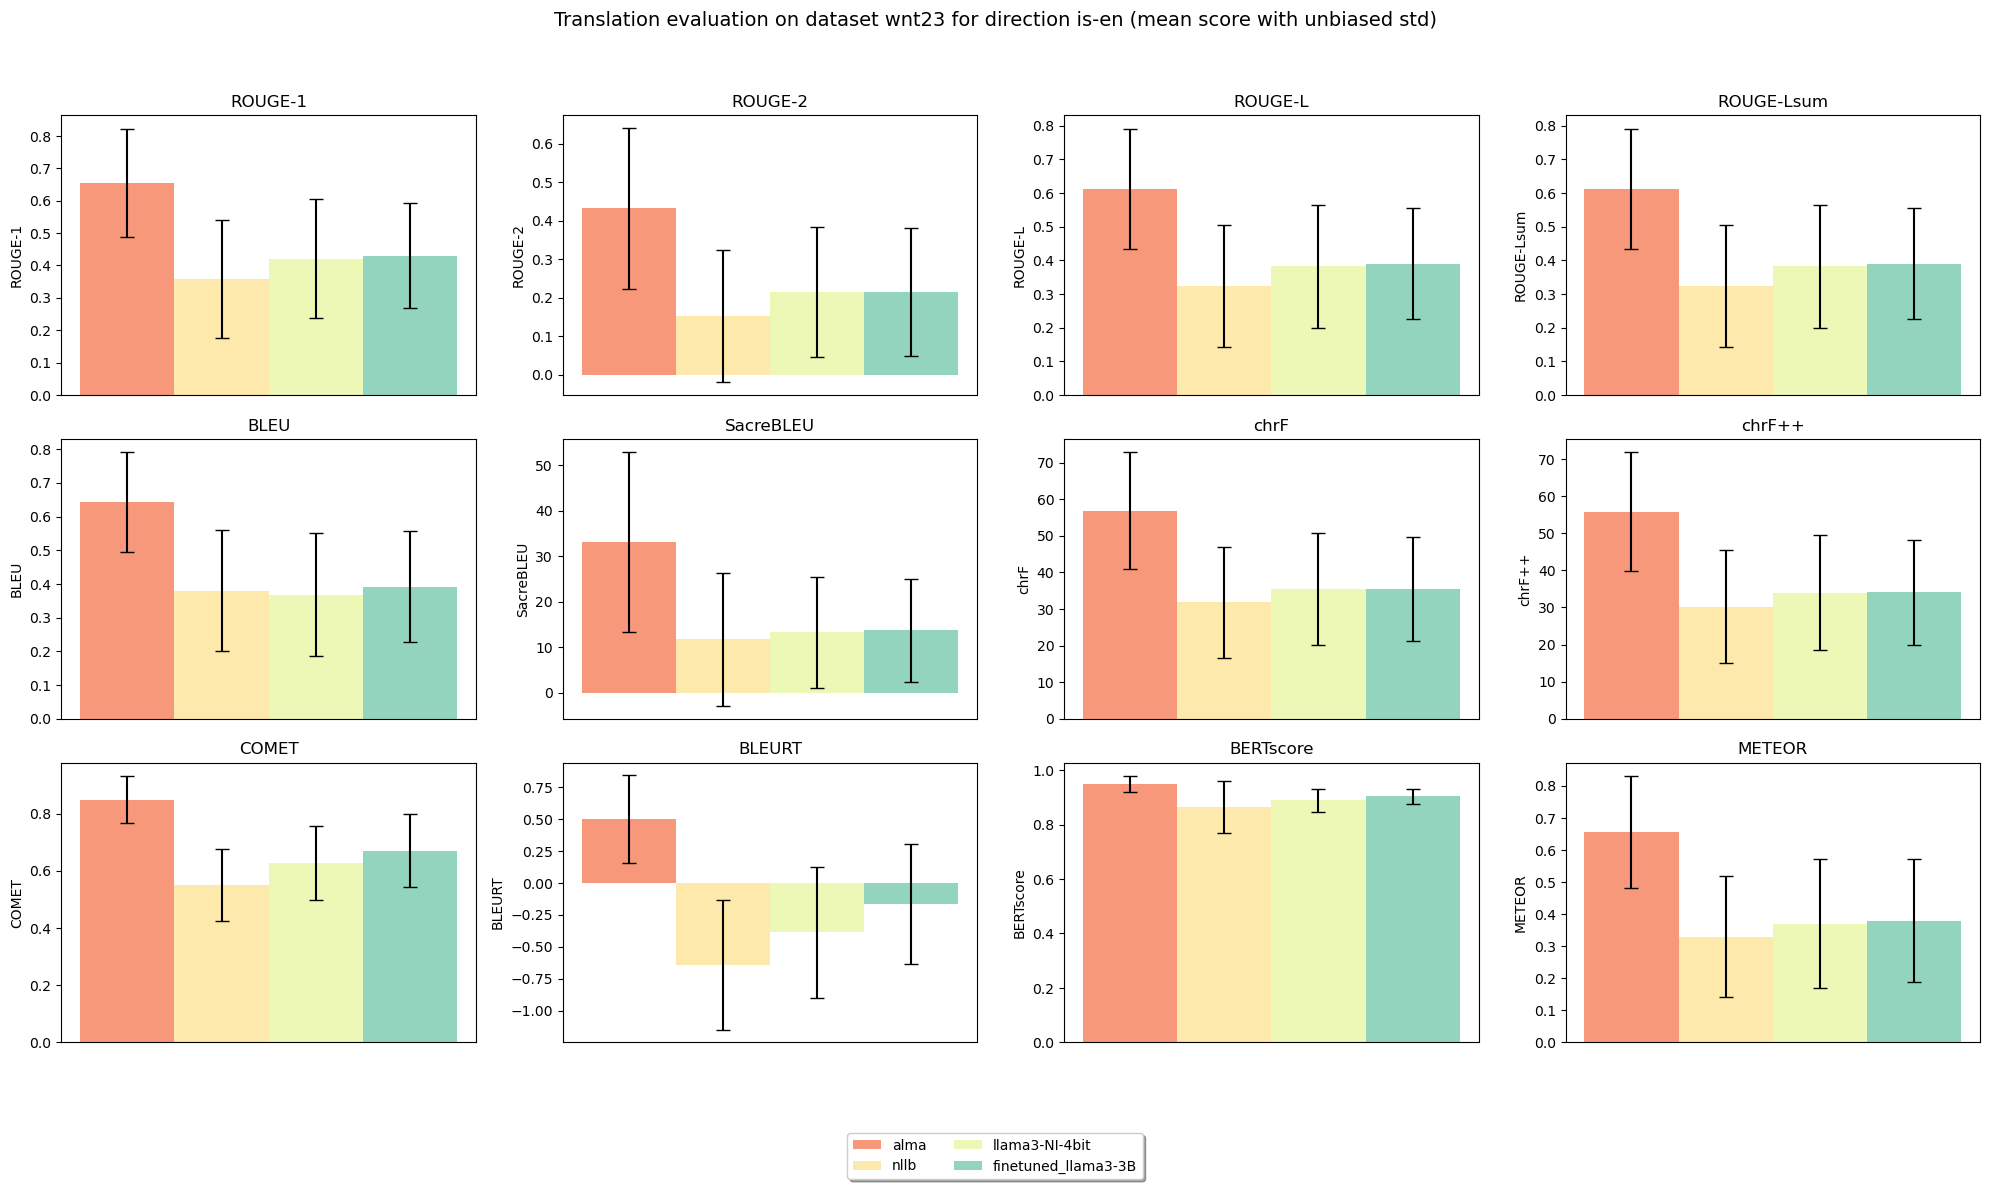

Extracting and concatenating metrics...


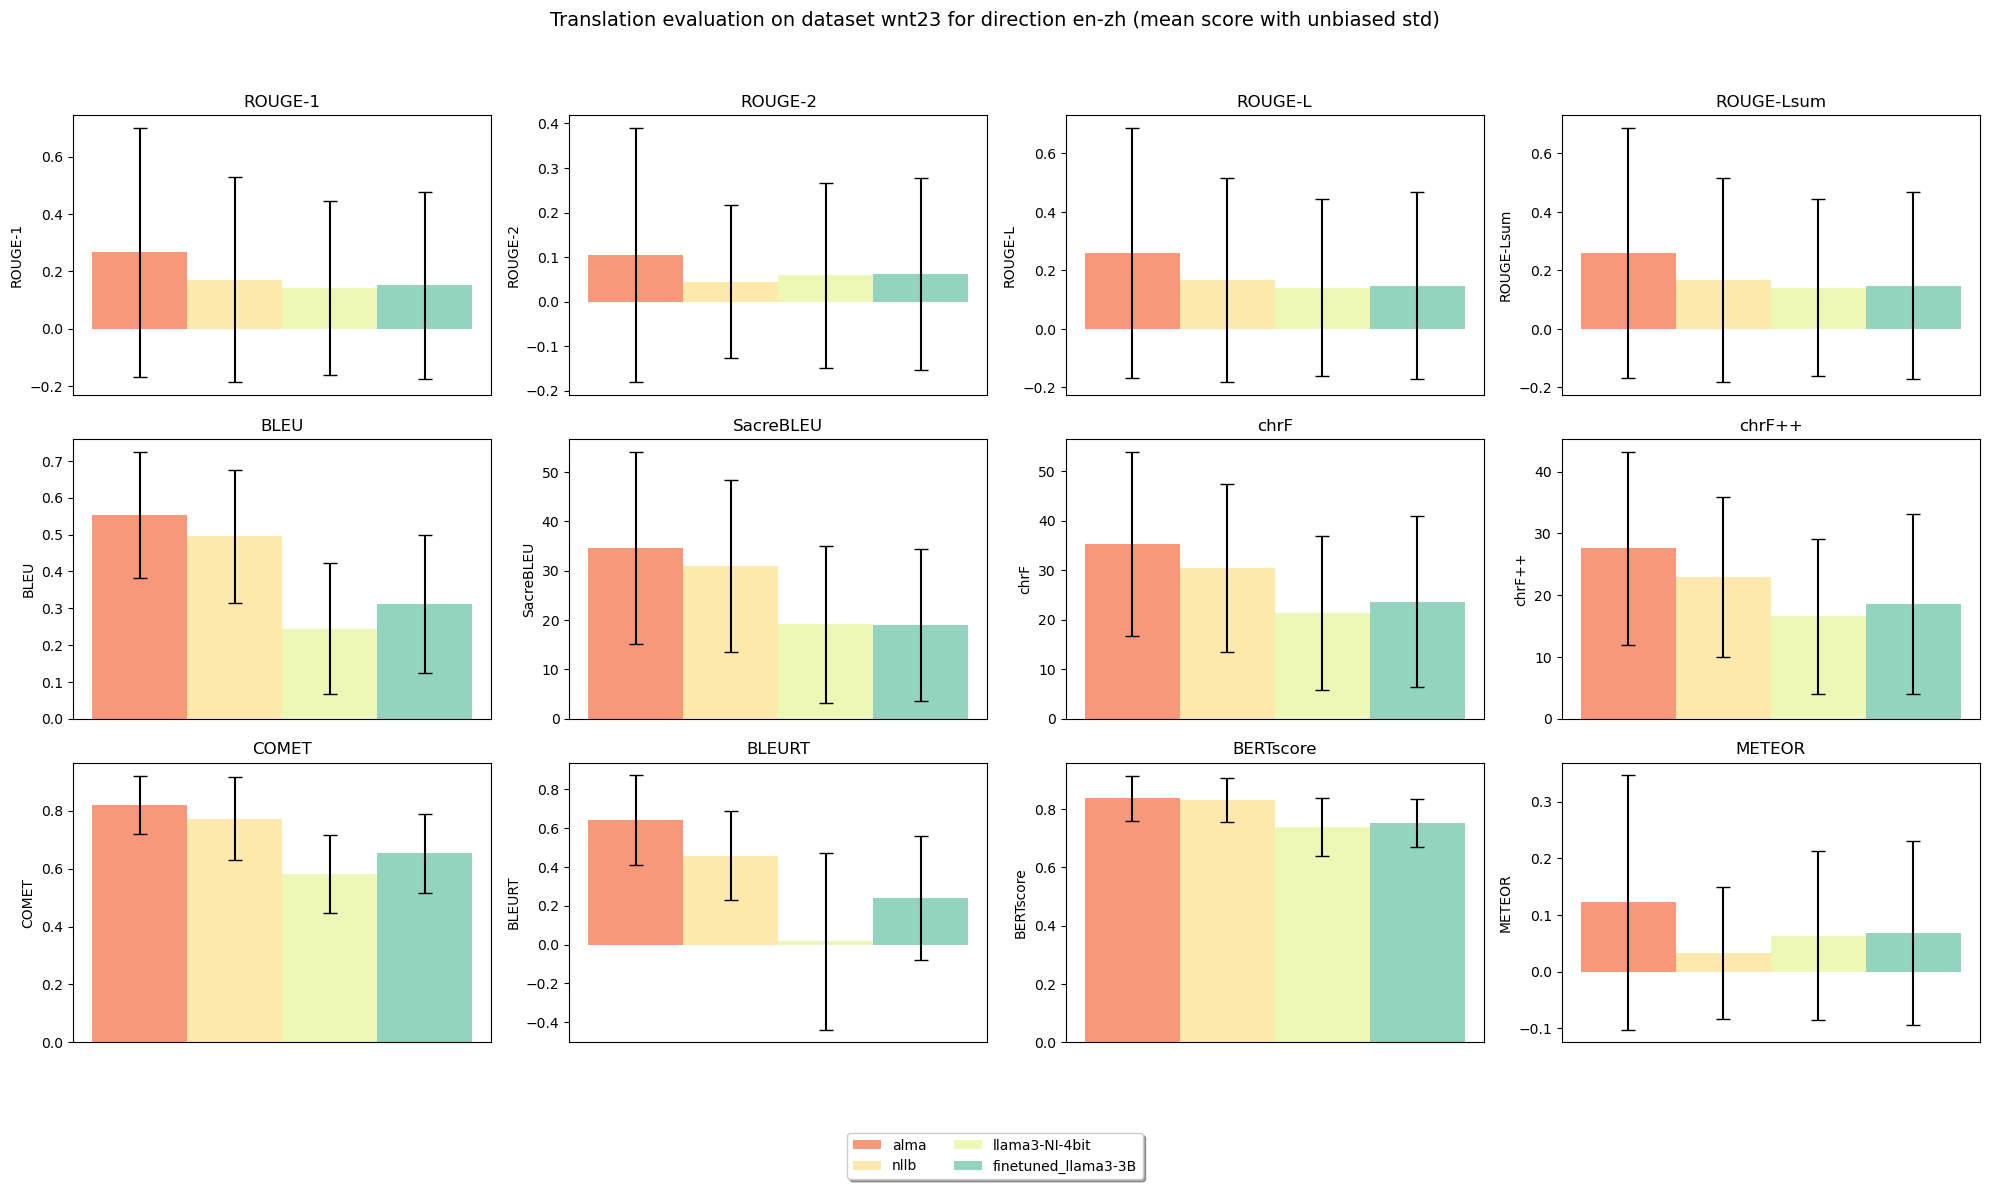

Extracting and concatenating metrics...


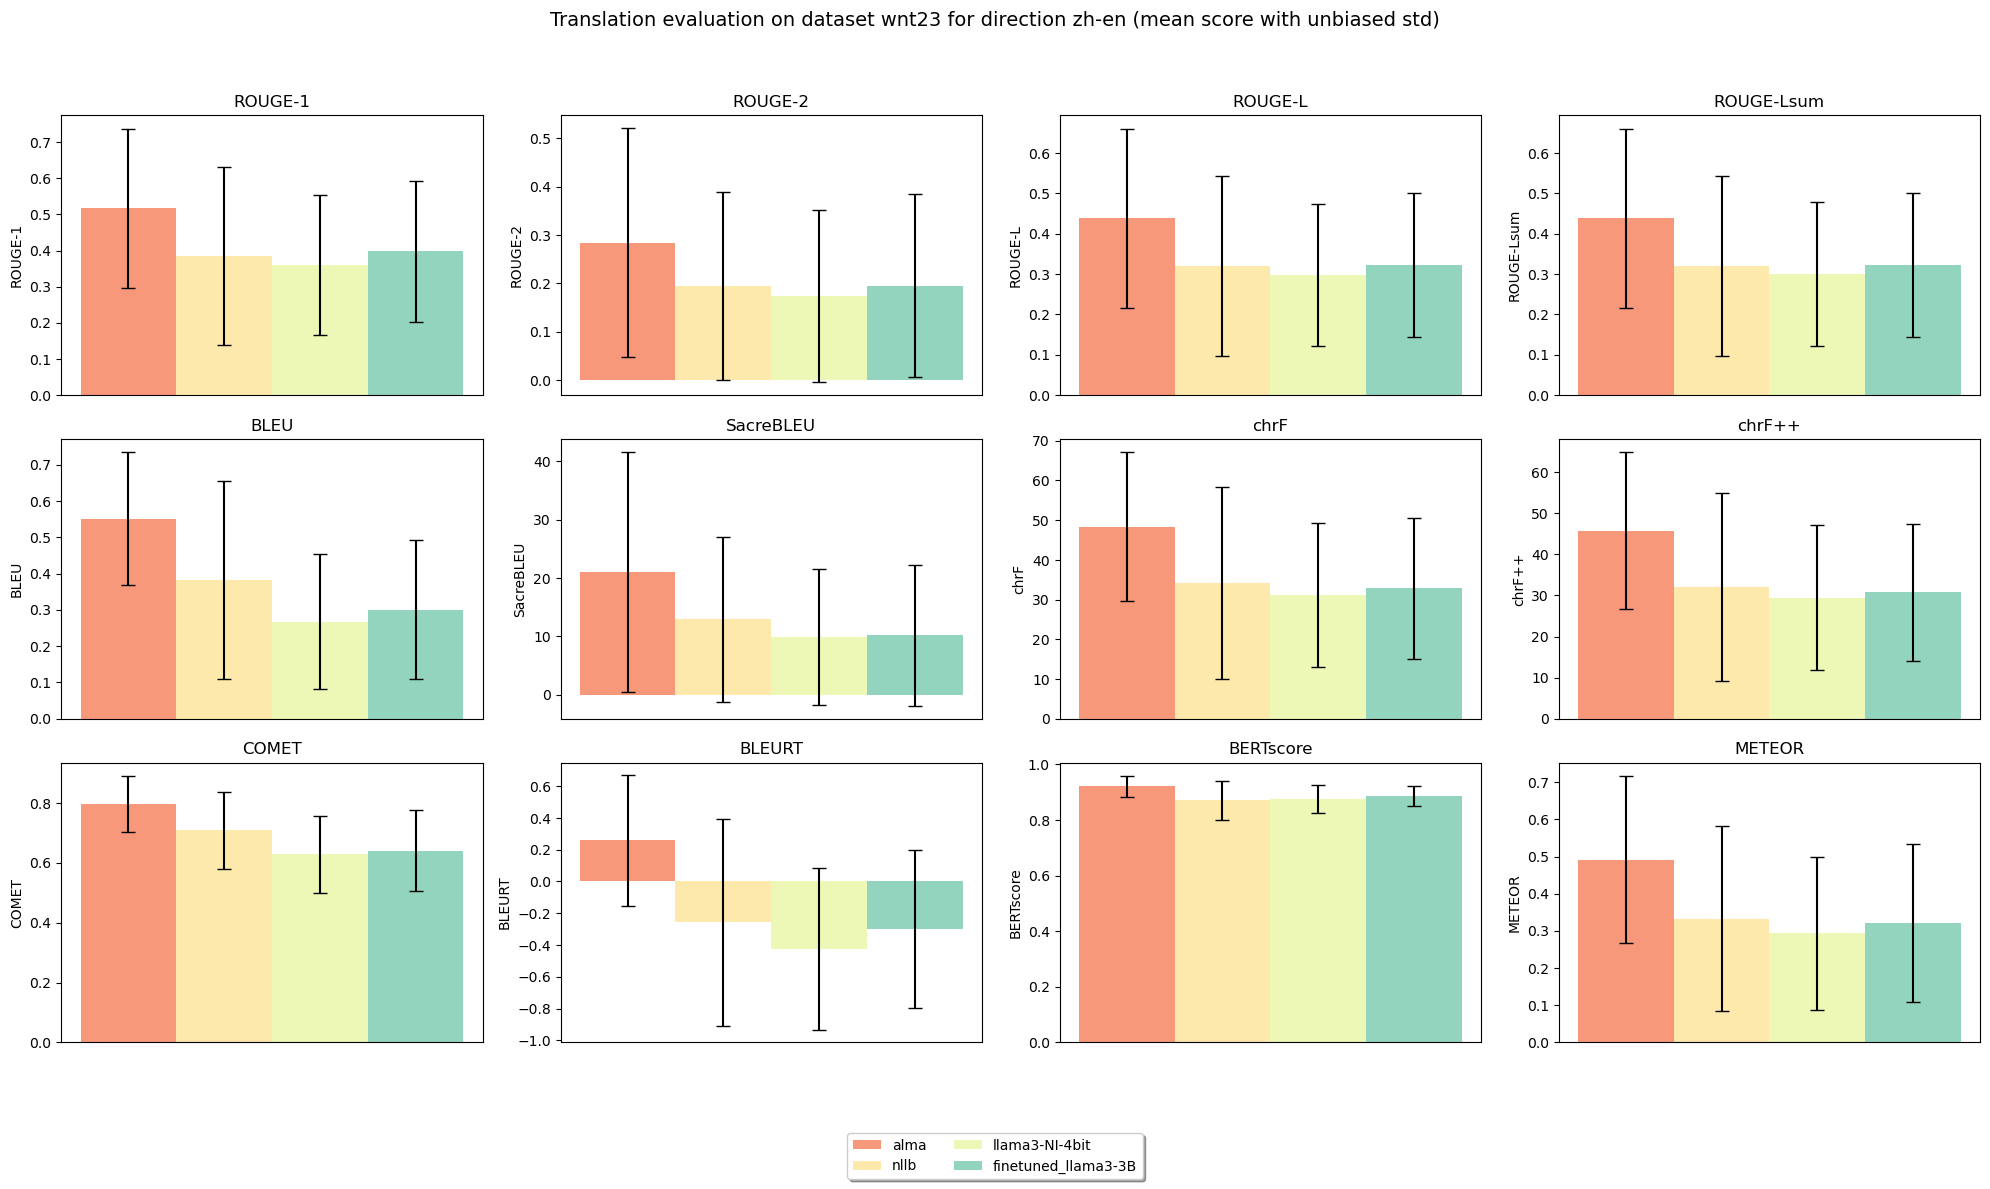

Extracting and concatenating metrics...


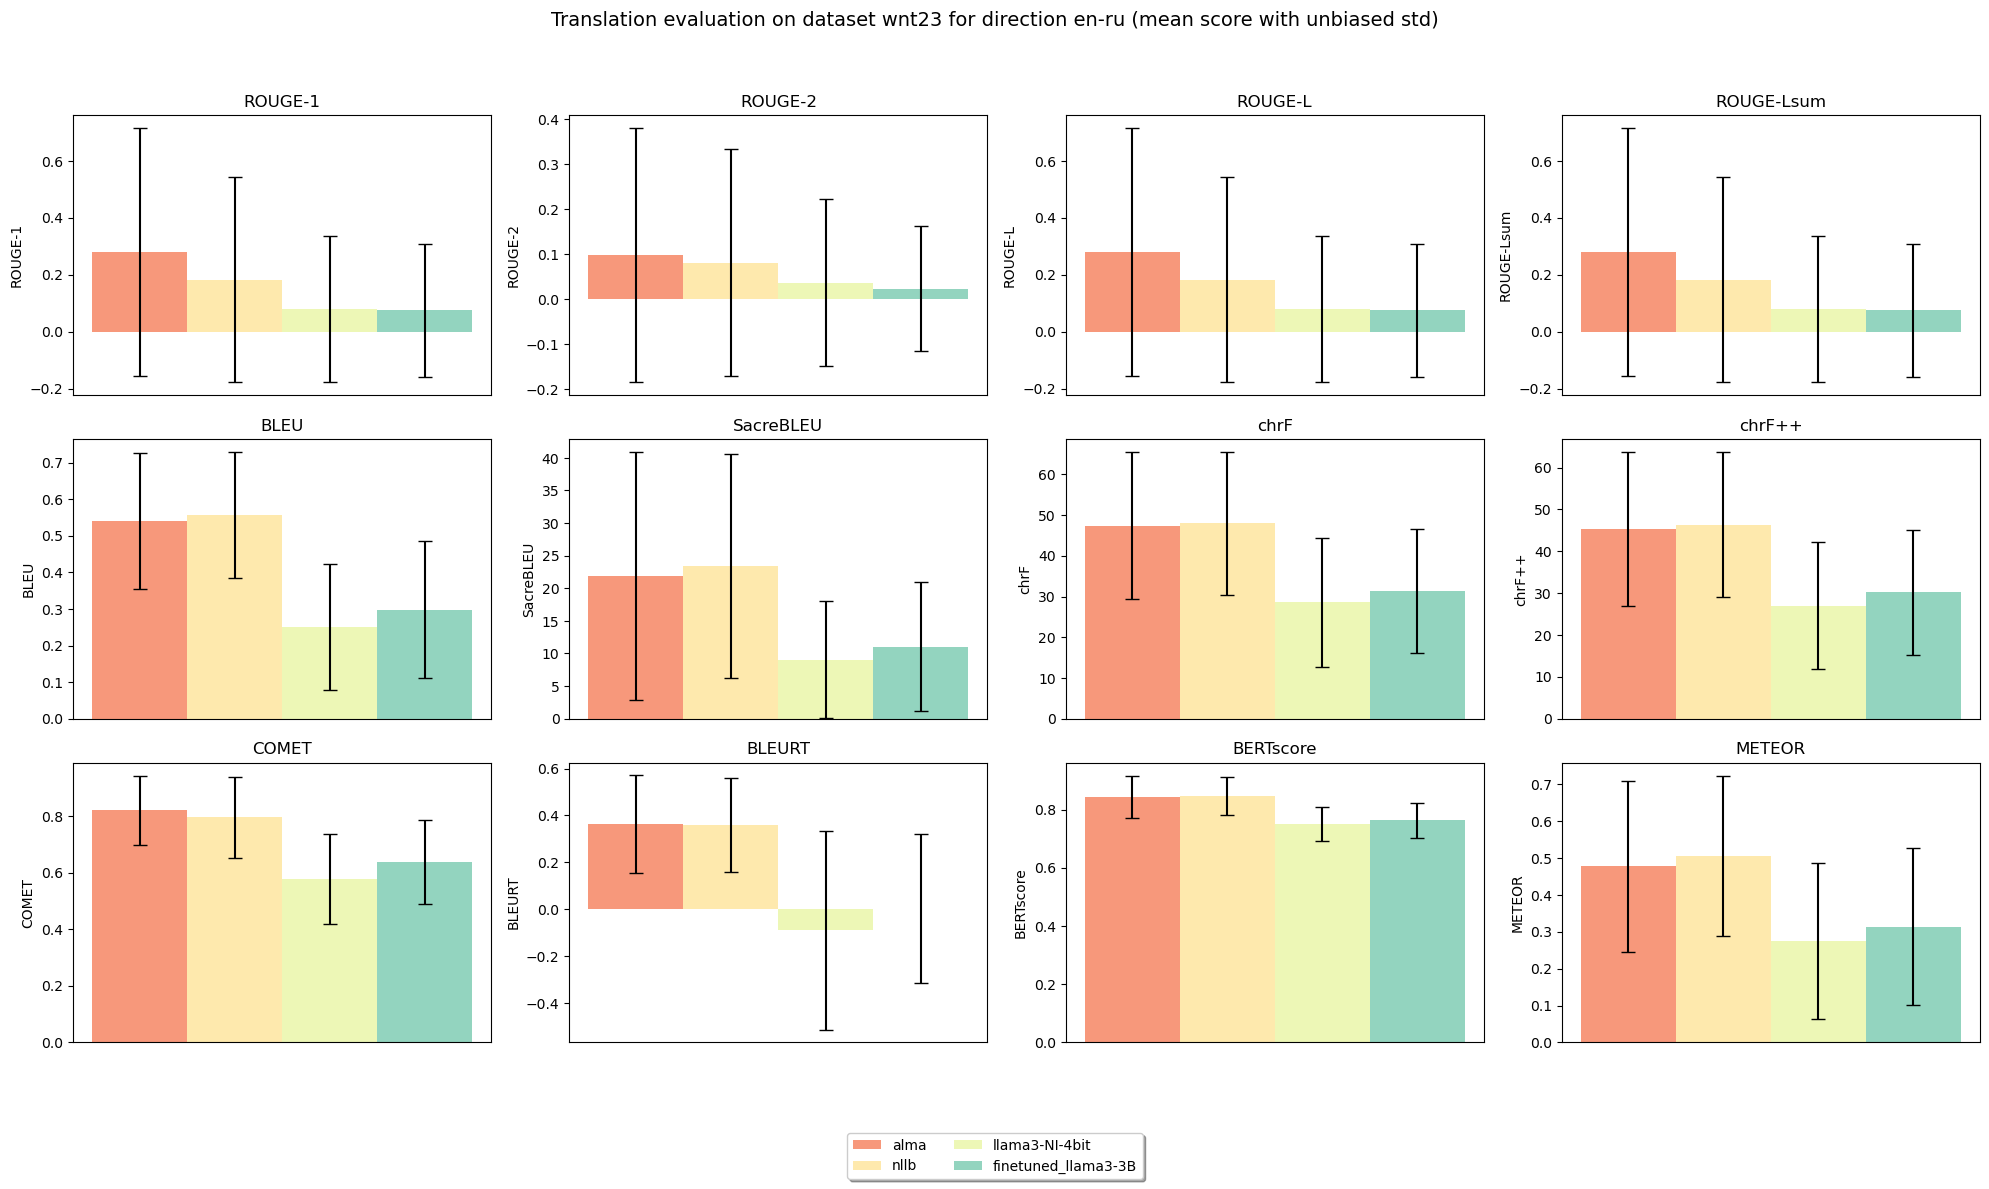

Extracting and concatenating metrics...


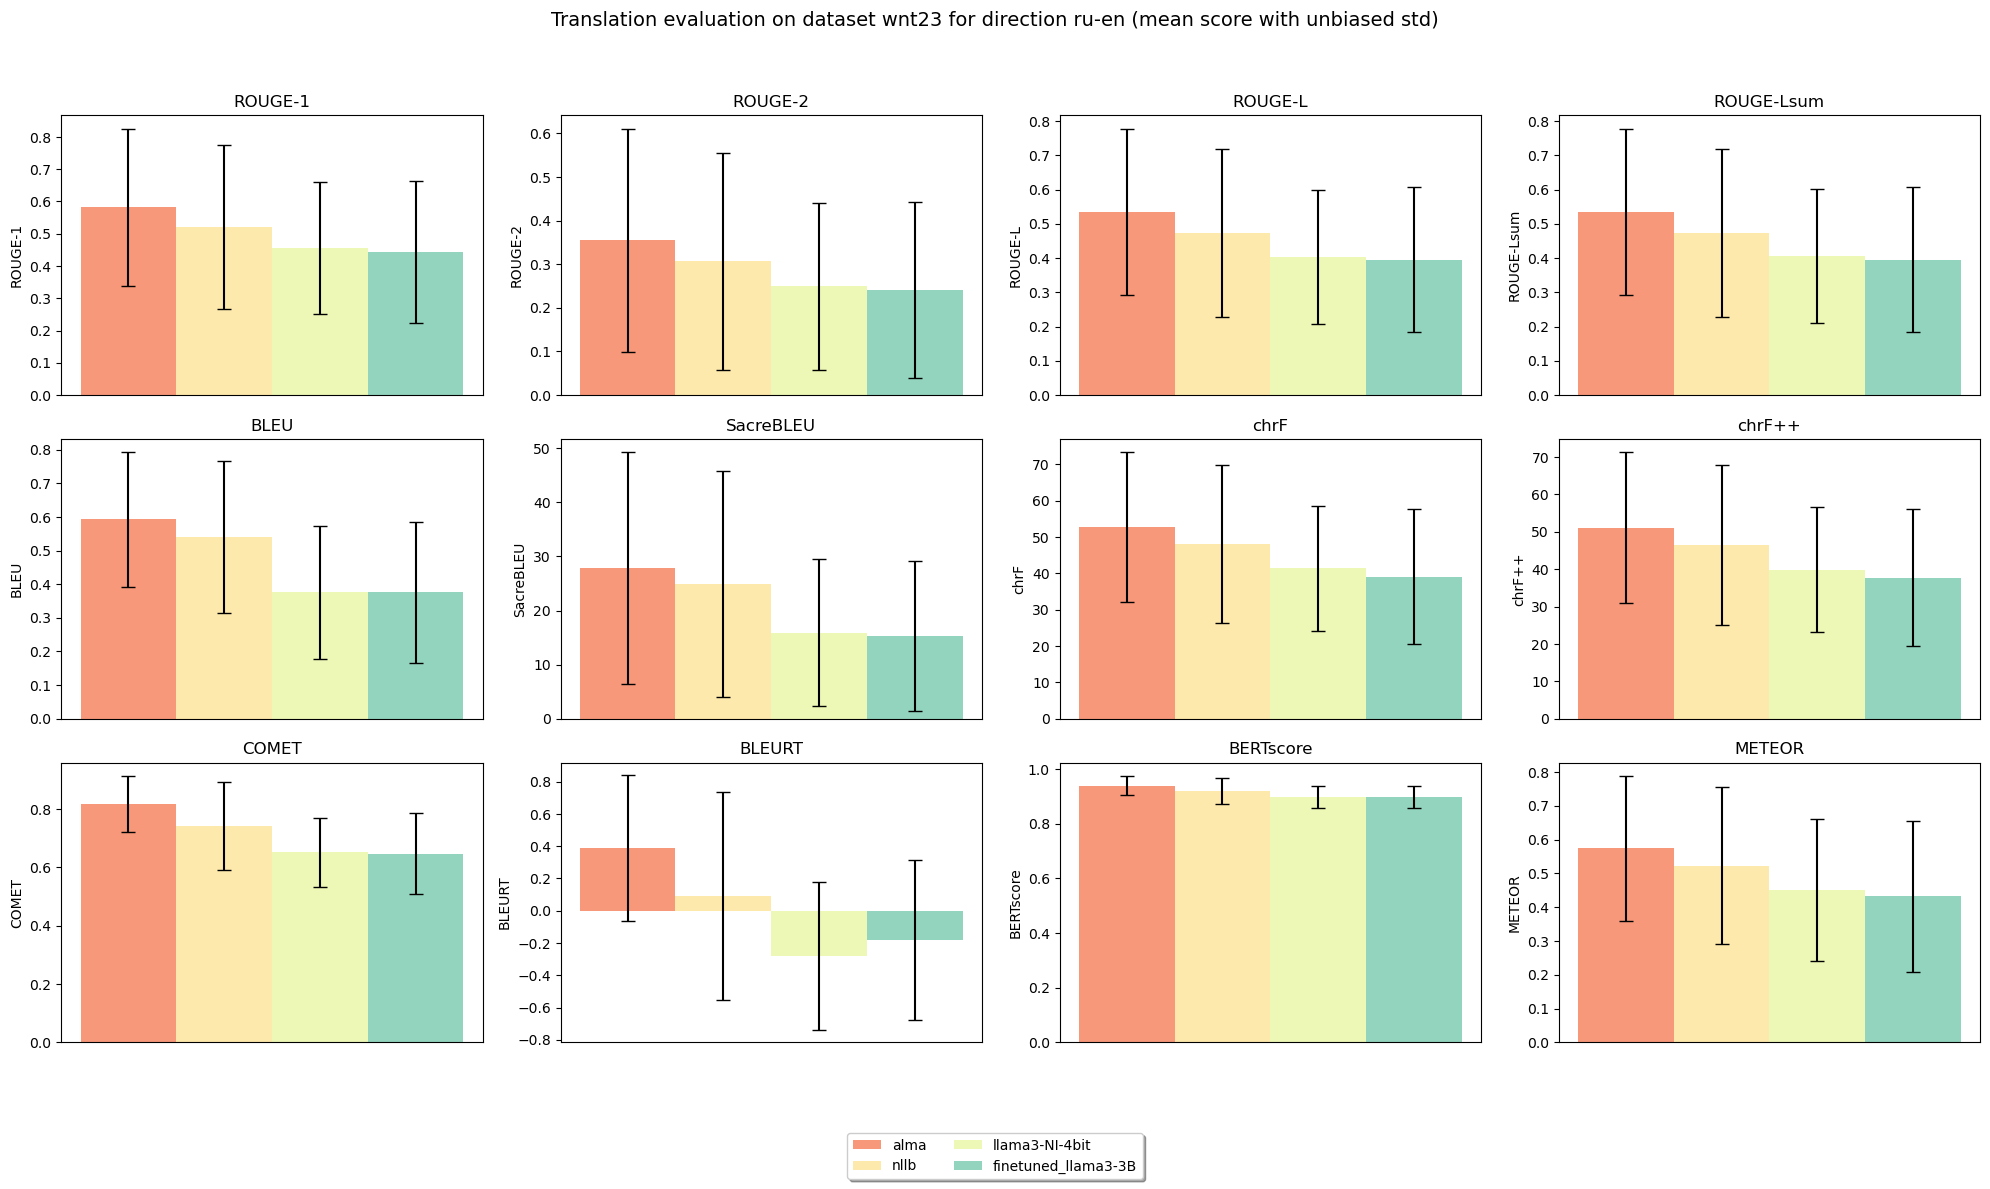

In [3]:
## Bar plot per direction
metric_names = ["ROUGE-1", "ROUGE-2", "ROUGE-L", "ROUGE-Lsum",
                "BLEU", "SacreBLEU", "chrF", "chrF++",
                "COMET", "BLEURT", "BERTscore", "METEOR"]

dataset_name = "wnt23"
reduce_size = 100

directions = ["en-de", "de-en",
              "en-cs", "cs-en",
              "en-is", "is-en",
              "en-zh", "zh-en",
              "en-ru", "ru-en"]

model_names = ["alma",
               "nllb",
               "llama3-NI-4bit",
               "finetuned_llama3-3B"]
model_sizes = [None,
               None,
               None,
               None]

make_bar_plot_all_metrics(directions, model_names, model_sizes, dataset_name, reduce_size, metric_names,
                        savepath = "./results/evaluations_figures/finetune_eval/barplot/wnt_all_metrics")

Extracting and concatenating metrics...


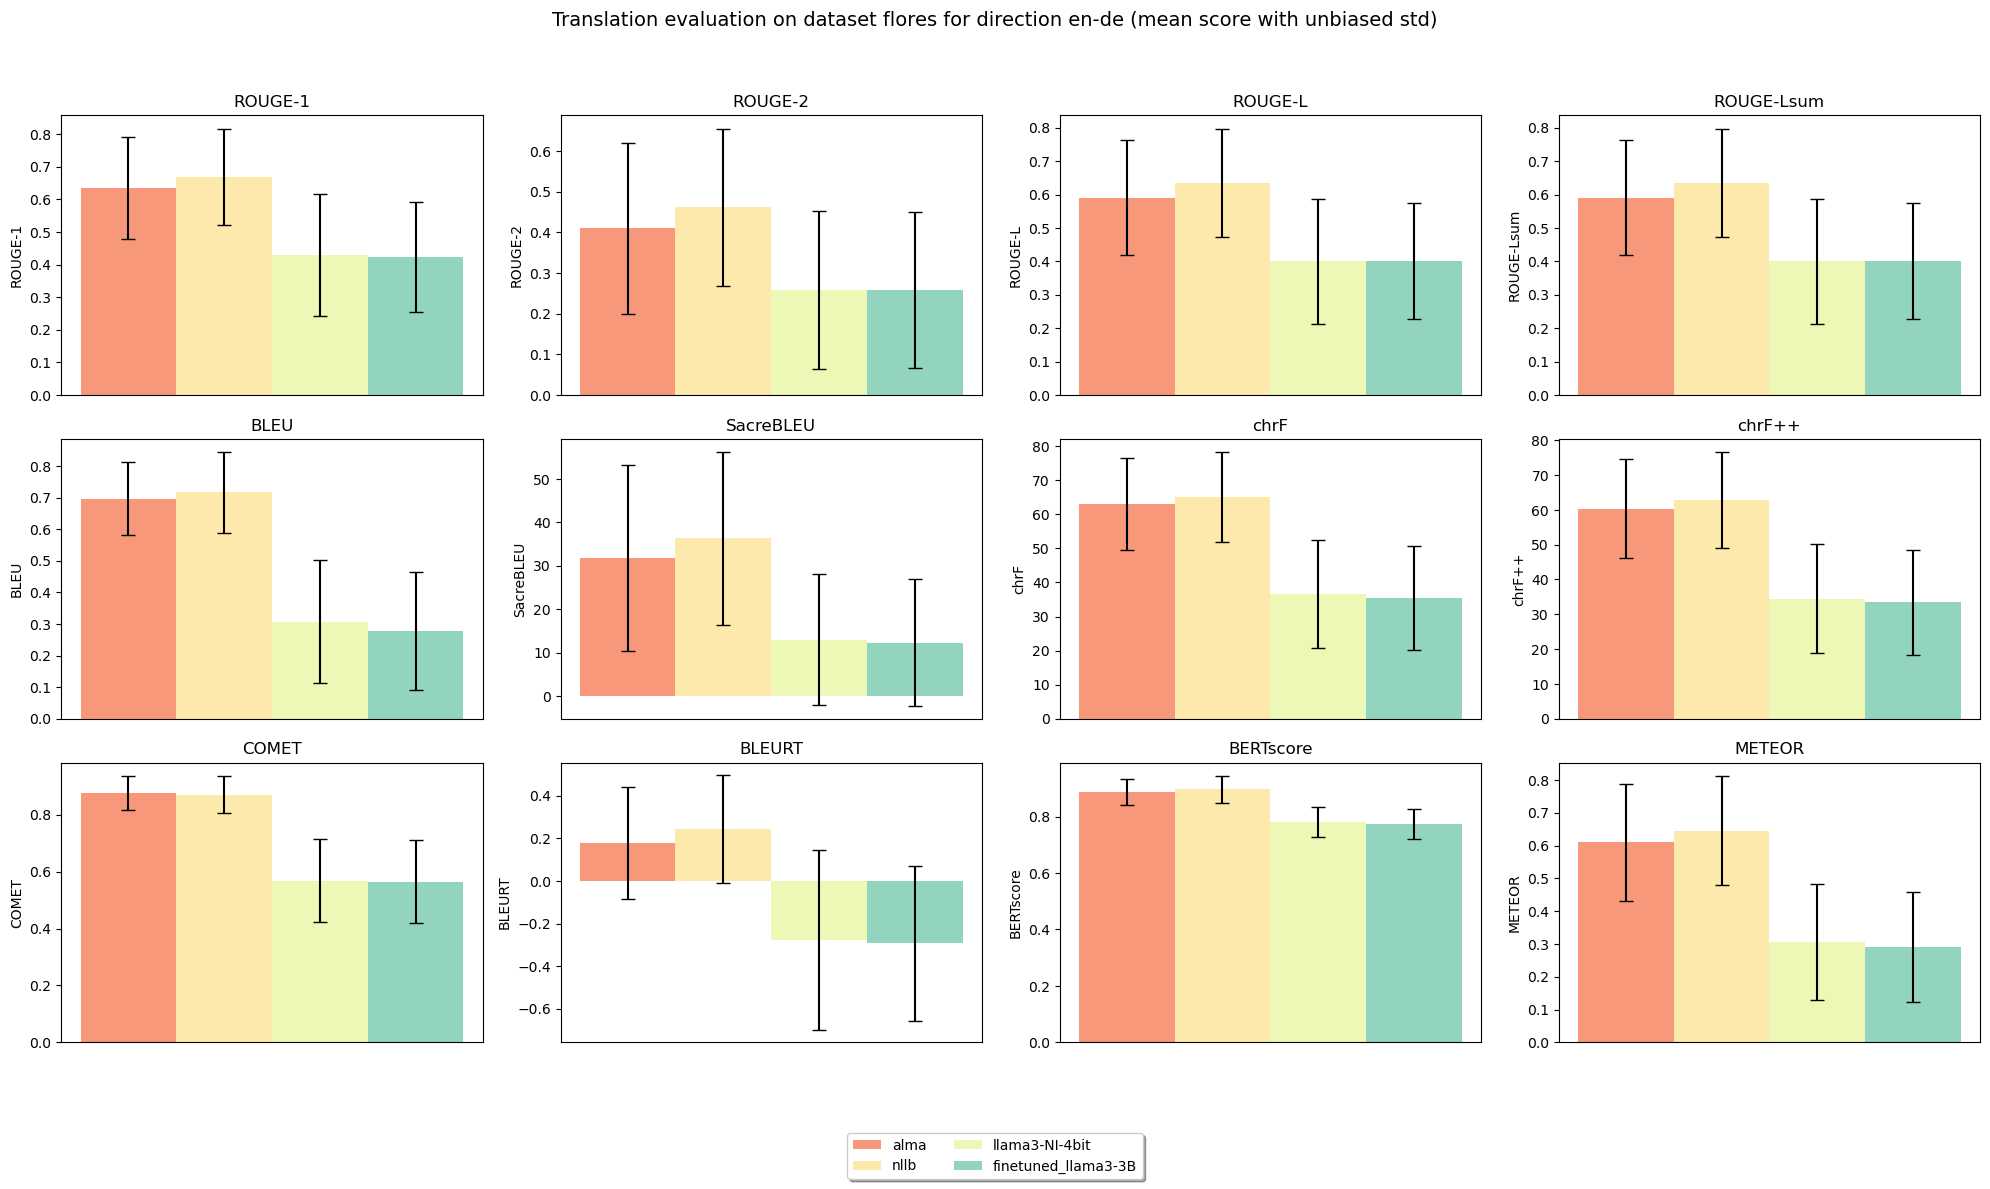

Extracting and concatenating metrics...


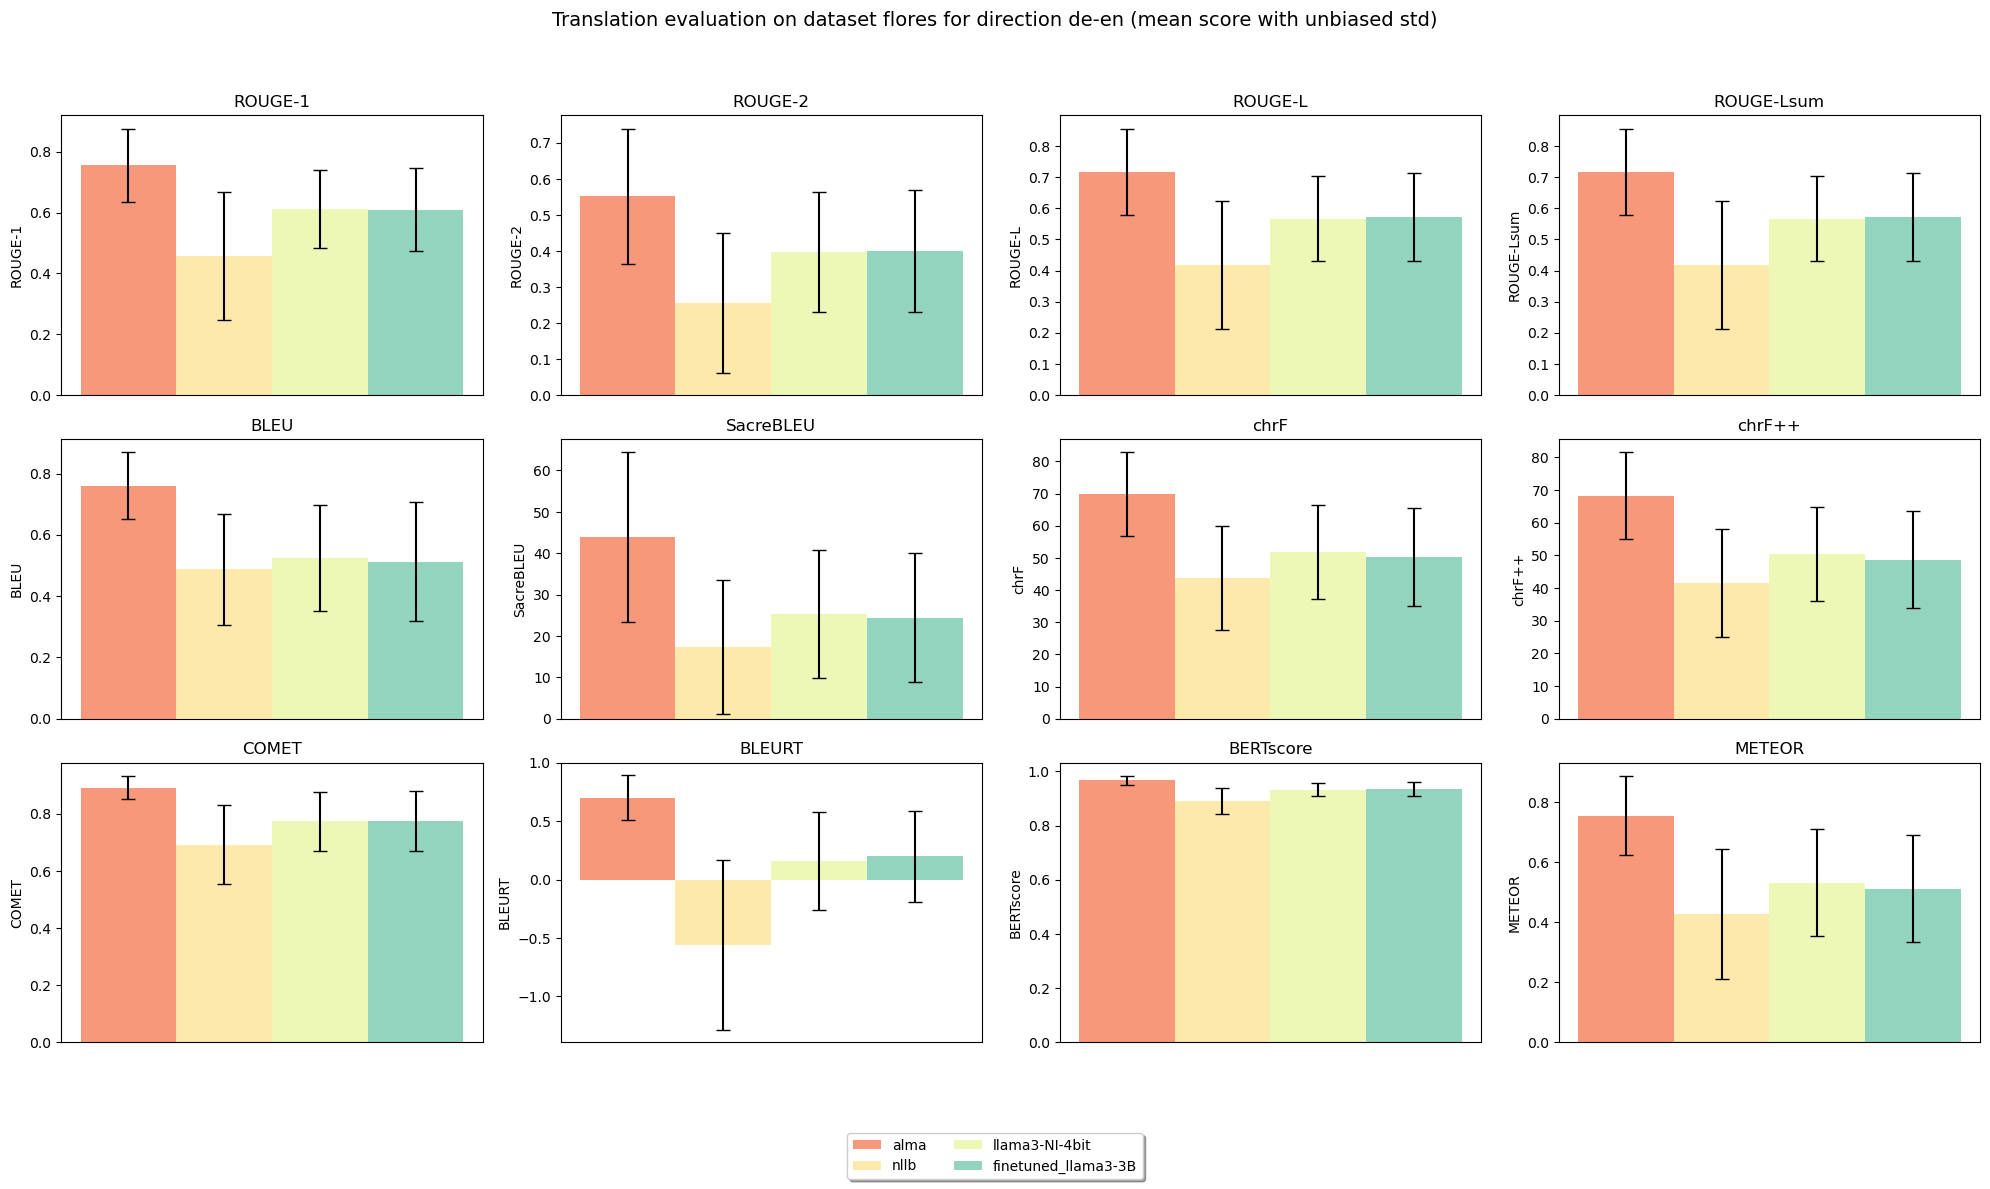

Extracting and concatenating metrics...


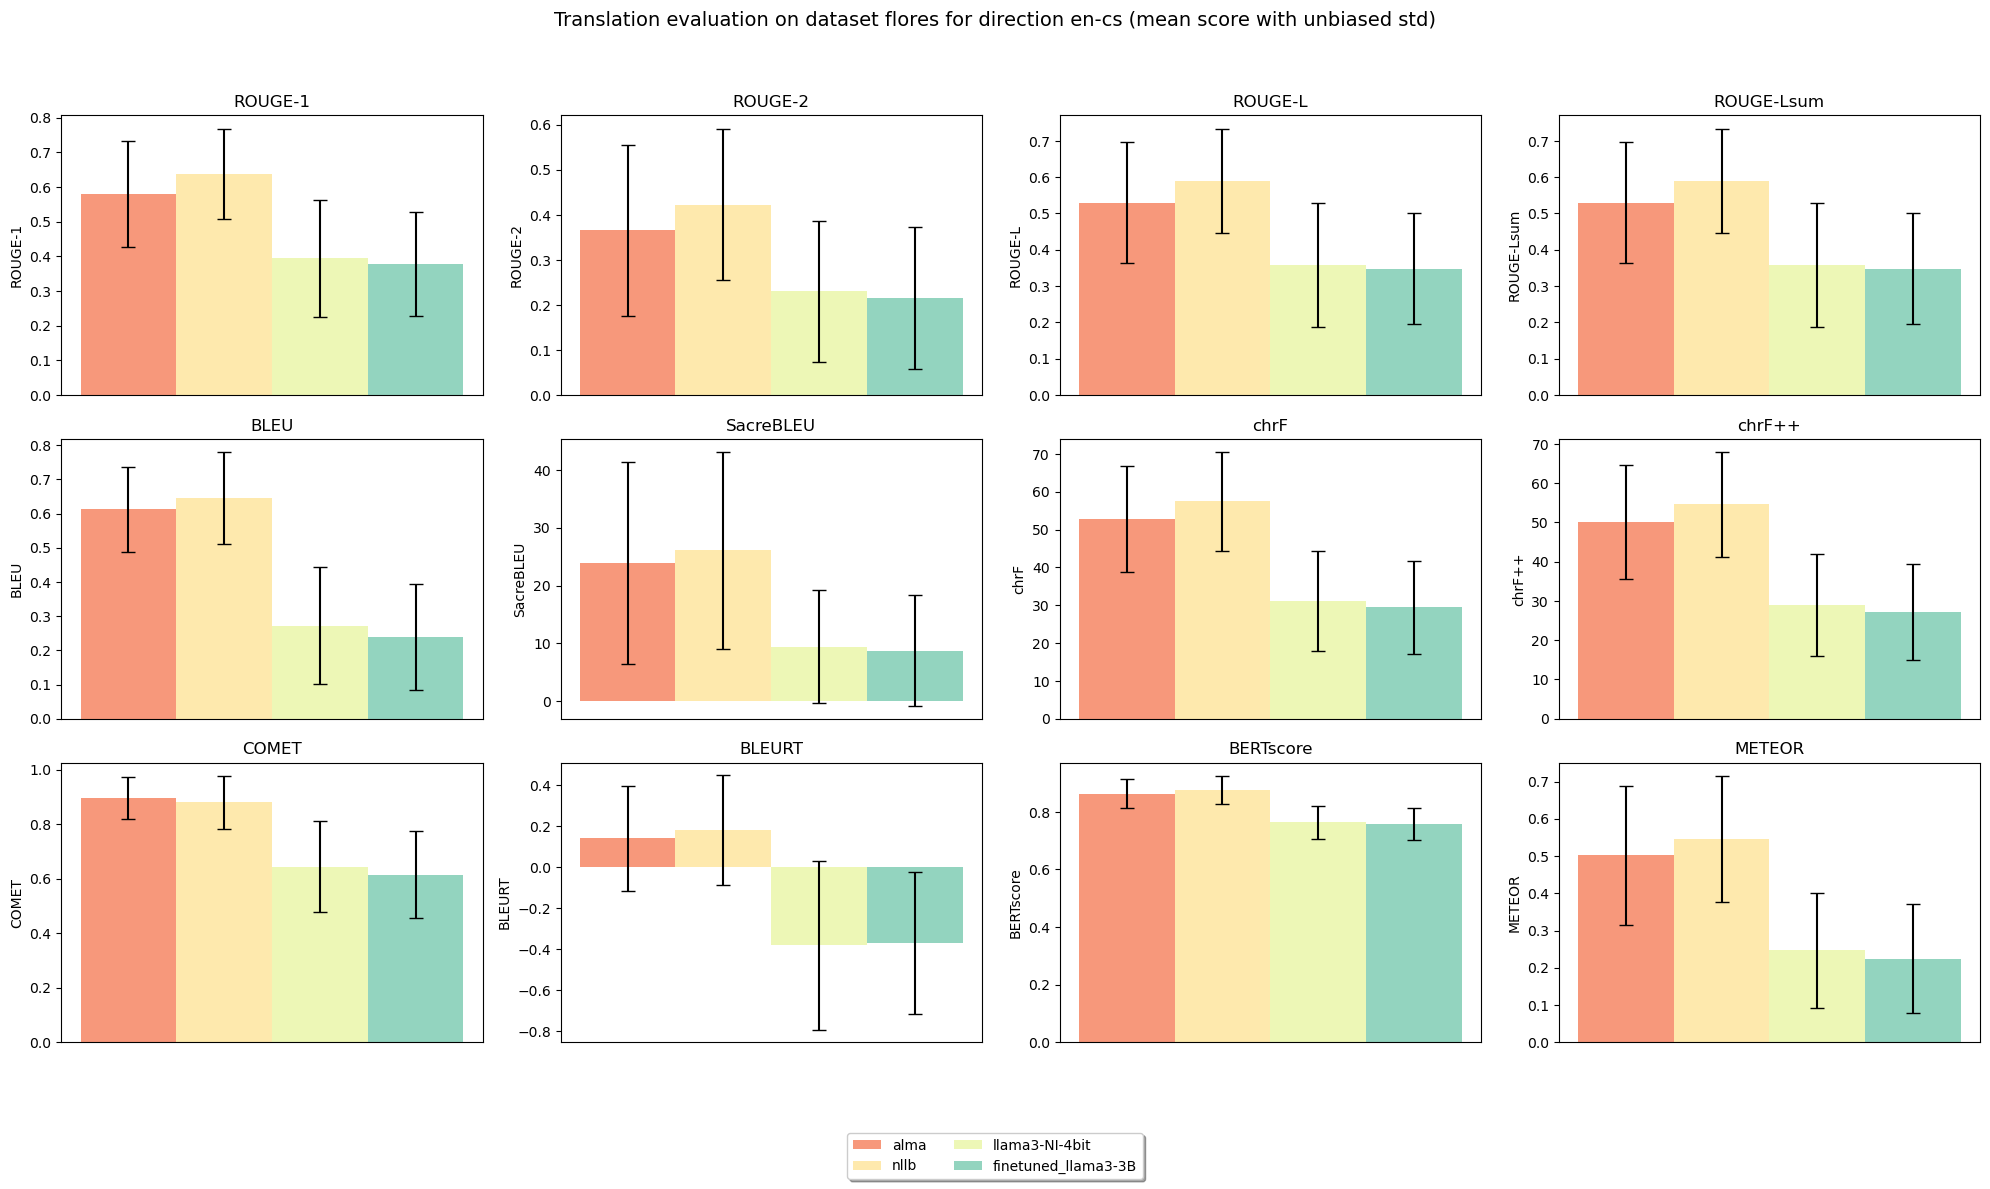

Extracting and concatenating metrics...


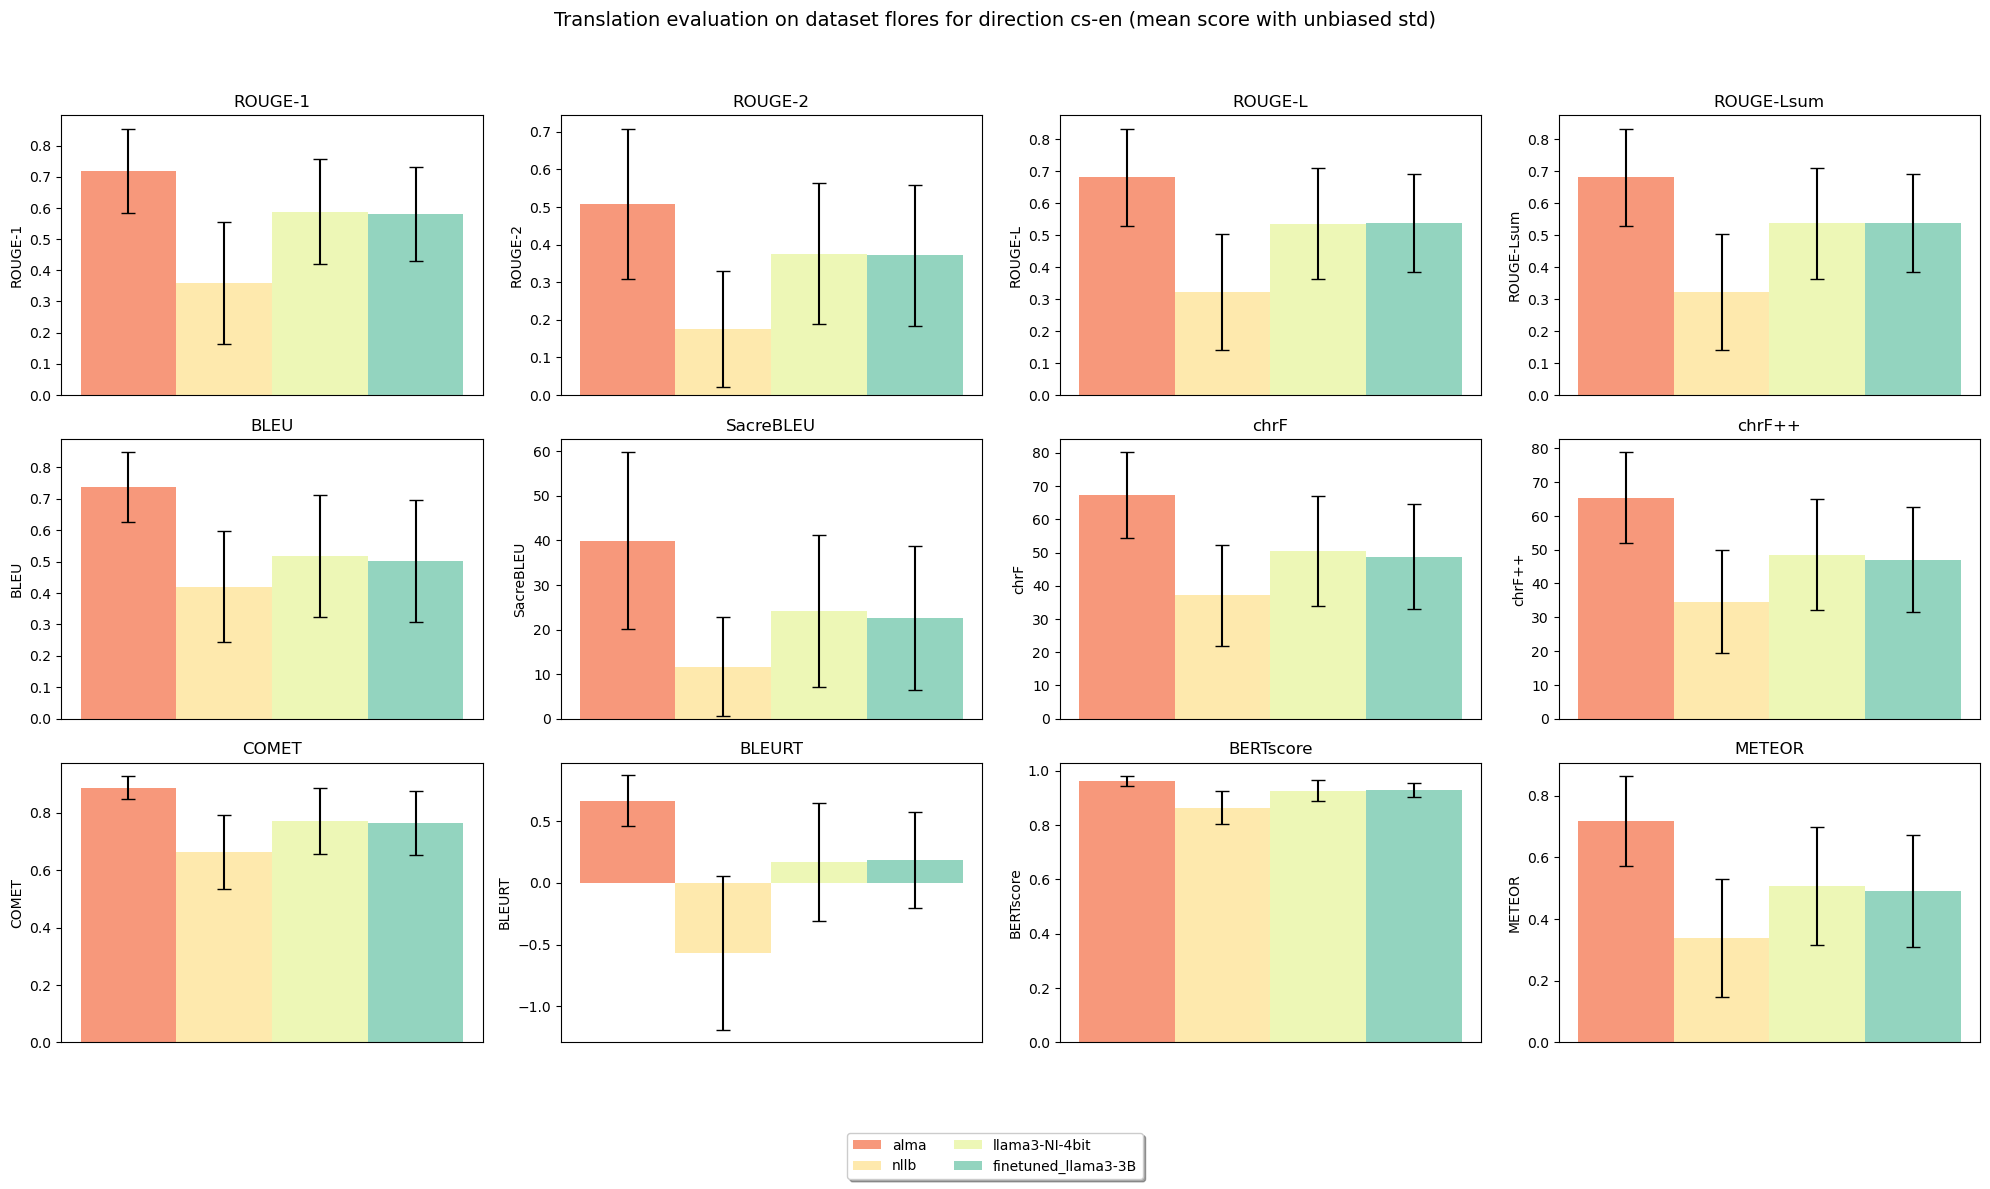

Extracting and concatenating metrics...


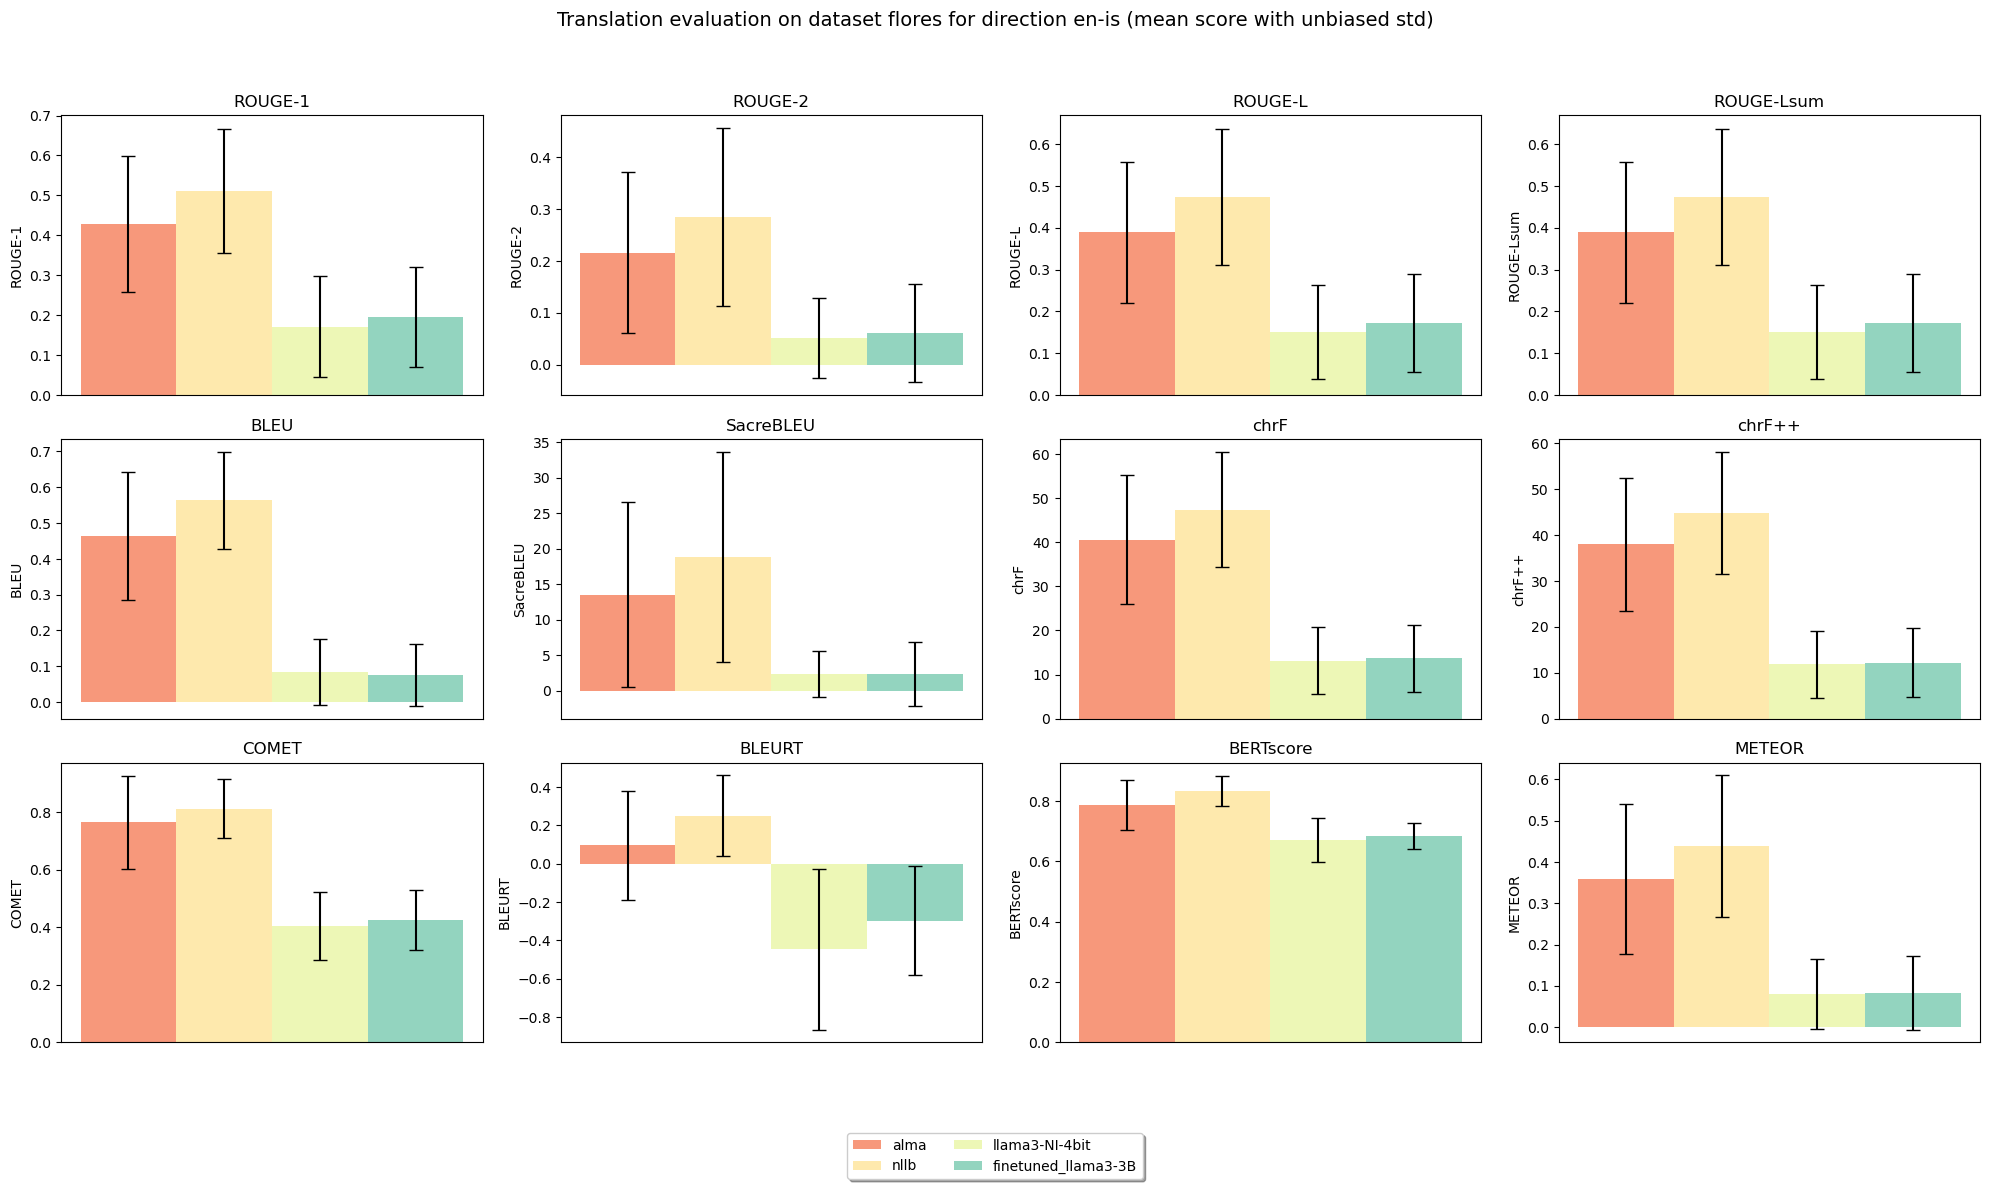

Extracting and concatenating metrics...


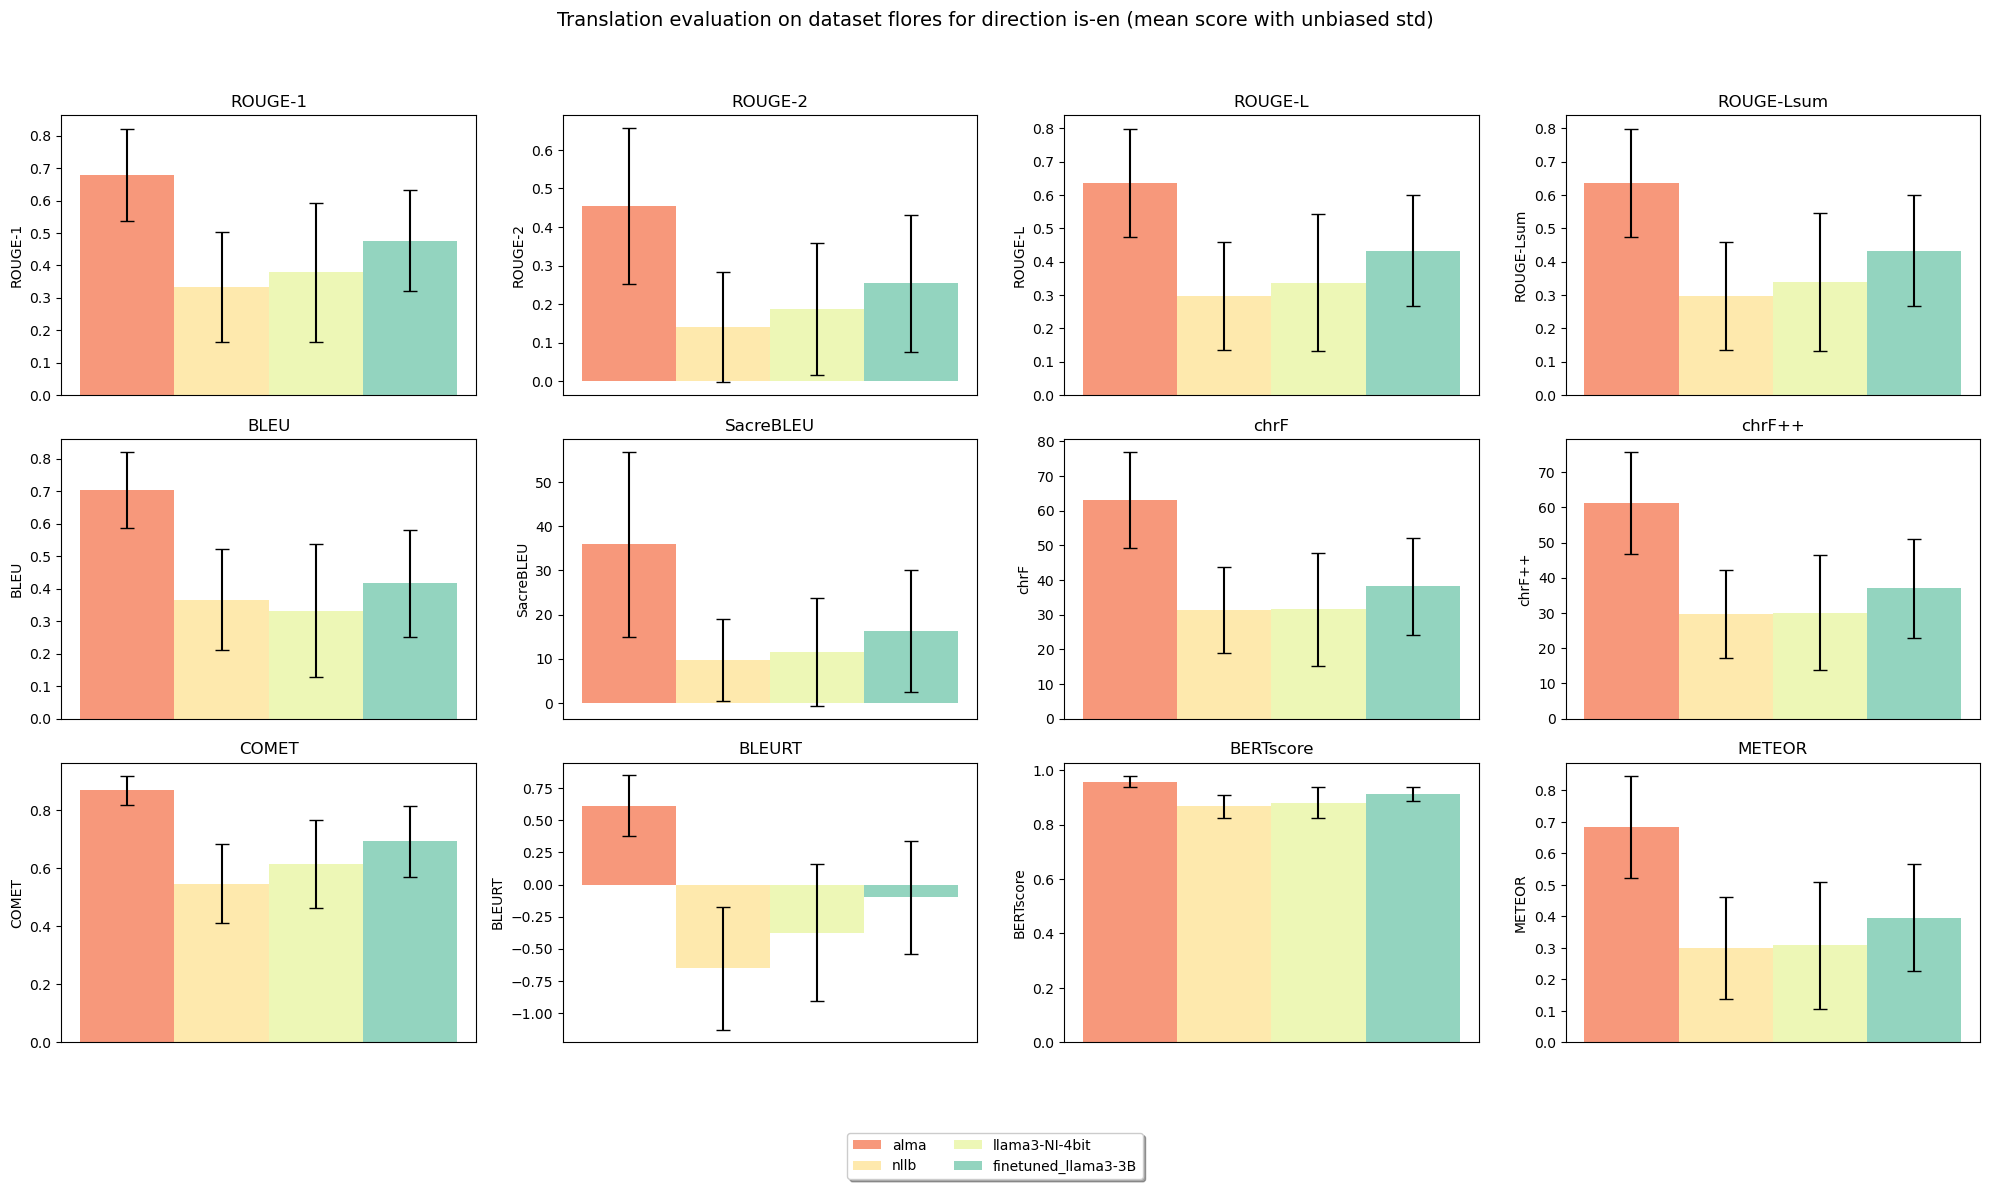

Extracting and concatenating metrics...


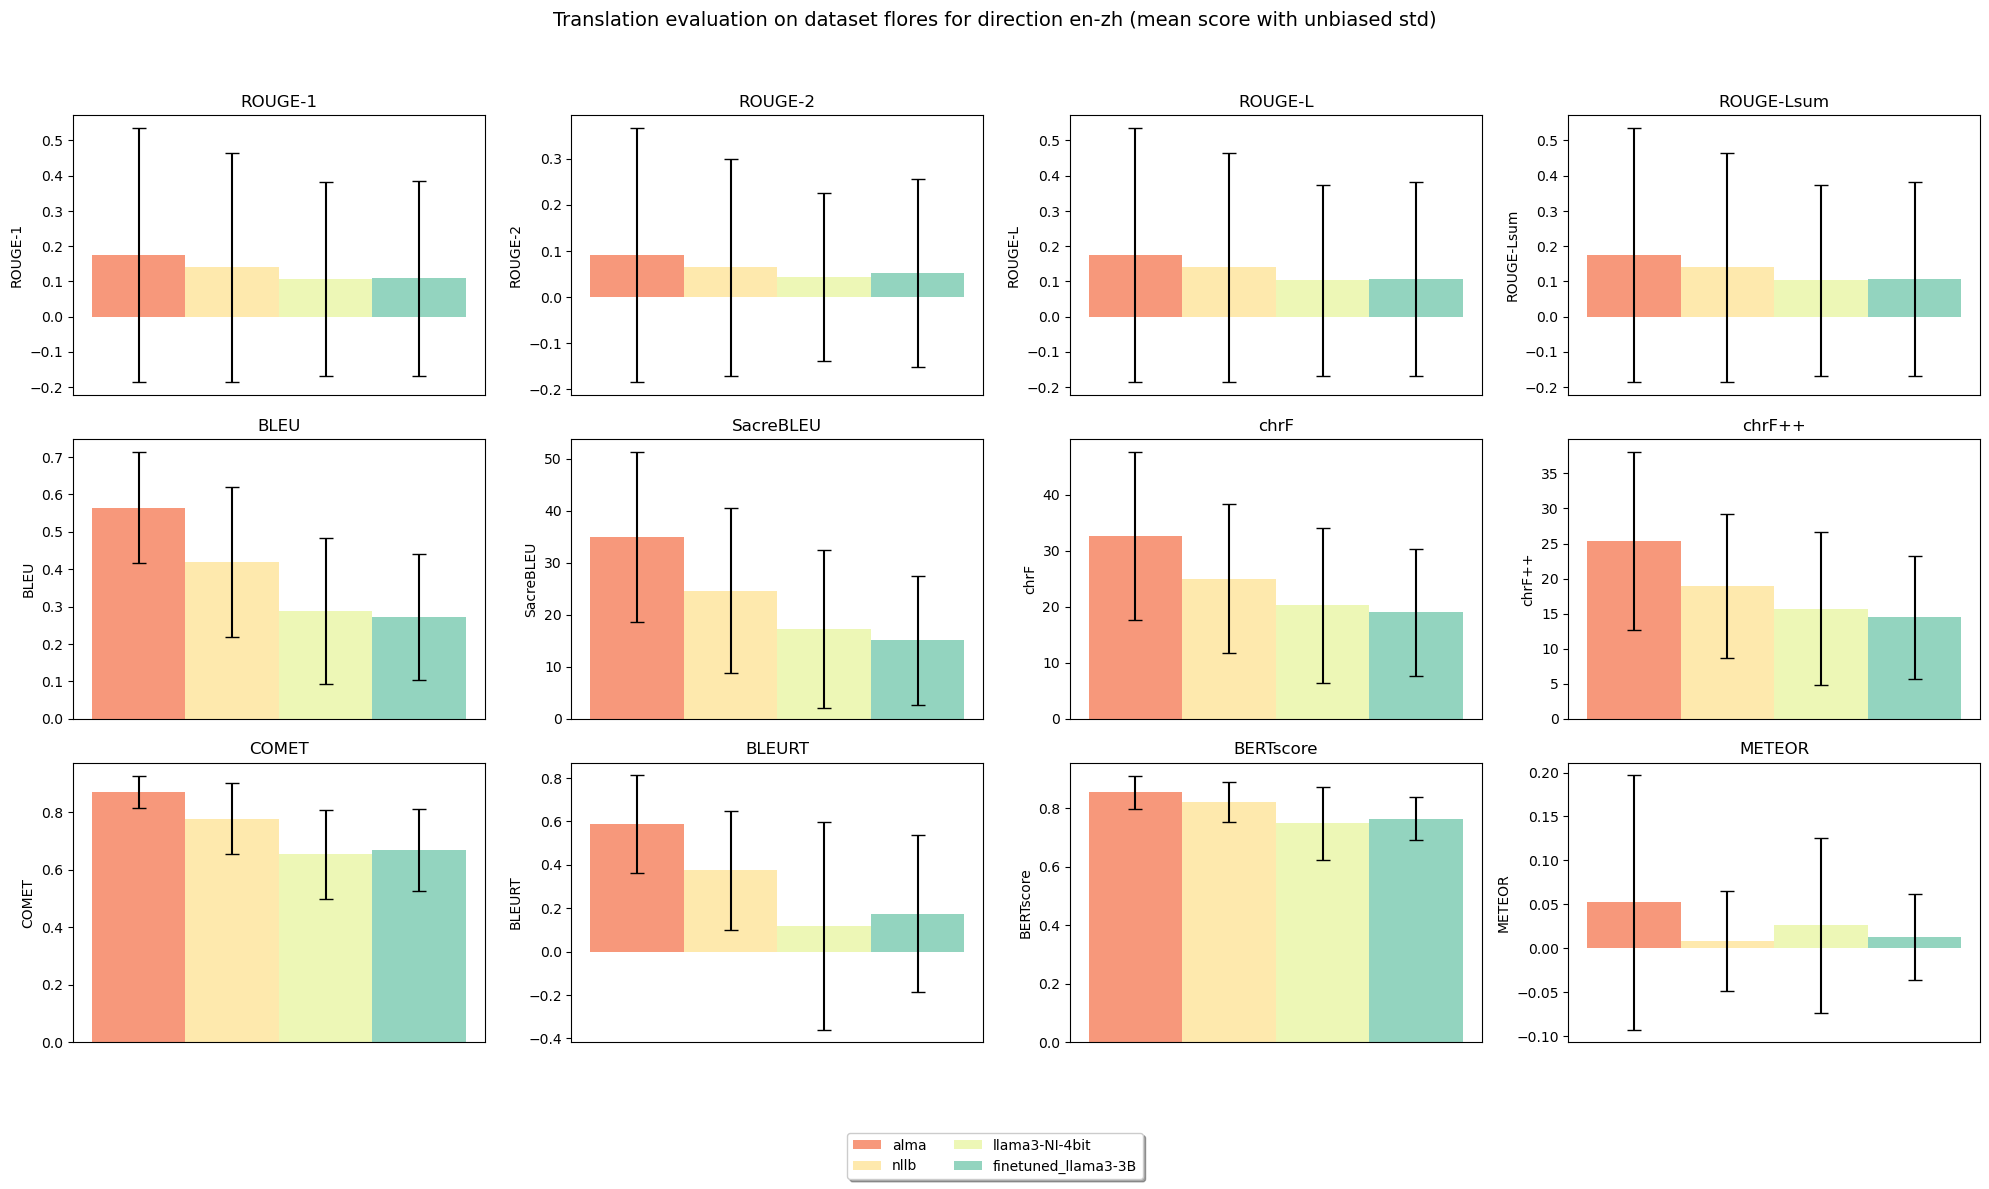

Extracting and concatenating metrics...


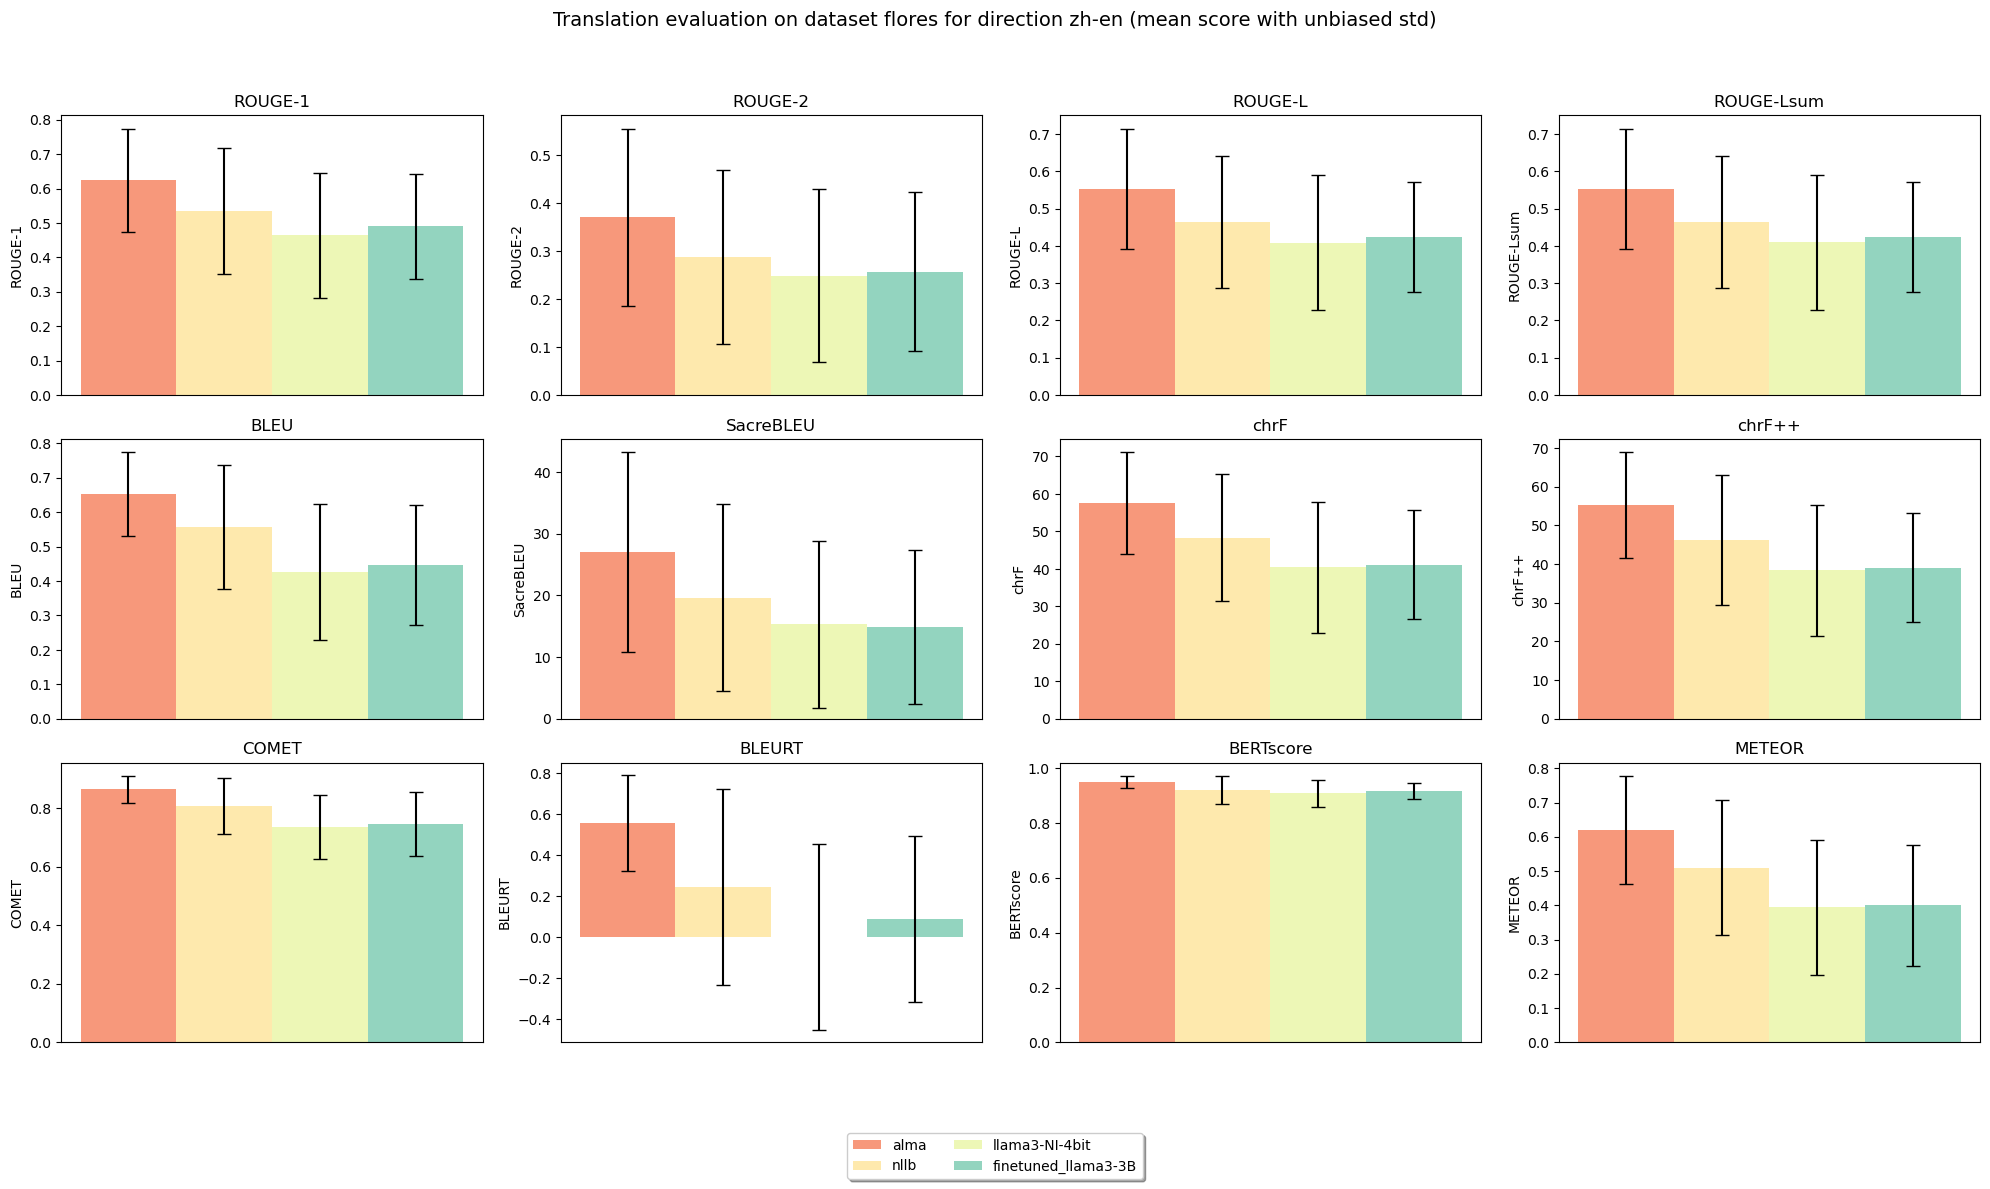

Extracting and concatenating metrics...


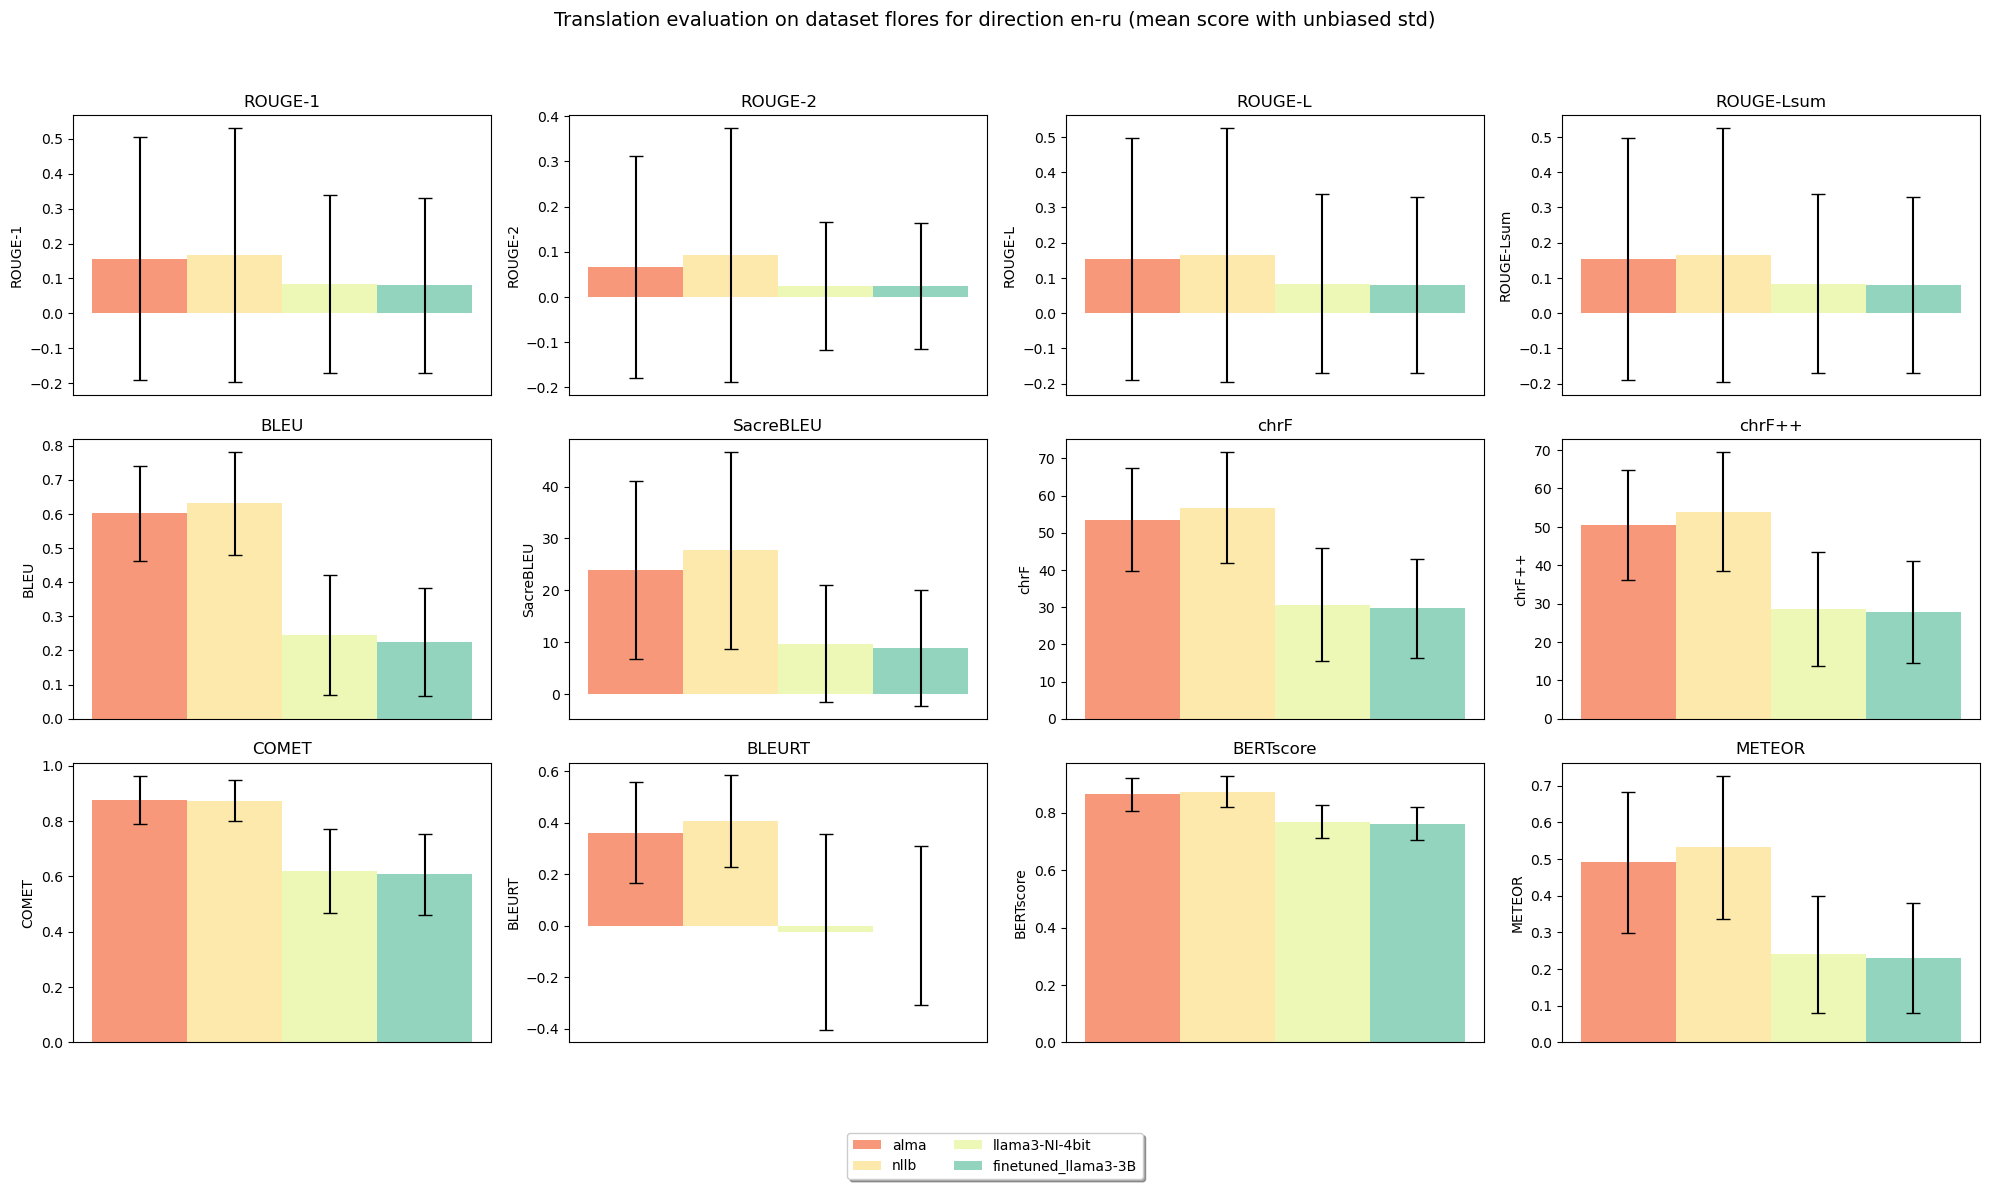

Extracting and concatenating metrics...


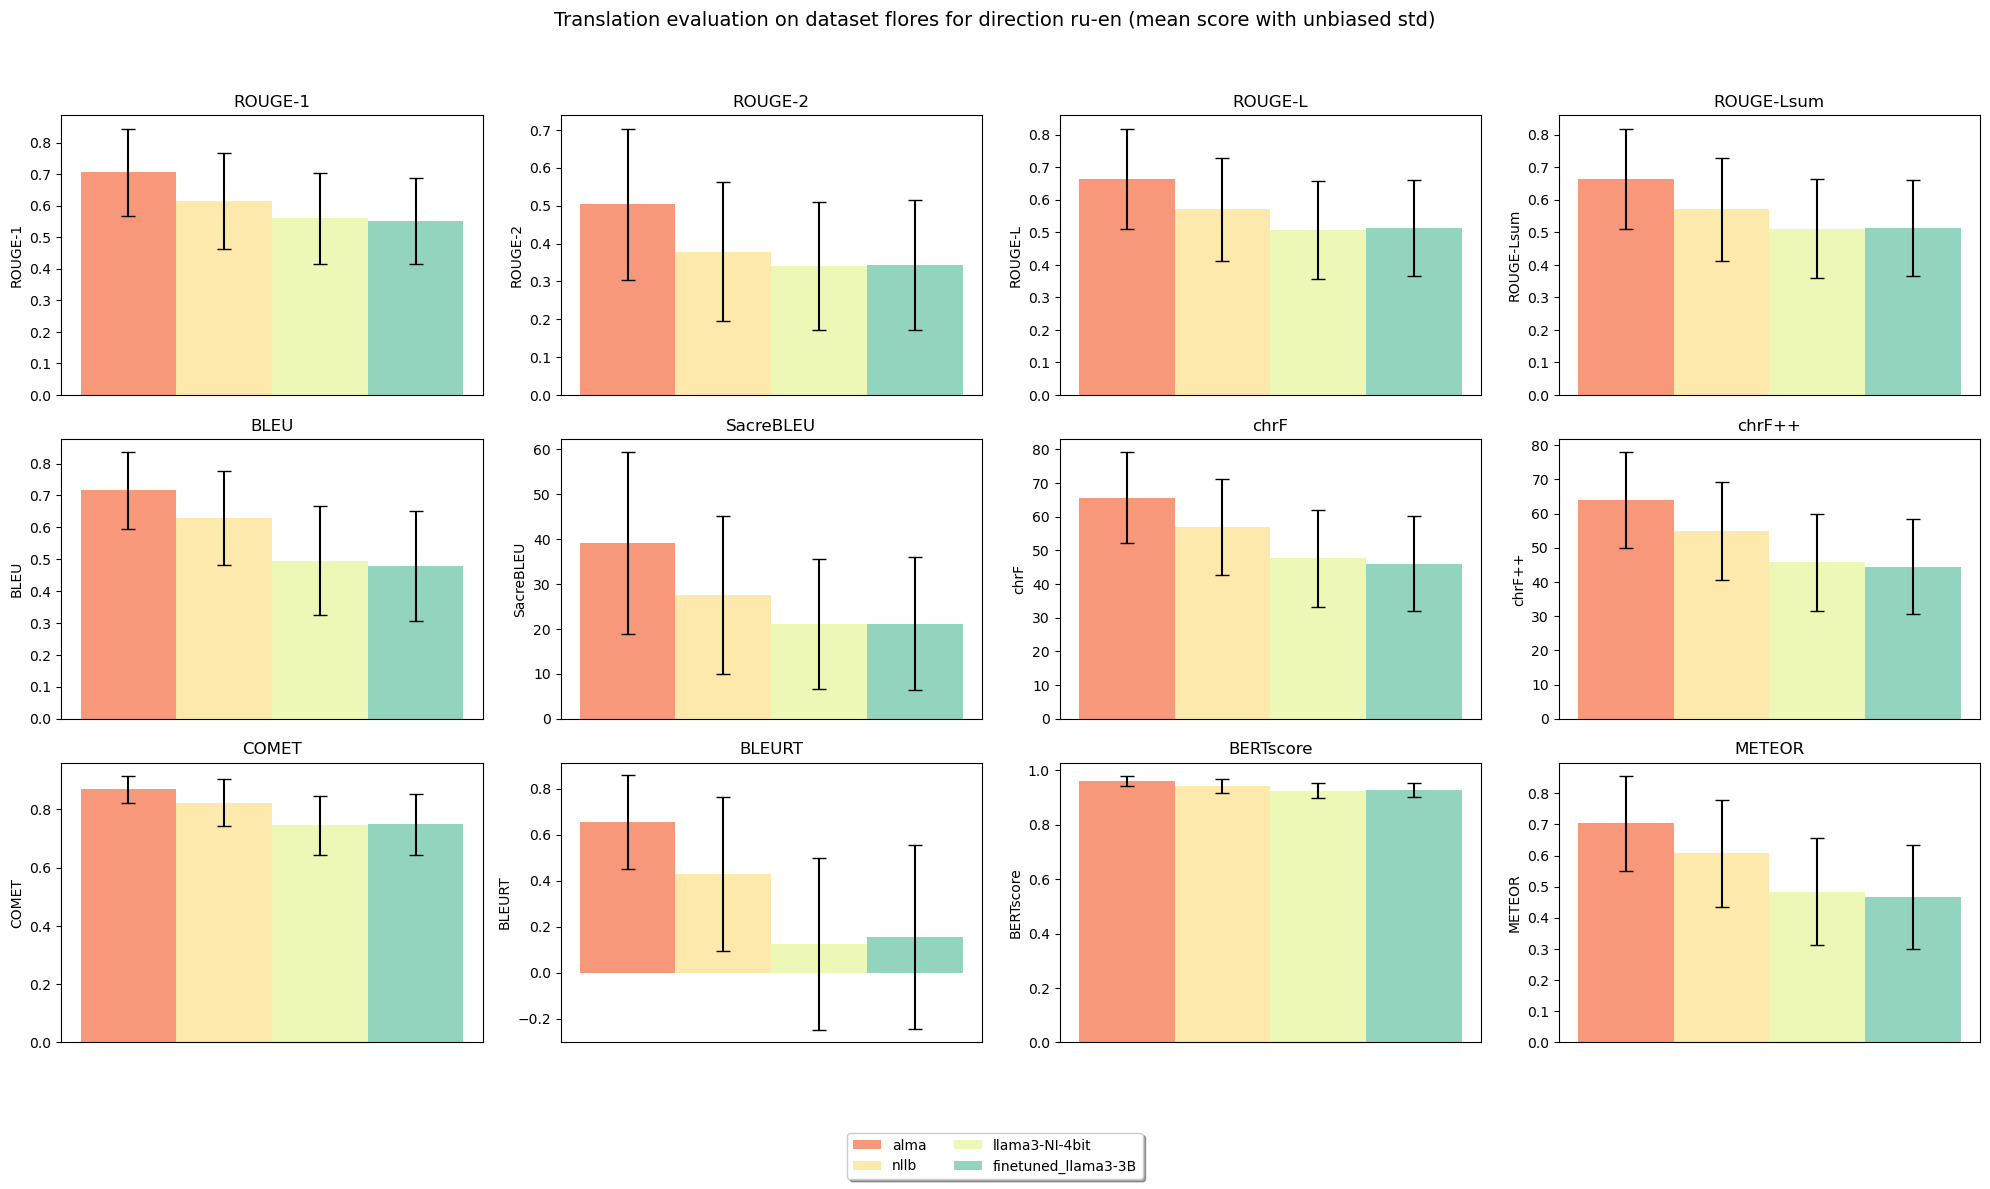

In [2]:
## Bar plot per direction
metric_names = ["ROUGE-1", "ROUGE-2", "ROUGE-L", "ROUGE-Lsum",
                "BLEU", "SacreBLEU", "chrF", "chrF++",
                "COMET", "BLEURT", "BERTscore", "METEOR"]

dataset_name = "flores"
reduce_size = 200

directions = ["en-de", "de-en",
              "en-cs", "cs-en",
              "en-is", "is-en",
              "en-zh", "zh-en",
              "en-ru", "ru-en"]

model_names = ["alma",
               "nllb",
               "llama3-NI-4bit",
               "finetuned_llama3-3B"]
model_sizes = [None,
               None,
               None,
               None]

make_bar_plot_all_metrics(directions, model_names, model_sizes, dataset_name, reduce_size, metric_names,
                        savepath = "./results/evaluations_figures/finetune_eval/barplot/flores_all_metrics")